# Анализ недвижимости в Санкт-Петербурге и Ленинградской области.    

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Моя задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<a id="num1"></a>
## Цели исследования 

1. Изучить данные и провести анализ допустимых, не выбивающихся, значений. 
2. Расширить данные необходимыми параметрами и обосновать их значение. 
3. Описать параметры общей площади, жилой площади, площади кухни, цены квартиры, количества комнат, высоты потолков, этажа и типа этажа, общего количества этажей. Также описать параметры расстояний: до центра, до ближайшего парка, до ближайшего аэропорта. 
4. Определить диапазоны значений в которые попадают пригодные для работы данные. 
5. В ходе исследования необходимо проанализировать влияние различных факторов на цены на жилье, выделить наиболее значимые параметры, и дать рекомендации по улучшению исходных данных.
6. Дать ответы на поставленные вопросы.
7. После проведения анализа данных и расширения параметров, необходимо провести исследования по поставленным вопросам, чтобы получить общую оценку проведенной работы. 

<a id="num2"></a>
## Поставленные вопросы

1. Необходимо изучить как быстро продавались квартиры. Параметр ``days_exposition`` показывает, сколько дней было размещено каждое объявление. 

2. Какие факторы больше всего влияют на общую стоимость объекта? Изучите, зависит ли цена от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - типа этажа, на котором расположена квартира;
    - даты размещения (день недели, месяц, год).
    
3. Необходимо посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Необходимо выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

4. Необходимо вычислить среднюю цену каждого километра в Санкт-Петербурге. Нужно описать, как стоимость объектов зависит от расстояния до центра города.

<a id="num3"></a>
## Оглавление

* [1. Цели исследования](#num1)
* [2. Поставленные вопросы](#num2)
* [3. Оглавление](#num3)
* [4. Ключ к данным](#num4)
* [5. Ознакомление с данными](#num5)
    * [5.1. Получение данных](#num51)
        * [5.1.1. Дополнительные функции](#num511)
        * [5.1.2. Oзнакомимся с данными](#num512)
        * [5.1.3. Описание данных](#num513)
        * [5.1.4. Общий вывод о данных и обнаруженных проблемах](#num514)
* [6. Предобработка данных](#num6)
    * [6.1. Названия населенных пунктов](#num61)
    * [6.2. Комнаты](#num62)
    * [6.3. Площадь кухни](#num63)
    * [6.4. Жилая площадь](#num64)
    * [6.5. Потолки](#num65)
    * [6.6. Общее количество этажей в здании](#num66)
    * [6.7. Цена на момент снятия с публикации](#num67)
    * [6.8. Количество балконов ](#num68)
    * [6.9. Информация об апартаментах ](#num69)
    * [6.10. Количество парков в радиусе 3 км](#num610)
    * [6.11. Число водоёмов в радиусе 3 км](#num611)
    * [6.12. Cколько дней было размещено объявление](#num612)
    * [6.13. Итог предобработки данных](#num613)  
* [7. Добавление в таблицу новых столбцов](#num7)
    * [7.1. Цена одного квадратного метра](#num71)
    * [7.2. День публикации](#num72)
    * [7.3. Месяц публикации](#num73)
    * [7.4. Год публикации](#num74)
    * [7.5. Тип этажа квартиры](#num75)
    * [7.6. Расстояние до центра города в километрах](#num76)
    * [7.7. Расстояние до аэропорта в километрах](#num77)
    * [7.8. Расстояние до парка в километрах](#num78)
    * [7.9. Расстояние до водоемах в километрах](#num79)
    * [7.10. Цена за квартиру в миллионах](#num710)
* [8. Изучены и описаны параметры](#num8)
    * [8.1. Параметр общей площади](#num81)
    * [8.2. Параметр жилой площади](#num82)
    * [8.3. Параметр площади кухни](#num83)
    * [8.4. Общий вывод по трем параметрам площади квартир](#num84)
    * [8.5. Параметр цены на момент снятия объявления](#num85)
    * [8.6. Параметр количества комнат](#num86)
    * [8.7. Параметр высоты потолков](#num87)
    * [8.8. Параметр этажа квартиры](#num88)
    * [8.9. Параметр типа этажа](#num89)
    * [8.10. Параметр общего количества этажей в доме](#num810)
    * [8.11. Параметр расстояния до центра города](#num811)
    * [8.12. Параметр расстояния до ближайшего аэропорта](#num812)
    * [8.13. Параметр расстояния до ближайшего парка](#num813)
    * [8.14. Параметр день публикации объявления](#num814)
    * [8.15. Параметр месяц публикации объявления](#num815)
    * [8.16. Итог изучения параметров](#num816)
* [9. Исследовательский анализ данных](#num9)
    * [9.1. Как быстро продавались квартиры](#num91)
        * [9.1.1. Итог. Как быстро продавались квартиры](#num911)
    * [9.2. Какие факторы больше всего влияют на общую (полную) стоимость объекта](#num92)
        * [9.2.1. Общая площадь](#num921)
        * [9.2.2. Жилая площадь](#num922)
        * [9.2.3. Площадь кухни](#num923)
        * [9.2.4. Количество комнат](#num924)
        * [9.2.5. Промежуточный итог влияния параметров квартиры на стоимость квартиры](#num925)
        * [9.2.6. Тип этажа](#num926)
        * [9.2.7. Даты размещения: день недели, месяц, год](#num927)
            * [9.2.7.1. День недели](#num9271)
            * [9.2.7.2. Месяц](#num9272)
            * [9.2.7.3. Год](#num9273)
        * [9.2.8. Итог. Какие факторы больше всего влияют на общую (полную) стоимость объекта](#num928)
    * [9.3. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений](#num93)
    * [9.4. Средняя цена каждого километра в Санкт-Петербурге в разрезе удаления от центра](#num94)
* [10. Общий вывод](#num10)

<a id="num4"></a>
## Ключ к данным

* ``airports_nearest`` — расстояние до ближайшего аэропорта в метрах (м);
* ``balcony`` — число балконов;
* ``ceiling_height`` — высота потолков (м);
* ``cityCenters_nearest`` — расстояние до центра города (м);
* ``days_exposition`` — сколько дней было размещено объявление (от публикации до снятия);
* ``first_day_exposition`` — дата публикации;
* ``floor`` — этаж;
* ``floors_total`` — всего этажей в доме;
* ``is_apartment`` — апартаменты (булев тип);
* ``kitchen_area`` — площадь кухни в квадратных метрах (м²);
* ``last_price`` — цена на момент снятия с публикации;
* ``living_area`` — жилая площадь в квадратных метрах(м²);
* ``locality_name`` — название населённого пункта;
* ``open_plan`` — свободная планировка (булев тип);
* ``parks_around3000`` — число парков в радиусе 3 км;
* ``parks_nearest`` — расстояние до ближайшего парка (м);
* ``ponds_around3000`` — число водоёмов в радиусе 3 км;
* ``ponds_nearest`` — расстояние до ближайшего водоёма (м);
* ``rooms`` — число комнат;
* ``studio`` — квартира-студия (булев тип);
* ``total_area`` — площадь квартиры в квадратных метрах (м²);
* ``total_images`` — число фотографий квартиры в объявлении. 

<a id="num5"></a>
## Откройте файл с данными и изучите общую информацию. 

<a id="num51"></a>
### Получим данные из файла real_estate_data.csv и общую информацию о данных

<a id="num511"></a>
#### Создадим дополнительные функции для работы
Прежде всего создам функции, которые в дальнейше работе с проектом помогут быстрее получать информацию и значительно сократить техническую часть проекта.


In [1]:
# функция для получения основной информации о изначальной таблице, либо описания созданных в процессе иследования
# data_head_desc_info(датафрейм)
def data_head_desc_info(data):
    try:
        display('Первые десять строк данных:')
        display(data.head(10))
        display('Описание данных:')
        display(data.describe())
        display('Общая информацию о датафрейме')
        display(data.info())
        display('Количество пропусков')
        display(data.isna().sum())
    except:
        return 'Проверьте параметры'

# функция для получения короткой информации по определенным столбцам
# data_isna_nuniq(столбец по которому получаем информацию по пропускам и уникальным значениям)
def data_isna_nuniq(column):
    try:
        display('Количество пропусков:', data[column].isna().sum())
        display('Количество уникальных значений:', data[column].sort_values().nunique())
    except:
        return 'Проверьте параметры'
    
# функция сортировки и определения процентного соотношения указанных категорий в данных 
# sort_category(датафрейм, индекс по которому обращаемся к сводной таблице, столбец в котором определяем процент данных по категории)
def sort_category(new_df, index, column):
    try:
        sort_category_df = (
            new_df.pivot_table(index=index, values=column, aggfunc='count')
            .sort_values(by=column, ascending = False)
        )
        sort_category_df['percent'] = (sort_category_df[column] / sort_category_df[column].sum()) * 100  
        sort_category_df = sort_category_df.set_axis(['Количество в ' + column, 'Процент от общего'], axis='columns')
        return sort_category_df
    except:
        return 'Проверьте параметры'

# функция для просмотра топ-5 максимальных и минимальных значений
# largest_smallest(датафрейм, столбец по которому проверяем)
def largest_smallest(new_df, column):
    try:
        display('Топ-5 максимум:', column, new_df.sort_values(column, ascending = False)[column].nlargest(5))
        display('Топ-5 минимум:', column, new_df.sort_values(column)[column].nsmallest(5))
    except:
        return 'Проверьте параметры'

# функция для столбчатого графика по определенным в процессе расчетов категориям и в соотношении к количеству комнат в квартире
# counts_hist(датафрейм по которому работаем, столбец по которому получаем график, вид графика)
def counts_hist(new_df, columns, kind):
    try:
        counts = (new_df.groupby('rooms')[columns].value_counts()).to_frame().rename(columns={columns: 'count'}).reset_index()
        (pd.pivot_table(counts, values='count', index='rooms', columns=columns, fill_value=0)).plot(kind=kind, grid=True, figsize=(15, 5), legend=True);
        plt.ylabel('Количество значений в данных')
        plt.xlabel('Комнаты')
    except:
        return 'Проверьте параметры'
    
# функция для расчета среднего и медианы определенного столбца в указаном датафрейме
# mean_median(датафрейм, столбец по которому считаем среднее и медиану)
def mean_median_min_max(new_df, column):
    try:
        display('Среднее значение для столбца: ' + column, round(new_df[column].mean(), 2))
        display('Медианное значение для столбца: ' + column, round(new_df[column].median(),2))
        display('Минимальное значение для столбца: ' + column, round(new_df[column].min(),2))
        display('Максимальное значение для столбца: ' + column, round(new_df[column].max(),2))
    except:
        return 'Проверьте параметры'

<a id="num512"></a>
#### Oзнакомимся с данными 

Получим данные из файла ``real_estate_data.csv``.

И снимем ограничение на кол-во показываемых столбцов, так как при добавлении новых столбцов, формат отображения 
меняется на компактный и часть данных не отображается. 

Откроем файл, учитывая, что тут разделитель ``'\t'``.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

pd.options.display.max_columns = None

data = pd.read_csv('real_estate_data.csv', sep='\t')

Получим общую информацию о данных.

In [3]:
data_head_desc_info(data)

'Первые десять строк данных:'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


'Описание данных:'

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

'Количество пропусков'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверим есть ли в данных идентичные строки.

In [4]:
data.duplicated().sum()

0

Идентичный строк в данных нет. 

Далее целесообразно посмотреть на данные в виде графиков, чтобы иметь представление о структуре и приступать к работе с ними. 

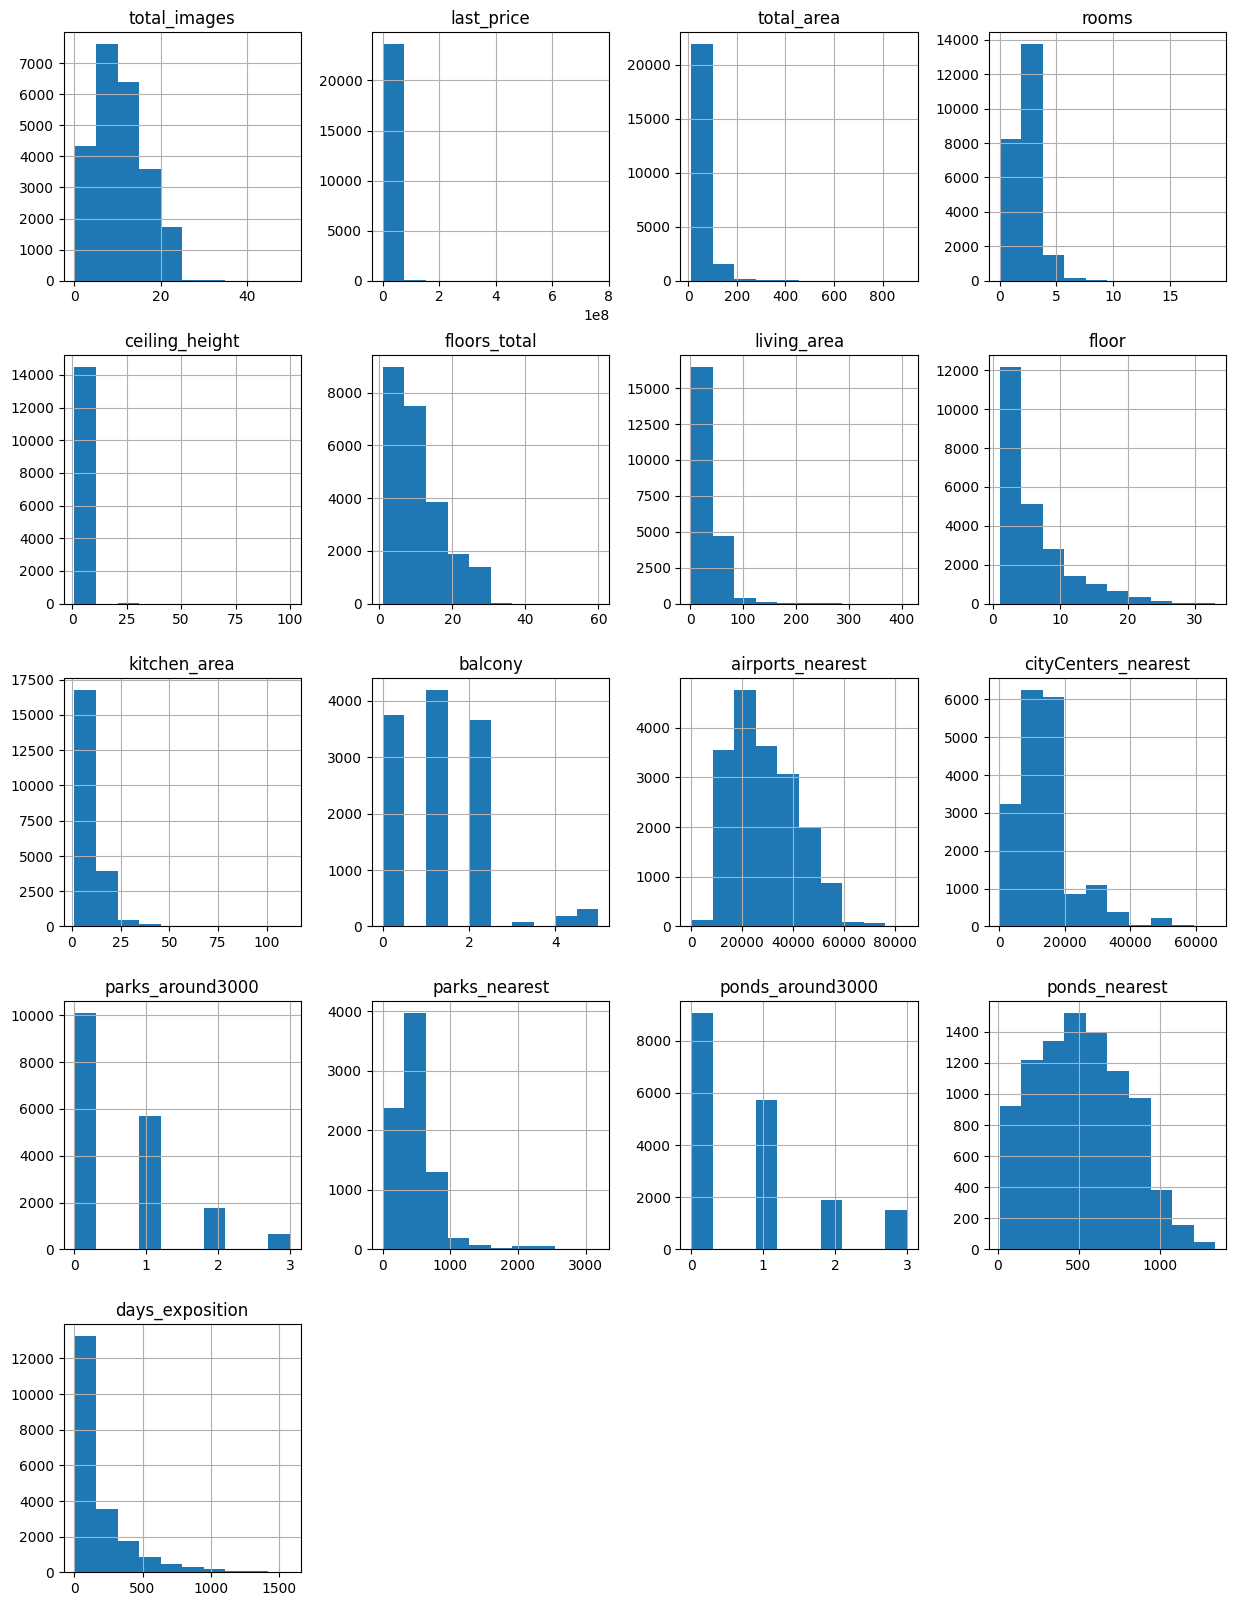

In [5]:
data.hist(figsize=(15, 20));

<a id="num513"></a>
#### Описание данных

Ниже продублированы параметры, которые присутствуют в данных. 

* ``airports_nearest`` — расстояние до ближайшего аэропорта в метрах (м)
* ``balcony`` — число балконов
* ``ceiling_height`` — высота потолков (м)
* ``cityCenters_nearest`` — расстояние до центра города (м)
* ``days_exposition`` — сколько дней было размещено объявление (от публикации до снятия)
* ``first_day_exposition`` — дата публикации
* ``floor`` — этаж
* ``floors_total`` — всего этажей в доме
* ``is_apartment`` — апартаменты (булев тип)
* ``kitchen_area`` — площадь кухни в квадратных метрах (м²)
* ``last_price`` — цена на момент снятия с публикации
* ``living_area`` — жилая площадь в квадратных метрах(м²)
* ``locality_name`` — название населённого пункта
* ``open_plan`` — свободная планировка (булев тип)
* ``parks_around3000`` — число парков в радиусе 3 км
* ``parks_nearest`` — расстояние до ближайшего парка (м)
* ``ponds_around3000`` — число водоёмов в радиусе 3 км
* ``ponds_nearest`` — расстояние до ближайшего водоёма (м)
* ``rooms`` — число комнат
* ``studio`` — квартира-студия (булев тип)
* ``total_area`` — площадь квартиры в квадратных метрах (м²)
* ``total_images`` — число фотографий квартиры в объявлении

<a id="num514"></a>
#### Общий вывод о данных и обнаруженных проблемах

В таблице представлены данные об аренде с 2014 года по 2019 год включительно. Общее количество записей составляет 23699, это все объявления, которые за этот период были опубликованы и завершены, также встречаются и объявления, которые на момент получения этих данных были активны.

Данные представлены 22-мя столбцами, с типами float64(14), int64(3), object(3), bool(2). 

По описанию данных, до детального изучения уже видно некорректные значения. На этом этапе обратим внимание только на данные и не будем проводить сравнения со средним значением и медианой, так как некорректно сравнивать минимальное или максимальное значение с медианой и средним значением всей таблицы. Далее разберем эти данные подробнее и, сравнивая с медианным значением и средним сгруппированных по общему параметру, например, по количеству комнат.

Что можно сказать о данных сейчас:

- ``last_price`` — содержит неправдоподобно низкие цены, например, 12190 за квартиру — очень мало;
- ``ceiling_height`` — включает в себя как очень низкие потолки — 1м, так и нереалистично высокие — 100м;
- ``living_area`` — указывает на очень маленькую жилую площадь у квартиры — 2 кв.м;
- ``kitchen_area`` — с площадью кухни дела обстоят не лучше, минимальное значение — 1.30 кв.м;
- ``rooms`` — в некоторых случях количество комнат отмечено как 0. 

Типы данных по определенным столбцам стоит исправить:
- ``floors_total`` — количество этажей это целочисленное значение, сменим тип данных с float на int;
- ``is_apartment`` — апартаменты, сменим тип с object на bool;
- ``balcony`` — количество балконов должно быть целочисленным, сменим тип с float на int;
- ``parks_around3000`` и ``ponds_around3000`` — количество парков и водоемов может быть только целочисленным, заменим тип float на int;
- ``days_exposition`` — количество дней, сколько объявление было размещено, может быть с дробной частью, но для удобства будем работать с целочисленным значением, сменим тип с float на int.

Пропуски значений в данных являются значимыми, и их нельзя игнорировать:
- ``ceiling_height`` — около 38.8% значений от общего количества записей отсутствует. Для исправления этой ситуации можно использовать медианное значение для квартир с определенным количеством комнат, чтобы заполнить пропущенные данные.
- ``floors_total`` — отсутствуют 86 значений об этажности дома, вероятнее всего, эти данные можно пропустить, так как они составляют всего 0.36% от общего количества.
- ``living_area`` — данные о жилой площади являются важными для решения поставленных вопросов. Пропущенные значения можно заполнить медианным значением для квартир с определенным количеством комнат. При этом нужно учитывать, чтобы сумма жилой площади и площади кухни не превышала общую площадь.
- ``is_apartment`` — 88.29% значений в этом столбце отсутствуют. Стоит предположить, что этот параметр был указан только для аппартаментов, а для остальных объявлений либо отмечали обратное, либо, что вероятнее всего, параметр оставляли незаполненным. Так как тип значений в этом столбце bool, пропущенные значения можно заменить на "False".
- ``kitchen_area`` — размер кухни также не указан во всех объявлениях, 9.61% от общего количества оказались пропущенными. Пропуски можно заполнить медианным значением для квартир с определенным количеством комнат. При этом нужно учитывать, чтобы сумма площади кухни и жилой площади не превышала общую площадь.
- ``balcony`` — 48.61% значений в этом столбце отсутствуют. Можно предположить, что количество балконов не указывалось в тех квартирах, где балконов и вовсе нет. Пропущенные значения можно заменить на значение 0.
- ``locality_name`` — отсутствуют 49 значений, что составляет 0.21% от общего количества. Точное местоположение неизвестно и эти данные не могут быть использованы для рассчетов, удалим их.

<a id="num6"></a>
## Предобработка данных

Выше были выделены неидеальные данные. Прежде чем приступить, продублирую краткое описание проблем в соответствующих столбцах: 
- ``locality_name`` — отсутствующие значения;
- ``rooms`` неправильные значения;
- ``kitchen_area`` — неправильные значения, отсутствующие значения;
- ``living_area`` — неправильные значения, отсутствующие значения;
- ``ceiling_height`` — неправильные значения, отсутствующие значения; 
- ``floors_total`` — отсутствующие значения, неправильный тип (с float на int);
- ``last_price`` — неправильные значения;
- ``balcony`` — отсутствующие значения, неправильный тип (с float на int);
- ``is_apartment`` — отсутствующие значения, неправильный тип (с object на bool);
- ``parks_around3000`` и ``ponds_around3000`` — неправильный тип (c float на int); 
- ``days_exposition`` — неправильный тип (с float на int). 

Приступим к предобработке данных в таком же порядке.

<a id="num61"></a>
### Названия населенных пунктов ``locality_name``

Прежде всего поправим данные в столбце с названиями населенных пунктов, так как это один из ключевых параметров, с которым я буду работать. 

Посмотрим на количество уникальных населенных пунктов, которые представлены в данных и количество пропусков. Посмотрим на уникальные значения в виде списка

In [6]:
data_isna_nuniq('locality_name')
data['locality_name'].sort_values().unique()

'Количество пропусков:'

49

'Количество уникальных значений:'

364

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Просматривая список с населенными пунктами стало понятно, что в данных есть проблема не только с пропущенными значениями, но и с написанием названий. 
Можно выделить следующие моменты с разным написанием типа населенного пункта: 
- встречается как «поселок», так и «посёлок»;
- два варианта написания одного типа населенного пункта «городской посёлок» и «посёлок городского типа»; 
- также встречается «садовое товарищество» и «садоводческое некоммерческое товарищество»;
- встречается «посёлок станции» и «посёлок при железнодорожной станции».

1. В паре «поселок» и «посёлок» оставим только с верным написанием через «ё». 
2. Между «городской посёлок» и «посёлок городского типа» выберем второе, так как это верное название типа населенного пункта.
3. В паре «садовое товарищество» и «садоводческое некоммерческое товарищество», оставим второй вариант, так как это верное название типа населенного пункта. 
4. А в паре «посёлок станции» и «посёлок при железнодорожной станции», оставим развернутый второй вариант. 

In [7]:
# разберемся с парой «поселок - посёлок», заменим «е» на «ё», чтобы в дальнейшем не возникало путаницы
data['locality_name'] = data['locality_name'].replace('поселок', 'посёлок', regex=True)

# разберемся с городским посёлком и посёлком городского типа, оставим только второй вариант  
data['locality_name'] = data['locality_name'].replace('городской посёлок', 'посёлок городского типа', regex=True)

# изменим садовое товарищество на садоводческое некоммерческое товарищество
data['locality_name'] = data['locality_name'].replace('садовое товарищество', 'садоводческое некоммерческое товарищество', regex=True)

# заменим «посёлок станции» на «посёлок при железнодорожной станции»
data['locality_name'] = data['locality_name'].replace('посёлок станции', 'посёлок при железнодорожной станции', regex=True)

С данными выше разобрались, теперь не должно возникать проблем с определением населенного пункта. Теперь удалим строки с отсутствующим значением. 

In [8]:
data = data.dropna(subset=['locality_name'])

In [9]:
data_isna_nuniq('locality_name')

'Количество пропусков:'

0

'Количество уникальных значений:'

321

По итогу нашей работы осталось 321 уникальное значение из 364 и 0 строк с пропусками.

<a id="num62"></a>
### Комнаты ``rooms``

Обратим внимание на отклонения, которые видны в столбце ``rooms`` — в некоторых случаях число комнат указано как 0. Если ознакомиться с формой для размещения нового объявления https://realty.ya.ru/management-new/add/, видно, что количество комнат невозможно указать менее 1 или нужно указать, что это студия. Предположим, что эти ограничения действовали и в период, за который собранны данные с которыми мы работаем. 

Посмотрим сколько квартир с 0 комнат и не указаны как студия.

In [10]:
data.query('rooms == 0 and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,посёлок при железнодорожной станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


Квартир с 0 комнат и которые не являются студиями не так много, они составляют 0.25% от общего количества строк. Предположим, что это ошибка в данных, целесообразно будет удалить эти строки.  

In [11]:
data.drop(data.query('rooms == 0 and studio == False').index, inplace=True)

В данных остались квартиры, у которых указано количество комнат равное 0, но это квартиры студии. В этом случае это нормальное значение и мы ничего не будем с ним делать.

<a id="num63"></a>
### Площадь кухни ``kitchen_area``

Ранее были выделены проблемы с пропусками и неправильными значениями в этом столбце. В частности стоит обратить внимание на кухни размером 1.3 кв.м.. 
Приведем в порядок эти данные.

Посмотрим на количество пропусков.

In [12]:
data['kitchen_area'].isna().sum()

2210

Чтобы заполнить пропущенные значения, мы возьмем среднее значение для каждой квартиры с определенным количеством комнат. Например, чтобы заполнить пропуски кухонной площади в однокомнатной квартире, мы найдем медианное значение кухонной площади для всех однокомнатных квартир. Аналогично поступим и с другими значениями.

Создаем сводную таблицу с медианным значением по площади кухонь, заменяем пропущенные значения в столбце ``kitchen_area`` медианным значением, а там где нет данных, заполним значением 0. 

In [13]:
kitchen_area_median = data.pivot_table(index='rooms', values='kitchen_area', aggfunc='median')
data['kitchen_area'] = data['kitchen_area'].fillna(data['rooms'].map(kitchen_area_median['kitchen_area']))
data['kitchen_area'] = data['kitchen_area'].fillna(value=0) 

Посмотрим на количество пропусков.

In [14]:
data['kitchen_area'].isna().sum()

0

При изучении объявлений, которые есть на данный момент на сайте https://realty.ya.ru/sankt-peterburg/, можно сказать, что в квартирах действительно могут быть кухни площадью в 2кв.м., это квартиры малого метража. Целесообразно будет удалить квартиры с кухней менее этой площади. 

In [15]:
data.query('kitchen_area < 2 and kitchen_area > 0').sort_values(by=['kitchen_area'], ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.5,2019-05-01T00:00:00,1,2.8,14.0,19.5,10,NaN,False,False,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN


Удалим эту квартиру.

In [16]:
data.drop(data.query('kitchen_area < 2 and kitchen_area != 0').index, inplace=True)

Таким образом мы на этом этапе убрали квартиру с очень малым значением площади кухни и заполнили пропуски.  

<a id="num64"></a>
### Жилая площадь ``living_area``

В столбце с размером жилой площади, которая есть в квартире дела обстоят не лучше, тут есть как отсутствующие значения, так и очень малые 

С пропусками мы поступим также, как и в случае с площадью кухни, возьмем медианное значение для каждой квартиры с определенным количеством комнат. 

Создаем сводную таблицу с медианными значениями по жилой площади и заменяем пропущенные значения в столбце ``living_area`` медианой по комнатам. 

In [17]:
living_area_median_height = data.pivot_table(index='rooms', values='living_area', aggfunc='median')
data['living_area'] = data['living_area'].fillna(data['rooms'].map(living_area_median_height['living_area']))

При заполнении данных могло получиться так, что сумма жилой площади и кухни выходила бы больше общей. Проверим это.

In [18]:
data.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,False,False,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
227,13,2200000.0,47.00,2018-01-12T00:00:00,3,2.34,5.0,45.00,1,NaN,False,False,9.50,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,9.01,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
322,6,2000000.0,25.00,2017-02-07T00:00:00,1,NaN,5.0,17.60,5,False,False,False,9.01,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,False,False,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,0,5800000.0,66.00,2017-06-09T00:00:00,5,NaN,5.0,55.50,1,NaN,False,False,15.10,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,NaN,16.0,16.00,12,NaN,False,False,9.01,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0
23202,13,4919880.0,67.92,2018-10-23T00:00:00,2,NaN,3.0,63.00,3,NaN,False,False,13.04,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0
23579,7,2350000.0,24.80,2018-06-07T00:00:00,1,NaN,10.0,18.00,2,NaN,False,False,9.01,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0


Действительно, есть такие квартиры, исправим эту неточность. Заменим такие данные на значение разницы общей площади и кухни.

In [19]:
data.loc[data['total_area'] < data['living_area'] + data['kitchen_area'], 'living_area'] = data['total_area'] - data['kitchen_area']

<a id="num65"></a>
### Потолки ``ceiling_height``

В столбце с высотой потолков 9195 пропущенных значений. Следует заполнить эти данные. 
При изучении сайта https://realty.ya.ru/sankt-peterburg/, было выявлено, что жилые квартиры, которые есть на данный момент, могут иметь потолки вплоть до 8.5 метров. Это преимущественно квартиры большого метража и с высокой ценой. 

Посмотрим на квартиры с потолками выше 8.5 метров, а также на все уникальные значения потолков, которые встречаются в этих данных.

In [20]:
display(data[data['ceiling_height'] >=  8.5].sort_values(by='ceiling_height', ascending=False).head(10))
data['ceiling_height'].sort_values(ascending=True).unique()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,31.0,19,False,False,False,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,9.5,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,35.4,2,False,False,False,8.6,2.0,посёлок городского типа Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,False,False,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0


array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Потолки в выше 8-ми метров, а также ниже 2-х, это нереалистичные данные. Оставим только в диапазоне от 2-х до 8-ми. 

Обратим внимание на данные, которые выше 8-ми метров, стоит предположить, что в этих квартирах арендодатель при заполнении объявления допустил опечатку и вместо потолков в диапазоне от 2-х и выше, указал значения от 2-ти и выше. Такие данные можно привести к нормальному значению, поделим значение таких потолков на 10. Остальные квартиры, которые не соответствуют условиям удалим.

Cмотрим по потолкам меньше 2-х и больше 8.5 метров.

In [21]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 8.5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,False,False,8.80,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,NaN,False,False,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,True,False,False,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.0,3,NaN,False,False,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9.0,21.3,3,NaN,False,False,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,посёлок городского типа Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,NaN,False,False,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.00,5.0,31.3,5,NaN,False,False,5.70,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.00,5.0,30.0,2,NaN,False,False,5.20,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


По заданным условиям получилось 27 строк на исправление, часть из них мы поправим делением, а часть удалим. 

In [22]:
selected_rows = data.loc[data['ceiling_height'] > 8.5]
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = selected_rows['ceiling_height'] / 10

Удалим записи с потолками меньше 2-х метров и выше 8.5 метров.  

In [23]:
data.drop(data[(data['ceiling_height'] < 2)].index, inplace=True)
data.drop(data[(data['ceiling_height'] > 8.5)].index, inplace=True)

Разберемся с пропущенными значениями. Заполним их медианным значением в зависимости от населенного пункта. 

Создаем сводную таблицу со средними значениями по населенным пунктам и заменяем пропущенные значения в столбце ``ceiling_height`` медианным значением по городу. 

In [24]:
ceiling_median_height = data.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median')
data['ceiling_height'] = data['ceiling_height'].fillna(data['locality_name'].map(ceiling_median_height['ceiling_height']))

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             99
floors_total               85
living_area                 0
floor                       0
is_apartment            20826
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11495
locality_name               0
airports_nearest         5505
cityCenters_nearest      5482
parks_around3000         5481
parks_nearest           15532
ponds_around3000         5481
ponds_nearest           14524
days_exposition          3179
dtype: int64

Осталось 99 значений, вероятнее всего это значения из населенных пунктов, по которым невозможно вычислить медиану, например, если в этом населенном всего одно объявление. 

Посмотрим на данные, которые пропущены, а также на количество уникальных населенных пунктов в которых удаляем записи. 

In [26]:
locality_with_nans = data.loc[data['ceiling_height'].isna(), 'locality_name'].unique()
display('Уникальные населенные пункты в которых удаляем строки с отсутствующим значением', len(locality_with_nans)) 
data[(data['ceiling_height'].isna()) & (data['locality_name'].isin(locality_with_nans))]

'Уникальные населенные пункты в которых удаляем строки с отсутствующим значением'

68

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
110,6,3850000.0,72.3,2017-09-29T00:00:00,2,NaN,3.0,27.4,2,NaN,False,False,23.60,0.0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
168,9,2250000.0,73.0,2018-11-14T00:00:00,3,NaN,5.0,43.4,5,NaN,False,False,8.40,NaN,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0
986,10,1950000.0,62.0,2015-02-19T00:00:00,3,NaN,5.0,45.0,5,NaN,False,False,9.50,NaN,посёлок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.0,2016-11-28T00:00:00,1,NaN,3.0,17.6,3,False,False,False,9.01,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1858,1,2980000.0,58.6,2018-02-16T00:00:00,2,NaN,4.0,31.5,1,NaN,False,False,12.20,2.0,деревня Аро,NaN,NaN,NaN,NaN,NaN,NaN,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22910,5,1630000.0,59.0,2017-09-02T00:00:00,2,NaN,4.0,34.0,4,NaN,False,False,13.00,1.0,село Паша,NaN,NaN,NaN,NaN,NaN,NaN,33.0
22935,8,799000.0,47.2,2018-06-16T00:00:00,2,NaN,5.0,30.6,3,NaN,False,False,6.30,1.0,посёлок Володарское,NaN,NaN,NaN,NaN,NaN,NaN,5.0
23048,7,2449000.0,53.6,2018-07-10T00:00:00,2,NaN,5.0,28.4,2,NaN,False,False,8.80,NaN,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23354,18,900000.0,42.6,2018-02-26T00:00:00,2,NaN,2.0,28.0,1,NaN,False,False,9.00,NaN,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0


Видно, что таких квартир не так много, всего 0.42% от общего количества объявлений в этих данных. Можно удалить эти строки. 

In [27]:
data = data.drop(data[(data['ceiling_height'].isna()) & (data['locality_name'].isin(locality_with_nans))].index)

<a id="num66"></a>
### Общее количество этажей в здании ``floors_total``

Проверим данные по количеству этажей. Прежде всего была изучена информация о городе, о максимальном количестве жилых этажей. На момент проведения этого исследования в Петербурге был отмечен один наиболее высокий жилищный комплекс, в ЖК «Князь Александр Невский» всего 37 этажей, 35 из которых являются жилыми.

Проверим на этажи выше 35-го, а также посмотрим на уникальные значения этажей, на случай несоответствия данных. 

In [28]:
display(data[data['floors_total'] > 35].sort_values(by='floors_total', ascending=True))
data['floors_total'].sort_values(ascending=True).unique()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,2.70,36.0,21.4,28,NaN,False,False,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,2.70,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.70,36.0,40.0,29,NaN,False,False,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60., nan])

Квартир выше 35-го этажа оказалось не много, но они есть. Удалим эти записи. 

In [29]:
data.drop(data[(data['floors_total'] > 35)].index, inplace=True)

Там, где значения не указаны, заменим общую этажность здания на значение текущего этажа

In [30]:
data['floors_total'] = data['floors_total'].fillna(value=data['floor']) 

Проверим данные, которые могли остаться. 

In [31]:
display(data[data['floors_total'] >= 36].sort_values(by='floors_total', ascending=True).head(10))
data['floors_total'].isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


0

Так как значение этажа преимущественно целочислено, переведем тип данных в ``int``.

In [32]:
data['floors_total'] = data['floors_total'].astype('int')

<a id="num67"></a>
### Цена на момент снятия с публикации ``last_price``

При первичном осмотре данных видно было, что есть квартира с необычно низкой ценой, судя по всему тут ошибка, так как квартира площадью 100 кв.м., которая располагается всего в 9 км от центра Петербурга не может стоить 12190. Проверим данные по минимальным значениям, возможно будут и другие отклонения. 

In [33]:
data.sort_values(by='last_price', ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.750,25,32.0,25,NaN,False,False,40.50,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.500,2,16.0,1,NaN,False,False,6.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.615,1,23.0,1,NaN,False,False,5.80,NaN,посёлок городского типа Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.650,2,29.7,1,NaN,False,False,8.80,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,2.600,3,17.6,3,NaN,False,False,9.01,NaN,посёлок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23484,11,470000.0,44.5,2018-07-02T00:00:00,2,2.500,2,28.0,2,NaN,False,False,7.50,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0
16032,8,480000.0,32.0,2019-01-06T00:00:00,1,2.500,2,16.0,1,NaN,False,False,9.01,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.500,5,17.0,5,NaN,False,False,5.50,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
4405,9,500000.0,52.0,2018-08-02T00:00:00,2,2.700,2,31.0,1,NaN,False,False,8.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,110.0
14295,4,500000.0,34.0,2016-02-09T00:00:00,1,2.500,5,17.0,4,NaN,False,False,8.00,1.0,посёлок городского типа Никольский,NaN,NaN,NaN,NaN,NaN,NaN,724.0


Видно, что квартира с такой низкой ценой одна, все остальные квартиры имеют тоже не высокую цену, но это можно обосновать тем, что у них малая общая площадь, а также тем, что квартиры находится далеко за чертой Санкт-Петербурга.

In [34]:
data.drop(data[(data['last_price'] == 12190)].index, inplace=True)

<a id="num68"></a>
### Количество балконов ``balcony``

При знакомстве с данными было отмечено, что для параметра ``balcony`` пропущено 48.61% значений от общего количества объявлений. Ориентируясь на форму заполнения информации о продаваемой квартире https://realty.ya.ru/management-new/add/, видно, что балкон не является обязательным условием, так что отсутствующие значения, вероятнее всего, это значения, когда количество балконов было просто не указано. В таких случаях можно заменить значение на ``0``. 

In [35]:
data['balcony'] = data['balcony'].fillna(value='0')

Сменим тип данных, так как количество балконов преимущественно целочислено. 

In [36]:
data['balcony'] = data['balcony'].astype('int')

<a id="num69"></a>
### Информация об апартаментах ``is_apartment``

В этом столбце пропущено 88.29% процентов от общего количества записей. Стоит предположить, что как и в случае с балконами, параметр просто не был выбран. Заменим пропущенные значения на ``False``.

In [37]:
data['is_apartment'] = data['is_apartment'].fillna(value='False')

Так как этот параметр хранит только данные как ``False`` или ``True``, стоит предположить, что этот солбец должен быть булевого типа. 

In [38]:
data['is_apartment'] = data['is_apartment'].astype('bool')

<a id="num610"></a>
### Количество парков в радиусе 3 км ``parks_around3000``

Количество пропусков в этом столбце довольно велико, предположим, что если в строке ничего не указано, то значит и парков рядом нет, заменим такие значения на ``0``. 

In [39]:
data['parks_around3000'] = data['parks_around3000'].fillna(value='0') 

Так как количество парков может быть только целочисленным, то сменим тип столбца на ``int``

In [40]:
data['parks_around3000'] = data['parks_around3000'].astype('int') 

<a id="num611"></a>
### Число водоёмов в радиусе 3 км ``ponds_around3000``

Пропусков о количестве водоемов очень много, допустим, что если в строке ничего не указано, то значит и водоемов рядом нет, заменим такие значения на ``0``. 

In [41]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value='0') 

Так как количество водоемов может быть только целочисленным, то сменим тип столбца на ``int``

In [42]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int') 

<a id="num612"></a>
### Cколько дней было размещено объявление ``days_exposition``

Так как в данных по которым проводится исследование много пропусков в столбце с количеством дней, сколько было размещено объявление, предположим, что эти квартиры либо очень быстро были проданы, либо сняты продавцом без завершенной продажи, либо это ошибка. Вне зависимости от происхождения этих пропущенных значений заполним их ``0``.

In [43]:
data.query('days_exposition == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Так как значений нет, то ``0`` будет характеристикой того, что данные были заполнены вручную. 

In [44]:
data['days_exposition'] = data['days_exposition'].fillna(value='0') 

Так как количество дней целочислено, сменим тип на ``int``.

In [45]:
data['days_exposition'] = data['days_exposition'].astype('int') 

<a id="num613"></a>
### Итог предобработки данных 

In [46]:
data_head_desc_info(data)

'Первые десять строк данных:'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14,45.00,9,True,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,True,False,False,9.10,0,посёлок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24,30.50,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


'Описание данных:'

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23479.000000,2.347900e+04,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,18068.000000,18091.000000,23479.000000,8049.000000,23479.000000,9054.000000,23479.000000
mean,9.873419,6.568816e+06,60.450213,2.076238,2.704475,10.675284,34.311929,5.893820,10.407155,0.590443,28806.854383,14192.233265,0.471613,490.641943,0.592359,518.336426,156.975979
std,5.683655,1.092112e+07,35.673650,1.076381,0.237015,6.560907,21.732716,4.871875,5.706685,0.959564,12632.995909,8606.878341,0.749729,342.679580,0.884011,277.771884,213.997287
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,7.200000,0.000000,18576.000000,9238.000000,0.000000,287.000000,0.000000,294.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.300000,4.000000,9.010000,0.000000,26763.500000,13101.000000,0.000000,454.000000,0.000000,502.500000,74.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,37310.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,35.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23479 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23479 non-null  int64  
 1   last_price            23479 non-null  float64
 2   total_area            23479 non-null  float64
 3   first_day_exposition  23479 non-null  object 
 4   rooms                 23479 non-null  int64  
 5   ceiling_height        23479 non-null  float64
 6   floors_total          23479 non-null  int32  
 7   living_area           23479 non-null  float64
 8   floor                 23479 non-null  int64  
 9   is_apartment          23479 non-null  bool   
 10  studio                23479 non-null  bool   
 11  open_plan             23479 non-null  bool   
 12  kitchen_area          23479 non-null  float64
 13  balcony               23479 non-null  int32  
 14  locality_name         23479 non-null  object 
 15  airports_nearest   

None

'Количество пропусков'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5411
cityCenters_nearest      5388
parks_around3000            0
parks_nearest           15430
ponds_around3000            0
ponds_nearest           14425
days_exposition             0
dtype: int64

По итогам предобработки данных можно отметить следующее. Пропущенные значения, в столбцах, в которых можно это было исправить заполнены или удалены. 

Характер пропущенных, либо потерянных значений разный. Так в ``rooms``, ``locality_name``, ``floors_total``, которые по правилам размещения объявления и по ограничениям формы создания объявления, пустых значений быть не должно. Форма https://realty.ya.ru/management-new/add/ не дает оставить эти значения пустими, требуется обязательное заполнение. Скорее всего данные были утеряны, либо неправильно записаны. 
А в столбцах ``kitchen_area``, ``living_area``, ``ceiling_height``, ``last_price``, ``balcony``, ``is_apartment``, которые не являются обязательными и без заполнения этих полей объявление все равно будет опубликовано, вероятнее всего, пользователи не указали, либо указали неверные данные. 

Что было сделано: 
- ``в rooms`` теперь минимальное значение комнат равно 0, это характерно только для студий, остальные, не соответствующие этим параметрам строки были удалены;
- в ``locality_name`` убраны неявные дубликаты, исправлены разночтения населенных пунктов, также были удалены объявления, без местоположения;
- ``kitchen_area`` — пропущенные значения были заполнены медианным в зависимости от числа комнат в квартире, а квартиры с кухней меньше 2 кв.м, были удалены;
- ``living_area`` — пропущенные значения были заполнены медианным в зависимости от числа комнат в квартире;
- ``ceiling_height`` — высота потолков была скорректирована, теперь данные находятся в диапазоне от 2 до 8.5 метров, отсутствующие значения удалены, а там, где можно было заполнить медианным значением в зависимости от числа комнат в квартире — данные были заполнены;
- ``floors_total`` — были удалены объявления с неуказанным общим количеством этажей, а также удалены объявления, в которых этаж был указан выше 35, был сменен тип данных с float на int;
- ``last_price`` — удалена строка с ценой за квартиру в 12190;
- ``balcony`` — заменены пропущенные значения на 0, тип данных изменен с float на int;
- ``is_apartment`` — заменены пропущенные значения на False, тип данных изменен с object на bool;
- ``parks_around3000`` и ``ponds_around3000``, ``days_exposition`` — изменен тип данных с float на int. 


<a id="num7"></a>
## Добавление в таблицу новых столбцов

Для дальнейших исследований добавим в таблицу следующие столбцы: 
- ``sq_m_price`` — цена одного квадратного метра;
- ``publish_day`` — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- ``publish_month`` — месяц публикации объявления;
- ``publish_year`` — год публикации объявления;
- ``flat_type`` — тип этажа квартиры (значения — «первый», «последний», «другой»);
- ``center_distance_km`` — расстояние до центра города в километрах;
- ``cityCenters_nearest_km_round`` — расстояние до центра города в километрах, округленное до целой части;
- ``airports_nearest_km`` — расстояние до аэропорта в километрах;
- ``parks_nearest_km`` — расстояние до ближайшего парка в километрах;
- ``ponds_nearest_km`` — расстояние до ближайшего водоема в километрах;
- ``last_price_m`` — цена за квартиру в миллионах. 

<a id="num71"></a>
### Цена одного квадратного метра

Добавляем в данные параметр цены за один квадратный метр. Для этого по каждой квартире индивидуально будем считать этот параметр делением последней зафиксированной цены на общую площадь. 

In [47]:
data['sq_m_price'] = round(data['last_price'] / data['total_area'], 2)

<a id="num72"></a>
### День публикации

Добавим в данные день публикации объявления в числовом виде: 0 - понедельник, 1 - вторник и т.д..

In [48]:
data['publish_day'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.dayofweek

<a id="num73"></a>
### Месяц публикации

Добавим в данные месяц публикации объявления.

In [49]:
data['publish_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

<a id="num74"></a>
### Год публикации

Добавим в данные год публикации объявления.

In [50]:
data['publish_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

<a id="num75"></a>
### Тип этажа квартиры

Классифицируем и добавим в таблицу: тип этажа квартиры. Диапазон значений — «первый, последний, другой».

In [51]:
def flat_type_check (row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1: 
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другое'
    except:
        return
    
    
data['floor_type'] = data.apply(flat_type_check, axis=1)

<a id="num76"></a>
### Расстояние до центра города в километрах

Добавим в данные расстояние до центра города, измеряем в километрах. 

In [52]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 2)

Также добавим округленные значения для исследований, где не требуется большая точность. 

In [53]:
data['cityCenters_nearest_km_round'] = data['cityCenters_nearest_km'].round(0)

<a id="num77"></a>
### Расстояние до аэропорта в километрах

Добавим в данные расстояние до аэропорта, измеряем в километрах. 

In [54]:
data['airports_nearest_km'] = round(data['airports_nearest'] / 1000, 2)

<a id="num78"></a>
###  Расстояние до парка в километрах

In [55]:
data['parks_nearest_km'] = round(data['parks_nearest'] / 1000, 2)

<a id="num79"></a>
### Расстояние до водоемах в километрах

In [56]:
data['ponds_nearest_km'] = round(data['ponds_nearest'] / 1000, 2)

<a id="num710"></a>
### Цена за квартиру в миллионах

Добавим в данные о последней цене за квартиру, измеряем в миллионах.

In [57]:
data['last_price_m'] = round(data['last_price'] / 1000000, 2)

<a id="num8"></a>
##  Изучены и описаны параметры

Прежде чем приступать к дальнейшему исследованию рассмотрим подробнее следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления. 
  
Результатом изучения этих параметров будут данные, по которым можно будет проводить конечные исследования. 

<a id="num81"></a>
### Параметр общей площади ``total_area``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных. 

In [58]:
mean_median_min_max(data, 'total_area')

'Среднее значение для столбца: total_area'

60.45

'Медианное значение для столбца: total_area'

52.0

'Минимальное значение для столбца: total_area'

12.0

'Максимальное значение для столбца: total_area'

900.0

При общем обзоре данных видно, что диапазон по общей площади у продаваемых квартир варьируется от ``12 кв.м`` до ``900 кв.м``. Рассмотрим эти данные подробнее и определим площади квартир с которыми будем работать дальше. 

Посмотрим подробнее на параметр площади в представлении гистограммы. Поставим количество корзин ``100``, чтобы немного подробнее посмотреть на значения. 

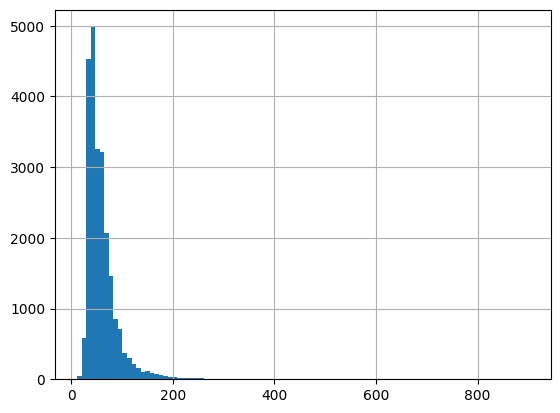

In [59]:
data['total_area'].hist(bins=100);

Большая часть продаваемых квартир имеет площадь до ``≈100``кв.м. По гистограмме видно, что квартиры, которые по площади приближаются к ``200`` кв.м, активно уменьшаются в количестве.

Далее необходимо разобраться с квартирами, которые поместим в определенный размерный диапазон. Мы можем взять за основу то, что квартиры в повседневности, обычно, делят на категории и могут называть маленькими, большими, средними и т.д.. Такое допущение обосную делением на квантили.

Использую метод .quantile() и предположу, что подобных категорий пять:
- маленькая — вероятнее всего эта категория включит в себя все квартиры студии и прочие малые;
- меньше средней — предположу, что сюда войдут квартиры с 1-2 комнатами, малого размера;
- средняя — ожидаю, что категория будет заполнена квартирами от 2 до 3 комнат;
- большая — вероятнее всего в категорию будут выделены остальные квартиры выше средних и до элитных;
- экстремально большая — предположительно сюда войдут квартиры, которые представлены единичными экземплярами, так называемые элитные, с сотнями квадратных метров, а также часть просто больших.

Для категоризации поделим квартиры с помощью метода .quantile() и шага 20%.
Тип площади:
- __Маленькая__: 0-20%
- __Меньше средней__: 21-40%
- __Средняя__: 41-60%
- __Большая__: 61-80%
- __Экстремально большая__: 81-100%

In [60]:
data['total_area'].quantile([.20, .40, .60, .80])

0.2    37.8
0.4    46.0
0.6    58.0
0.8    75.0
Name: total_area, dtype: float64

Таким образом получилось, что площади в зависимости от типов размещены в следующих диапазонах: 
- маленькая площадь: от ``0 до 37.8 кв.м``;
- меньше средней: от ``37.9 до 46.0 кв.м``;
- средняя: от ``46.1 до 58.0 кв.м``;
- большая: от ``58.1 до 75.0 кв.м``;
- экстремально большая: от ``75.1 кв.м и выше``. 

Создадим новую таблицу данных, которую будем дополнять данными и работать, не нарушая порядок изначальной. 

In [61]:
data_total_area_category = data.copy()

Зададим метки в зависимости от определенных диапазонов и добавим столбец ``category`` в таблицу ``data_total_area_category``. 

In [62]:
bins = [0, 37.8, 46.0, 58.0, 75.0, float('inf')]
labels = ['маленькая', 'меньше средней', 'средняя', 'большая', 'экстремально большая']
data_total_area_category['category'] = pd.cut(data_total_area_category['total_area'], bins=bins, labels=labels)

Посмотрим на ``Топ-5`` минимальных и максимальных значений. 

In [63]:
largest_smallest(data_total_area_category, 'total_area')

'Топ-5 максимум:'

'total_area'

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
Name: total_area, dtype: float64

'Топ-5 минимум:'

'total_area'

19904    12.0
19807    13.0
19546    13.0
17961    13.0
19558    13.2
Name: total_area, dtype: float64

В Топ-5 внесены довольно большие площади, которые, превышают медианное значение (52.0 кв.м) по общим данным. Далее определим процентное отношение категорий в общих данных. 

In [64]:
sort_category(data_total_area_category, 'category', 'total_area')

,Количество в total_area,Процент от общего
category,,
меньше средней,4906,20.895268
большая,4750,20.230845
маленькая,4702,20.026407
экстремально большая,4590,19.549385
средняя,4531,19.298096


Из данных видно, что доля квартир примерно одинакова, но по исследуемой области преобладают квартиры площадью от ``37.9`` до ``46.0`` кв.м. 

Посмотрим на соотношение размеров квартир к количеству комнат. 

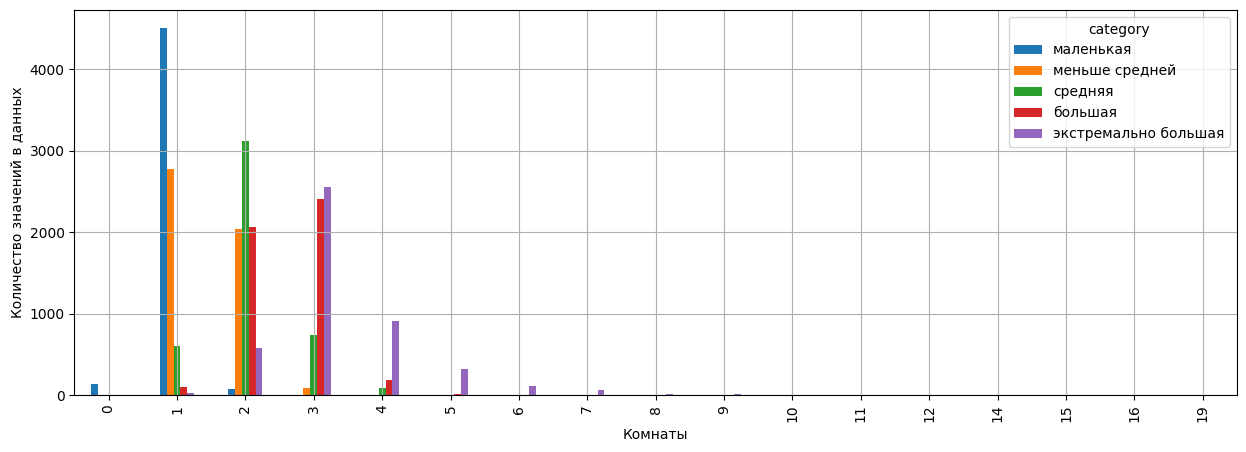

In [65]:
counts_hist(data_total_area_category, 'category', 'bar')

По полученному графику видно, что  в однокомнатных квартирах преобладают квартиры __малой площади__, до ``37.8`` кв.м, среди двухкомнатных — __средней площади__, до ``58.0`` кв.м. Начиная с трехкомнатной и далее преобладают квартиры __экстремально большого размера__ от ``75.1`` кв.м. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.  
Построим диаграмму для определение диапазонов, которые исключат выбросы. 

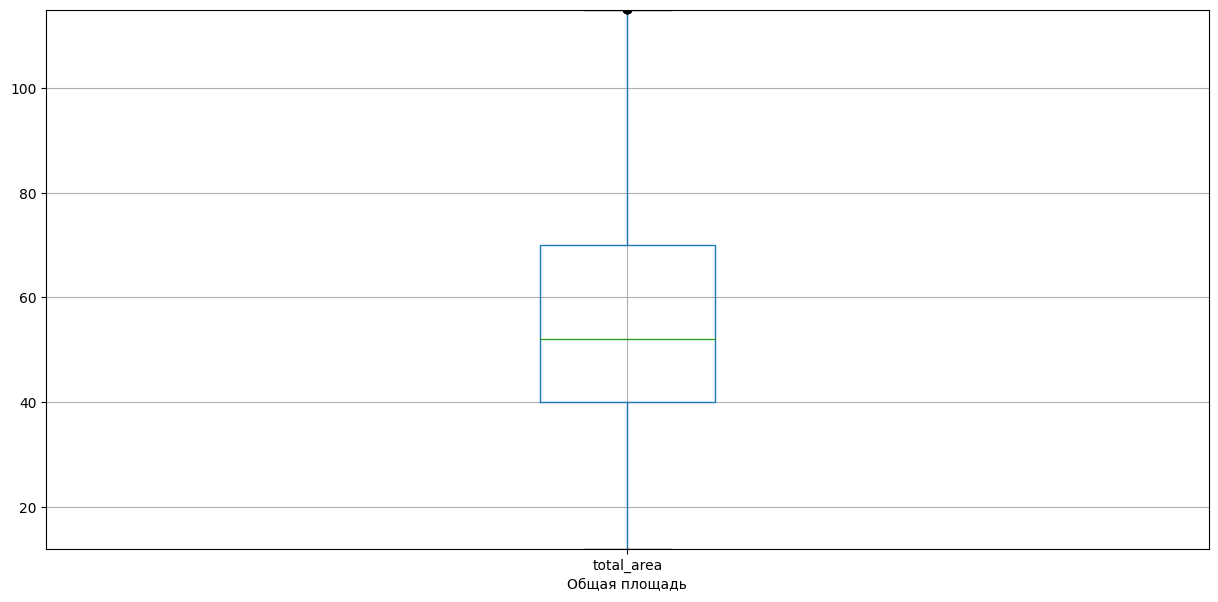

In [66]:
data_total_area_category.boxplot(column =['total_area'], grid=True, figsize=(15, 7))
plt.ylim(12, 115)
plt.xlabel('Общая площадь')
plt.show()

Если смотреть по столбцу общей площади в целом, то диапазон допустимой и преобладающей площади, которую целесообразно использовать в рассчетах, будет от ``12`` до ``115``. 

Ранее мы определили категории, отсортируем данные по ним и посмотрим на диапазоны, в которые попадают все категории. 

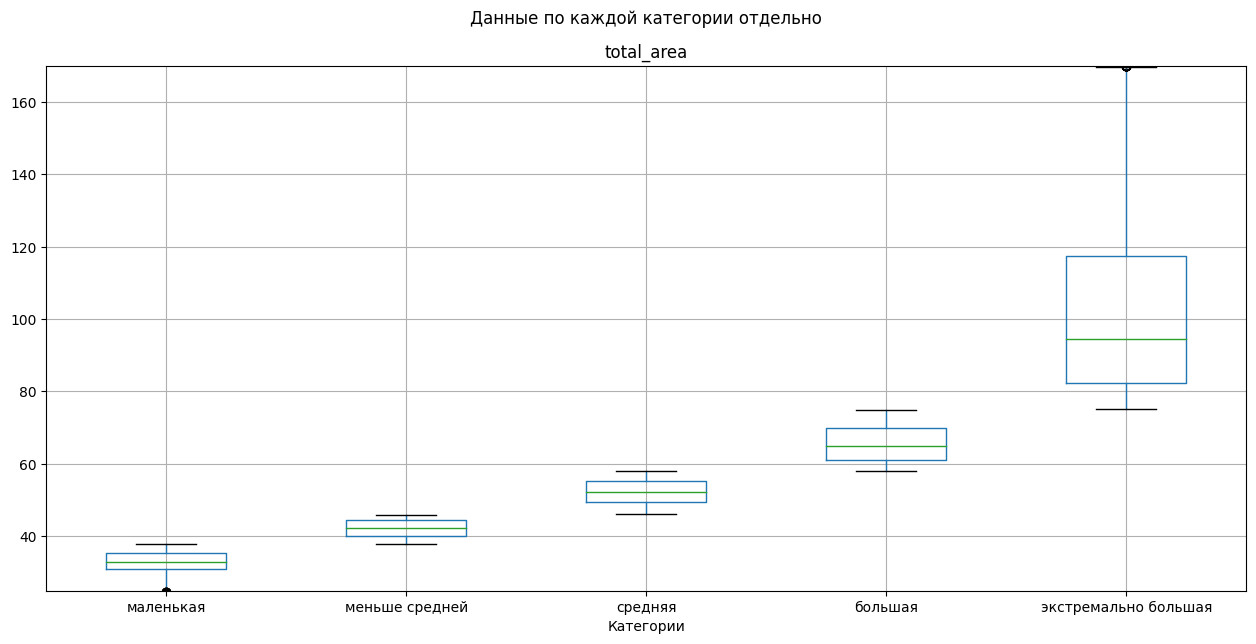

In [67]:
data_total_area_category.boxplot(by='category', column =['total_area'], grid=True, figsize=(15, 7))
plt.ylim(25, 170)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Если смотреть на общую площадь квартир в разрезе определенных категорий, то диапазон изменится, от ``25`` до ``170``. В этом случае в эти данные включены все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории. 

<a id="num82"></a>
### Параметр жилой площади ``living_area``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных.

In [68]:
mean_median_min_max(data, 'living_area')

'Среднее значение для столбца: living_area'

34.31

'Медианное значение для столбца: living_area'

30.3

'Минимальное значение для столбца: living_area'

2.0

'Максимальное значение для столбца: living_area'

409.7

В исследуемых данных диапазон жилой площади от ``2`` до ``409`` кв.м. Рассмотрим эти данные и определим нормальные данные, без выбросов, которые можно будет использовать в рассчетах. 

Посмотрим подробнее на параметр площади в представлении гистограммы. Поставим количество корзин ``100``, чтобы немного подробнее посмотреть на значения.

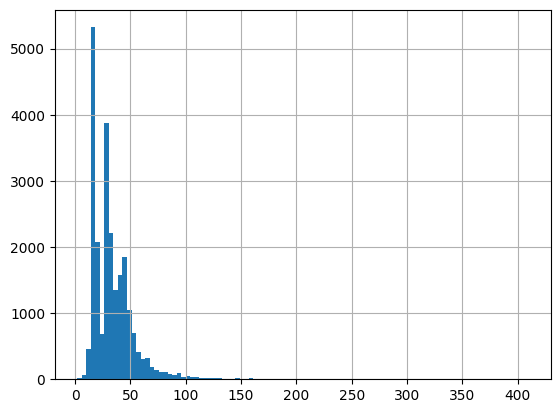

In [69]:
data['living_area'].hist(bins=100);

В диапазоне от ``0`` до ``100`` находятся основные выделяющиеся значения жилой площади, при этом в диапазоне от минимального значения жилой площади и до ``50`` кв.м, находится наибольшее количество квартир. 

Чтобы тщательно рассмотреть данные и перевести из плоскости цифр, в более логичное понимание, поделим их на условные категории. Выделим квартиры малой жилой площади, меньше средней, средней, большой и экстремально большой. 

Для этого распределим диапазон значений с помощью метода .quantile() с шагом 20%. Таким образом получится, следующий порядок в категориях: 
- __Маленькая__: 0-20%
- __Меньше средней__: 21-40%
- __Средняя__: 41-60%
- __Большая__: 61-80%
- __Экстремально большая__: 81-100%

In [70]:
data['living_area'].quantile([.20, .40, .60, .80])

0.2    17.8
0.4    27.7
0.6    33.0
0.8    45.0
Name: living_area, dtype: float64

По полученным результатам видно, что для каждой категории соответствуют значения жилой площади: 
- маленькая площадь: от ``0 до 17.8`` кв.м;
- меньше средней: от ``18.5 до 27.7`` кв.м;
- средняя: от ``30.4 до 33.0`` кв.м;
- большая: от ``33.1 до 45.0`` кв.м;
- экстремально большая: от ``45.1`` кв.м и выше.

Создадим новую таблицу данных, которую будем дополнять данными и работать, не нарушая порядок изначальной.

In [71]:
data_living_area_category = data.copy()

Зададим метки в зависимости от определенных диапазонов и добавим столбец ``category`` в таблицу ``data_living_area_category``.

In [72]:
bins = [0, 17.8, 27.7, 33.0, 45.0, float('inf')]
labels = ['маленькая', 'меньше средней', 'средняя', 'большая', 'экстремально большая']
data_living_area_category['category'] = pd.cut(data_living_area_category['living_area'], bins=bins, labels=labels)

Посмотрим на ``Топ-5`` минимальных и максимальных значений. 

In [73]:
largest_smallest(data_living_area_category, 'living_area')

'Топ-5 максимум:'

'living_area'

19540    409.7
5358     409.0
12401    347.5
4237     332.0
12859    322.3
Name: living_area, dtype: float64

'Топ-5 минимум:'

'living_area'

13915    2.00
21758    2.00
19904    2.99
23574    3.00
3242     3.00
Name: living_area, dtype: float64

В Топ-5 внесены довольно большие жилые площади, которые, превышают медианное значение (30.3 кв.м) по общим данным. Далее определим процентное отношение категорий в общих данных. 

In [74]:
sort_category(data_living_area_category, 'category', 'living_area')

,Количество в living_area,Процент от общего
category,,
большая,4930,20.997487
средняя,4759,20.269177
маленькая,4701,20.022147
меньше средней,4698,20.009370
экстремально большая,4391,18.701819


Доля квартир каждого типа жилой площади примерно одинакова, но все же в области исследования преобладают квартиры с __большой жилой площадью__ от ``33.1`` до ``45.0`` кв.м.

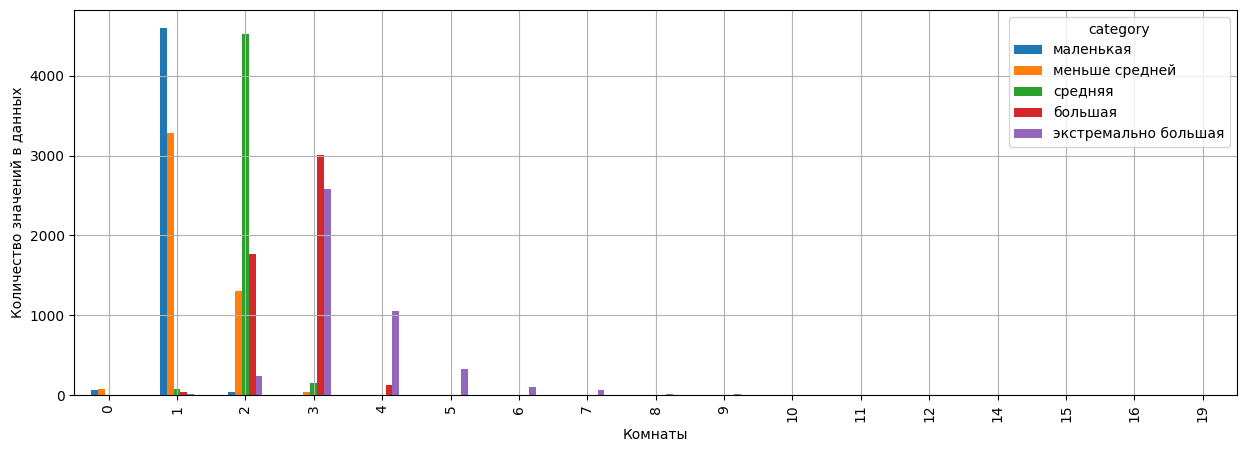

In [75]:
counts_hist(data_living_area_category, 'category', 'bar')

Видно, что в однокомнатных квартирах преобладают квартиры с __маленькой жилой площадью__. А уже в двухкомнатных, квартиры со __средней площадью__ заняли лидирующее положение. Трехкомнатные квартиры преимущественно имеют __большую жилую площадь__. Начиная с четырехкомнатных квартир, стабильно преобладают __экстремально большие площади__. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.  
Построим диаграмму для определение диапазонов, которые исключат выбросы. 

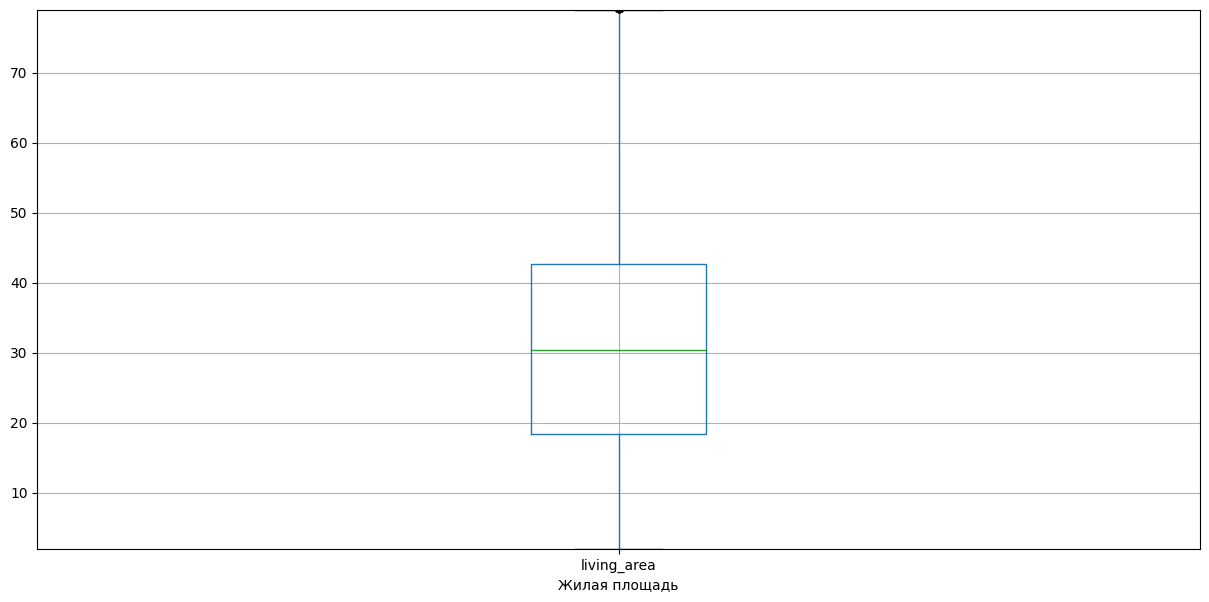

In [76]:
data_living_area_category.boxplot(column =['living_area'], grid=True, figsize=(15, 7))
plt.ylim(2, 79)
plt.xlabel('Жилая площадь')
plt.show()

Если смотреть по столбцу жилой площади, то диапазон допустимой и преобладающей площади, которую целесообразно использовать в рассчетах, будет от ``2`` до ``79`` кв.м. 

Ранее мы определили категории, отсортируем данные по ним и посмотрим на диапазоны, в которые попадают все категории.

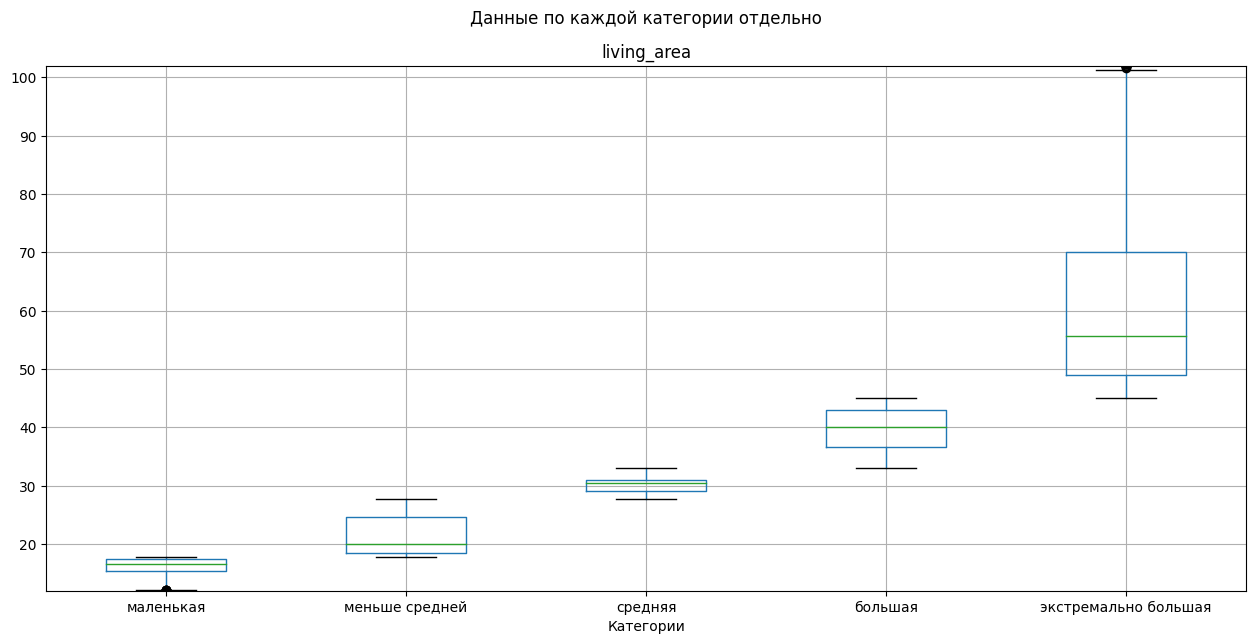

In [77]:
data_living_area_category.boxplot(by ='category', column =['living_area'], grid=True, figsize=(15, 7))
plt.ylim(12, 102)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Если смотреть в разрезе определенных категорий, то диапазон изменится, от ``12`` до ``102`` кв.м. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории. 

<a id="num83"></a>
### Параметр площади кухни ``kitchen_area``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных.

In [78]:
mean_median_min_max(data, 'kitchen_area')

'Среднее значение для столбца: kitchen_area'

10.41

'Медианное значение для столбца: kitchen_area'

9.01

'Минимальное значение для столбца: kitchen_area'

0.0

'Максимальное значение для столбца: kitchen_area'

112.0

Диапазон по площади кухонь у продаваемых квартир находится в диапазоне от ``0`` кв.м до ``112`` кв.м. Рассмотрим эти данные подробнее и определим площади кухонь с которыми будем работать дальше.

Посмотрим подробнее на параметр площади в представлении гистограммы. Поставим количество корзин ``100``, чтобы немного подробнее посмотреть на значения.

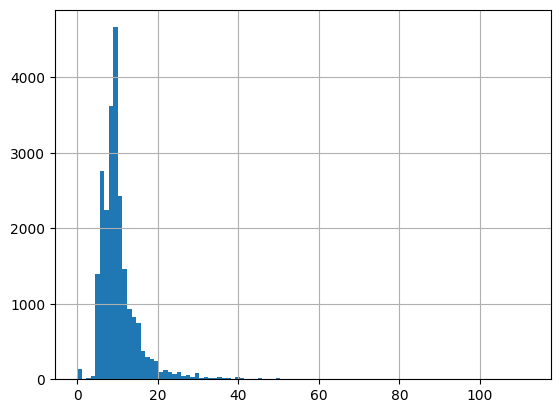

In [79]:
data['kitchen_area'].hist(bins=100);

Большая часть указанных кухонных площадей находится в диапазоне от ``0`` кв.м и до ``20`` кв.м. 
Также как и с жилой площадью, и с общей площадью квартиры, поделим площади кухни на условные категории. Выделим кухни малой площади, меньше средней, средней, большой и экстремально большой.

Для этого распределим диапазон значений с помощью метода .quantile() с шагом 20%. Таким образом получится, следующий порядок в категориях: 
- __Маленькая__: 0-20%
- __Меньше средней__: 21-40%
- __Средняя__: 41-60%
- __Большая__: 61-80%
- __Экстремально большая__: 81-100%

In [80]:
data['kitchen_area'].quantile([.20, .40, .60, .80])

0.2     7.00
0.4     8.70
0.6    10.00
0.8    12.35
Name: kitchen_area, dtype: float64

Таким образом получилось, что площади в зависимости от типов размещены в следующих диапазонах:

- маленькая кухня: ``от 0 до 7 кв.м``;
- меньше средней кухня: ``от 7.1 до 8.70 кв.м``;
- средняя кухня: ``от 8.71 до 10.0 кв.м``;
- большая кухня: ``от 10.1 до 12.35 кв.м``;
- экстремально большая кухня: ``от 12.36 кв.м и выше``.

Создадим новую таблицу данных, которую будем дополнять данными и работать, не нарушая порядок изначальной.

In [81]:
data_kitchen_area_category = data.copy()

Зададим метки в зависимости от определенных диапазонов и добавим столбец ``category`` в таблицу ``data_kitchen_area_category``.

In [82]:
bins = [0, 7, 8.70, 10, 12.35, float('inf')]
labels = ['маленькая', 'меньше средней', 'средняя', 'большая', 'экстремально большая']
data_kitchen_area_category['category'] = pd.cut(data_kitchen_area_category['kitchen_area'], bins=bins, labels=labels)

Посмотрим на ``Топ-5`` минимальных и максимальных значений.

In [83]:
largest_smallest(data_kitchen_area_category, 'kitchen_area')

'Топ-5 максимум:'

'kitchen_area'

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64

'Топ-5 минимум:'

'kitchen_area'

22200    0.0
22521    0.0
9511     0.0
9557     0.0
9579     0.0
Name: kitchen_area, dtype: float64

Действительно, в Топ-5 предоставлены аномально большие и маленькие кухни. При этом, тут также учтены квартиры, в которых площадь кухни не выделена в отдельную, либо находится не в квартире. Далее определим процентное отношение.

In [84]:
sort_category(data_kitchen_area_category, 'category', 'kitchen_area')

,Количество в kitchen_area,Процент от общего
category,,
средняя,5482,23.485563
маленькая,5451,23.352755
экстремально большая,4691,20.096821
большая,3909,16.746637
меньше средней,3809,16.318225


Разница между процентным соотношением категорий в общих данных есть. Таким образом в исследуемой территории преобладают кухни среднего размера от ``8.71`` до ``10.0`` кв.м. 

Посмотрим на соотношение размеров кухонь к количеству комнат.

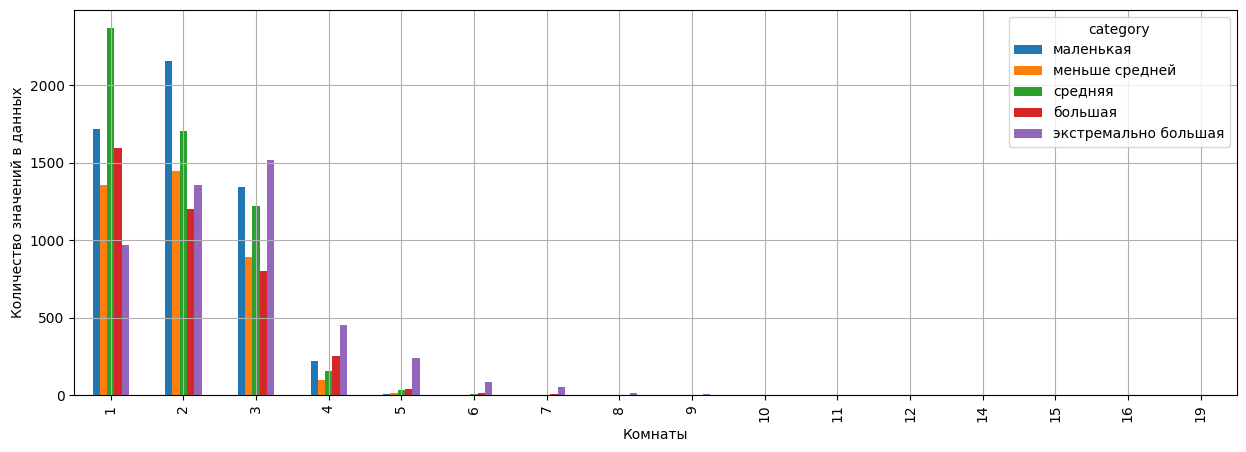

In [85]:
counts_hist(data_kitchen_area_category, 'category', 'bar')

В однокомнатных квартирах весьма ощутимо преобладают кухни __среднего размера__. Для двухкомнатных квартир характерны __маленькие кухни__. В трехкомнатных и далее преобладают __экстремально большие кухни__. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.  
Построим диаграмму для определение диапазонов, которые исключат выбросы. 

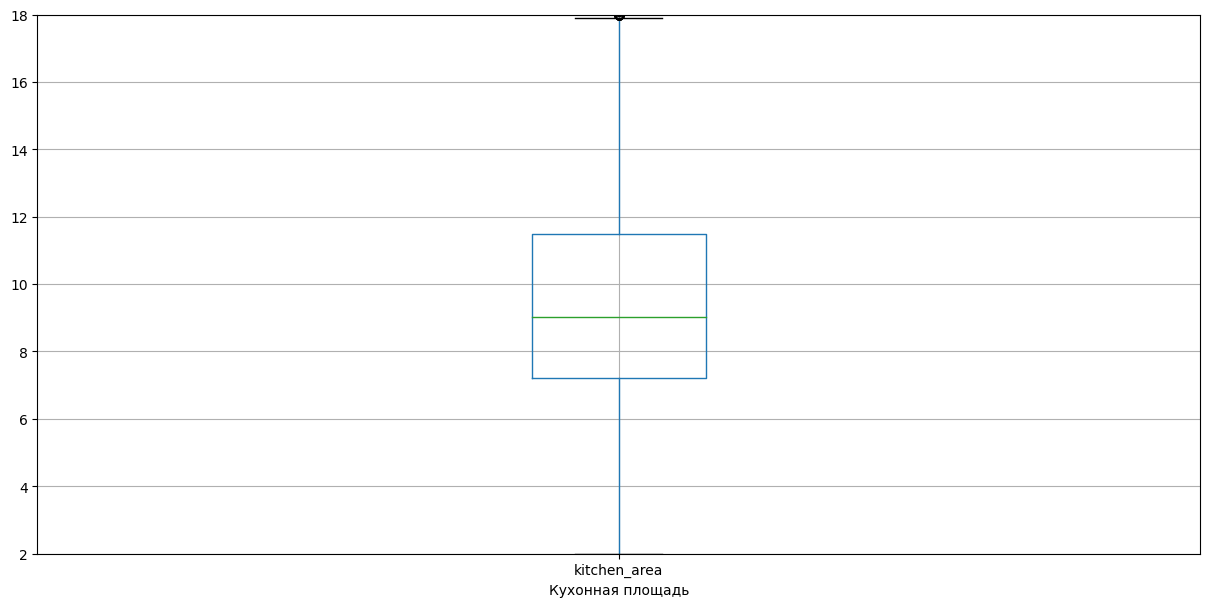

In [86]:
data_kitchen_area_category.boxplot(column =['kitchen_area'], grid=True, figsize=(15, 7))
plt.ylim(2, 18)
plt.xlabel('Кухонная площадь')
plt.show()

Если смотреть по столбцу общей площади в целом, то диапазон допустимой и преобладающей площади, которую целесообразно использовать в рассчетах, будет от ``2`` до ``18`` кв.м. 

Ранее мы определили категории, отсортируем данные по ним и посмотрим на диапазоны, в которые попадают все категории.

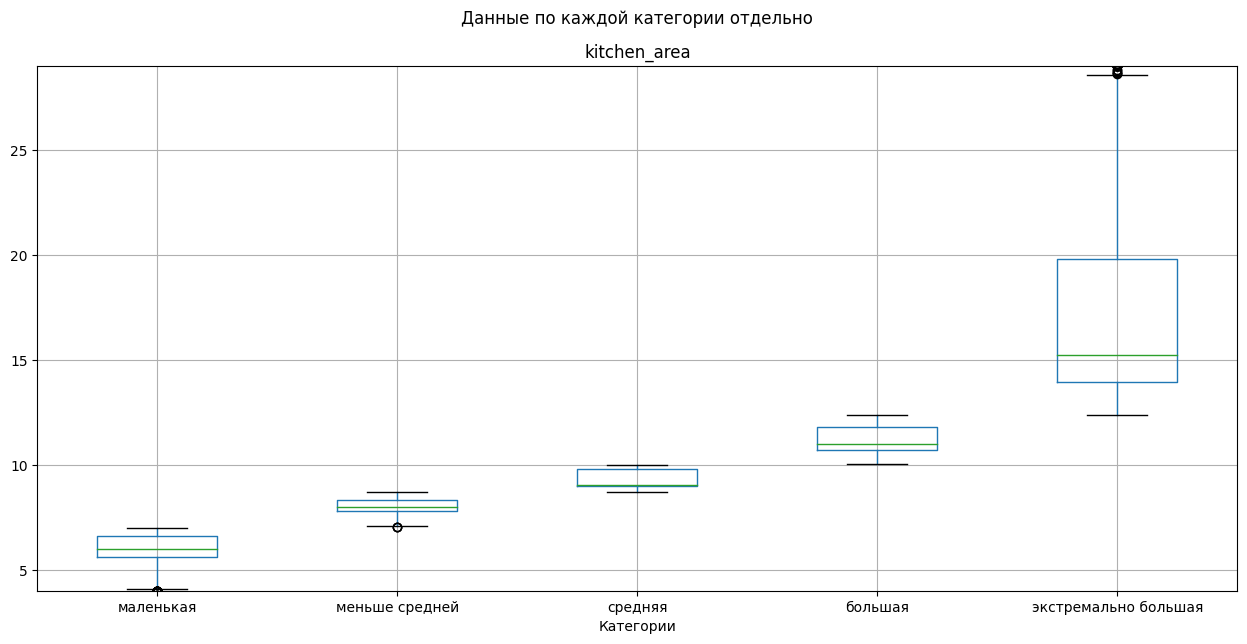

In [87]:
data_kitchen_area_category.boxplot(by ='category', column =['kitchen_area'], grid=True, figsize=(15, 7))
plt.ylim(4, 29)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Если смотреть на кухонную площадь квартир в разрезе определенных категорий, то диапазон изменился и теперь находится от ``4`` до ``29`` кв.м. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории. 

<a id="num84"></a>
### Общий вывод по трем параметрам площади квартир

Изучив данные по представленной недвижимости, в разрезе трех параметров: общей площади, жилой площади и площади кухни, можно выделить следующие основные характеристики. 

Больше всего выделяются параметры квартир с одной, двумя и тремя комнатами, тут данные наиболее «непостоянные» и имеют разное значение, порой, отличное от ожидаемого. 

В __однокомнатных квартирах__ преобладают: 
- в общей площади — категория квартир __маленького__ размера ``до 37.8 кв.м``;
- в жилой площади — категория __маленьких__ жилых площадей ``до 17.8 кв.м``;
- в площади кухонь — категория __средних__ кухонь ``от 8.71 до 10.0 кв.м``.


В __двухкомнатных квартирах__ преобладают: 
- в общей площади — категория квартир __среднего__ размера ``от 46.1 до 58.0 кв.м``;
- в жилой площади — категория __средних__ жилых площадей ``от 30.4 до 33.0 кв.м``;
- в площади кухонь — категория __маленьких__ кухонь ``до 7 кв.м``.


В __трехкомнатных  квартирах__ преобладают: 
- в общей площади — категория квартир __экстремально большого__ размера ``от 75.1 кв.м и выше``;
- в жилой площади — категория __больших__ жилых площадей ``от 33.1 до 45.0 кв.м``;
- в площади кухонь — категория __экстремально больших__ кухонь ``от 12.36 кв.м и выше``.


В __четырехкномнатных и далее__ квартирах преобладают: 
- в общей площади — категория квартир __экстремально большого__ размера ``от 75.1 кв.м и выше``;
- в жилой площади — категория __экстремально больших__ жилых площадей ``от 45.1 кв.м``;
- в площади кухонь — категория __экстремально больших__ кухонь ``от 12.36 кв.м и выше``.

Отдельно стоит отметить квартиры с __0 комнат, квартиры-студии__: 
- в общей площади — категория квартир __маленького__ размера ``до 37.8 кв.м``;
- в жилой — категория жилых площадей __меньше среднего__ ``от 18.5 до 27.7 кв.м``.


Таким образом, сборный образ однокомнатной квартиры: маленькая квартира со средней кухней. Двухкомнатной — средняя квартира, но с маленькой кухней. Трехкомнатные квартиры — это экстремально большие квартиры с относительно большой жилой площадью и экстремально большой кухней. 

<a id="num85"></a>
### Параметр цены на момент снятия объявления ``last_price``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных. 
На этапе обработки данных был создан столбец с ценами ``last_price_m`` в него включены значения такие же как в оригинальном столбце ``last_price``, но в более компактном виде. Будем работать с этим столбцом. 

In [88]:
mean_median_min_max(data, 'last_price_m')

'Среднее значение для столбца: last_price_m'

6.57

'Медианное значение для столбца: last_price_m'

4.65

'Минимальное значение для столбца: last_price_m'

0.43

'Максимальное значение для столбца: last_price_m'

763.0

Параметр цены за квартиру находится в диапазоне от ``0.43 млн до 763.0 млн``. Разброс данных довольно большой, рассмотрим эти данные подробнее, чтобы определить приемлемый для работы диапазон. 

Посмотрим подробнее на параметр цены в представлении гистограммы. Поставим количество корзин ``10``, чтобы немного подробнее посмотреть на значения.

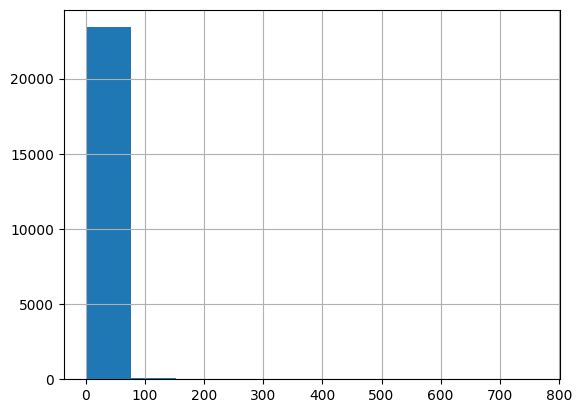

In [89]:
data['last_price_m'].hist(bins=10);

Судя по графику основные цены находятся в пределах 100 млн. 

Посмотрим на распределение максимальных цен по квартирам в зависимости от количества комнат. 

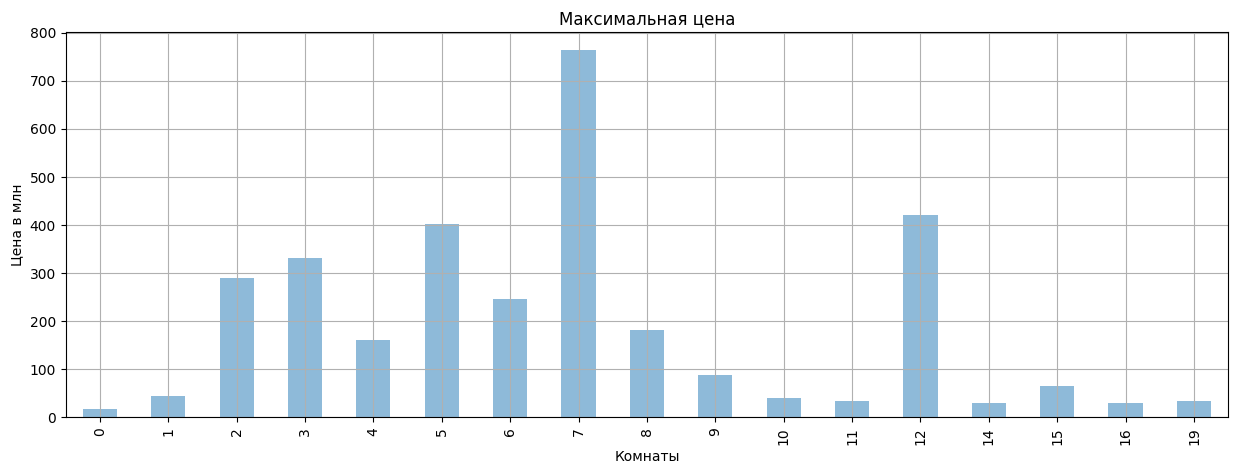

In [90]:
data.pivot_table(index='rooms', values='last_price_m', aggfunc='max').plot(y='last_price_m', kind='bar', figsize=(15, 5), title='Максимальная цена', grid=True, legend=False, alpha=0.5)
plt.ylabel('Цена в млн')
plt.xlabel('Комнаты')
plt.show()

Квартиры на семь и двенадцать комнат сильно выбиваются из остальных цен. Примем это во внимание, но пока ничего с этим делать не будем. 

Чтобы разобраться со стоимостью жилья и получить как можно больше информации об этом параметре, обратимся к распределению по категориям и вычислению процентов от общего количества данных. 

Цены на квартиры можно поделить на пять основных категорий:
- __Эконом-класс__: допустим, что в эту категорию входят квартиры с наименьшей ценой, обычно с небольшими площадями и базовыми удобствами;
- __Средний класс__: допустим, что в эту категорию входят квартиры средней ценовой категории, с более комфортными условиями проживания, расположением и площадью;
- __Бизнес-класс__: допустим, что в эту категорию входят более просторные и современные квартиры с более высоким уровнем комфорта и удовлетворительным расположением;
- __Бизнес-класс плюс__: допустим, что в эту категорию входят дорогостоящие квартиры, они обычно имеют большую площадь и хорошее расположение;
- __Элитный класс__: допустим, что в эту категорию входят редкие и уникальные квартиры, которые имеют особую ценность из-за архитектурного дизайна, площадей или расположения. Они могут быть представлены на рынке недвижимости в ограниченном количестве и иметь высокую стоимость. 

Для категоризации поделим цены с помощью метода .quantile() и шага 20%. цена: 
- __эконом-класс__: 0-20% 
- __комфорт-класс__: 21-40% 
- __бизнес-клас__: 41-60% 
- __бизнес-класс плюс__: 61-80% 
- __элитный класс__: 81-100%

In [91]:
data['last_price_m'].quantile([.20, .40, .60, .80])

0.2    3.20
0.4    4.15
0.6    5.30
0.8    7.60
Name: last_price_m, dtype: float64

Таким образом получилось, что цены в зависимости от типов размещены в следующих диапазонах:

- эконом-класс: ``от 0 до 3.20 млн``;
- комфорт-класс: ``от 3.21 до 4.15 млн``;
- бизнес-класс: ``от 4.16 до 5.30 млн``;
- бизнес-класс плюс: ``от 5.31 до 7.60 млн``;
- элитный класс: ``от 7.61 млн``.

Создадим новую таблицу данных, которую будем дополнять данными и работать, не нарушая порядок изначальной.

In [92]:
data_last_price_m_category = data.copy()

Зададим метки в зависимости от определенных диапазонов и добавим столбец ``category`` в таблицу ``data_last_price_m_category``. 

In [93]:
bins = [0, 3.20, 4.15, 5.30, 7.60, float('inf')]
labels = ['эконом-класс', 'комфорт-класс', 'бизнес-класс', 'бизнес-класс плюс', 'элитный класс']
data_last_price_m_category['category'] = pd.cut(data_last_price_m_category['last_price_m'], bins=bins, labels=labels)

Посмотрим на ``Топ-5`` минимальных и максимальных значений. 

In [94]:
largest_smallest(data_last_price_m_category, 'last_price_m')

'Топ-5 максимум:'

'last_price_m'

12971    763.0
19540    420.0
14706    401.3
1436     330.0
15651    300.0
Name: last_price_m, dtype: float64

'Топ-5 минимум:'

'last_price_m'

17456    0.43
5698     0.45
16219    0.45
21912    0.47
23484    0.47
Name: last_price_m, dtype: float64

В Топ-5 внесены довольно большие цены, которые сильно превосходят медианное значение (4.65 млн) по общим данным. Далее определим процентное отношение категорий в общих данных.

In [95]:
sort_category(data_last_price_m_category, 'category', 'last_price_m')

,Количество в last_price_m,Процент от общего
category,,
эконом-класс,4866,20.724903
бизнес-класс,4737,20.175476
элитный класс,4656,19.830487
комфорт-класс,4629,19.715490
бизнес-класс плюс,4591,19.553644


Из данных видно, что доля квартир примерно одинакова, но по исследуемой области преобладают квартиры с ценой до ``3.20 млн``, квартиры эконом-класса. 

Посмотрим на соотношение цены квартир к количеству комнат.

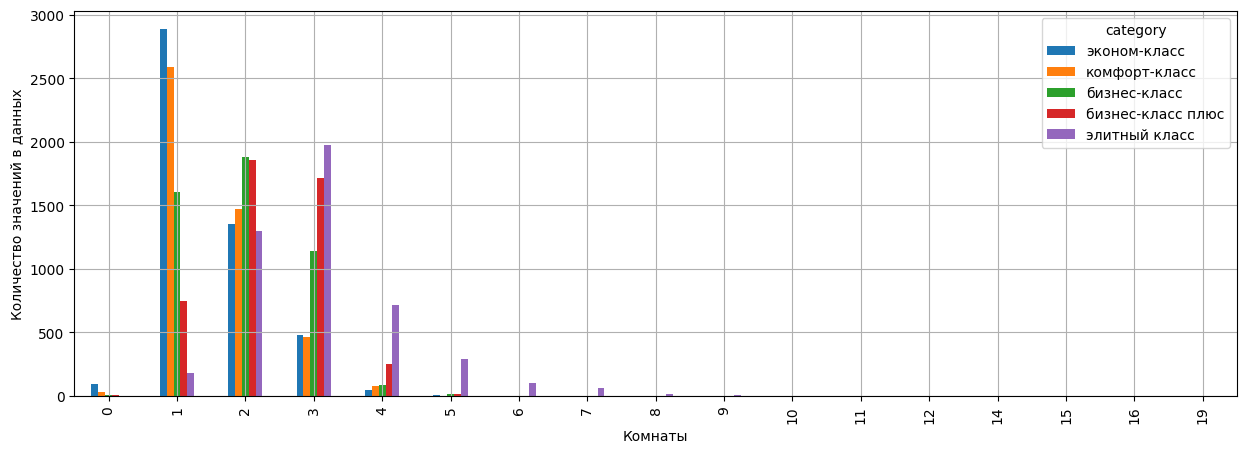

In [96]:
counts_hist(data_last_price_m_category, 'category', 'bar')

По полученному графику видно, что  в однокомнатных квартирах преобладают квартиры __эконом-класса__, ``до 3.20 млн``, среди двухкомнатных — __бизнесс-класса__, ``от 4.16 до 5.30 млн``. Начиная с трехкомнатной и далее преобладают квартиры __элитного класса__ от ``от 7.61 млн``.

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.
Построим диаграмму для определение диапазонов, которые исключат выбросы.

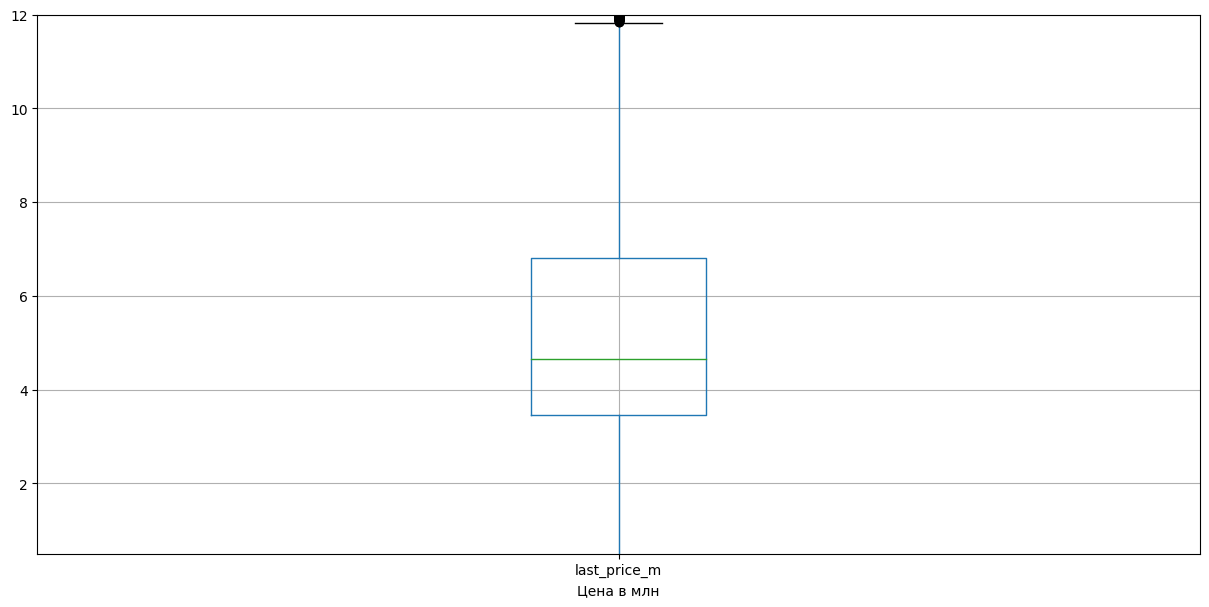

In [97]:
data_last_price_m_category.boxplot(column =['last_price_m'], grid=True, figsize=(15, 7))
plt.ylim(0.5, 12)
plt.xlabel('Цена в млн')
plt.show()

Если смотреть по столбцу цены, то диапазон допустимой, которую целесообразно использовать в рассчетах, будет от ``0.5`` до ``12`` млн. 

Ранее мы определили категории, отсортируем данные по ним и посмотрим на диапазоны, в которые попадают все категории.

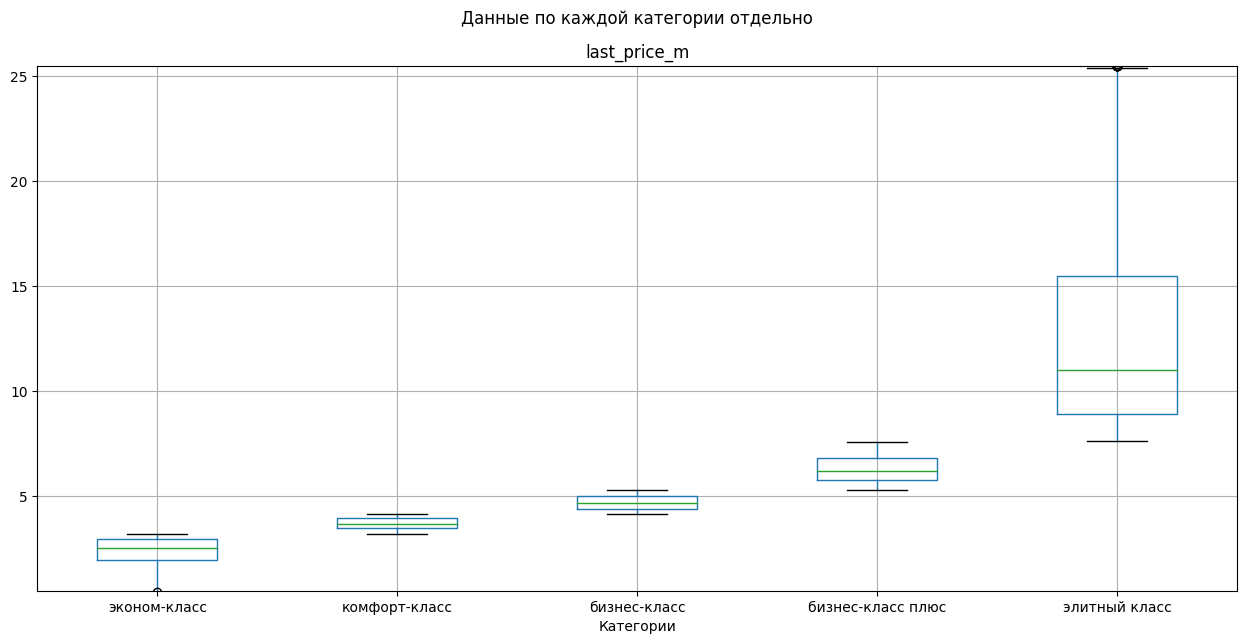

In [98]:
data_last_price_m_category.boxplot(by ='category', column =['last_price_m'], grid=True, figsize=(15, 7))
plt.ylim(0.5, 25.5)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Если смотреть на цены квартир в разрезе определенных категорий, то диапазон изменится и будет от ``0.5`` до ``25.5`` млн. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории. 

<a id="num86"></a>
### Параметр количества комнат ``rooms``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных.

In [99]:
mean_median_min_max(data, 'rooms')

'Среднее значение для столбца: rooms'

2.08

'Медианное значение для столбца: rooms'

2.0

'Минимальное значение для столбца: rooms'

0

'Максимальное значение для столбца: rooms'

19

Количество комнат в изучаемых данных от 0 до 19. Рассмотрим эти данные подробнее и определим с каким срезом будем работать далее. 

Посмотрим подробнее на комнаты в представлении гистограммы. Поставим количество корзин ``40``, чтобы немного подробнее посмотреть на значения.

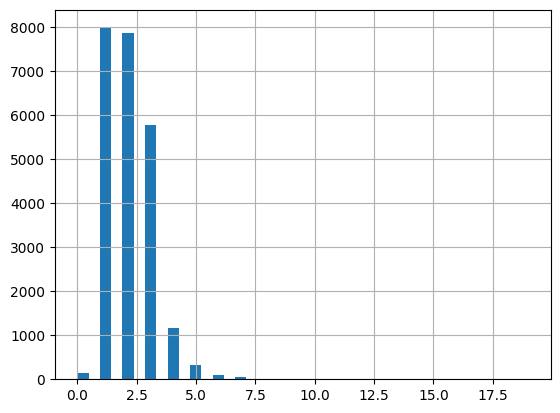

In [100]:
data['rooms'].hist(bins=40);

Рассмотрим положение с комнатами более подробно, найдем процентную часть от общего количества квартир и построим столбчатый график для наглядности. 

,total_area,percent
rooms,,
0,137,0.583500
1,8004,34.090038
2,7865,33.498020
3,5777,24.604966
4,1175,5.004472
5,326,1.388475
6,105,0.447208
7,59,0.251288
8,12,0.051110


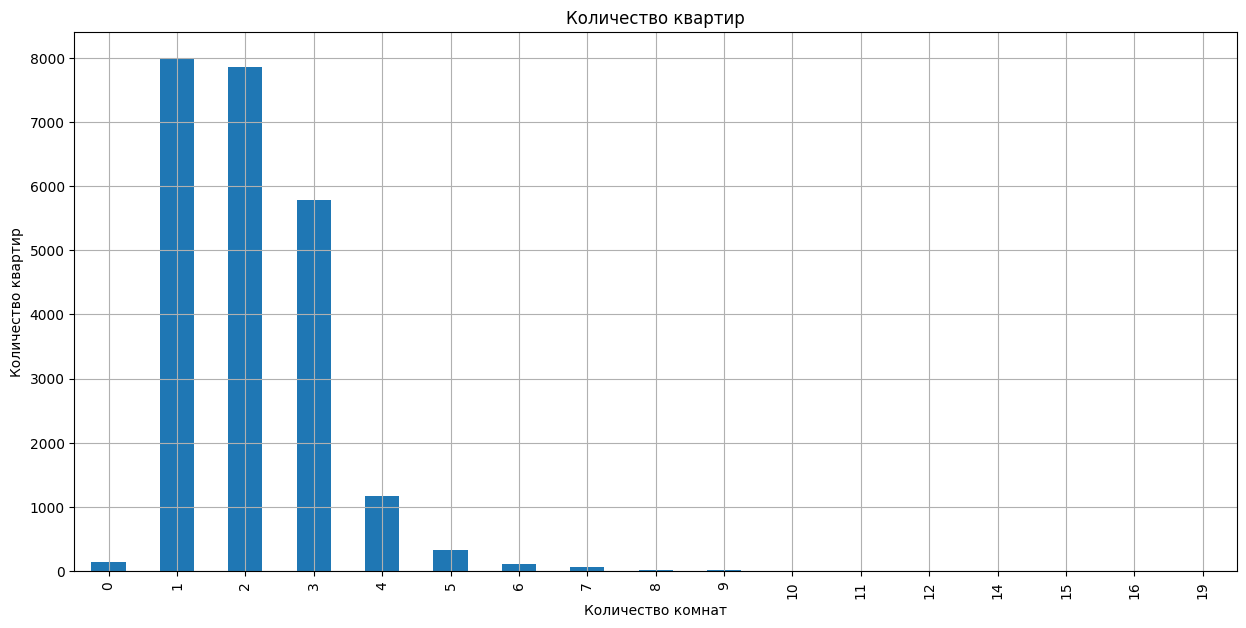

In [101]:
data_rooms_category = data.pivot_table(index='rooms', values='total_area', aggfunc='count')
data_rooms_category['percent'] = (data_rooms_category['total_area'] / data_rooms_category['total_area'].sum()) * 100
display(data_rooms_category)

data_rooms_category.plot(y='total_area', kind='bar', figsize=(15, 7), legend=False, grid=True, title='Количество квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

В данных больше всего квартир с комнатами от 1 до 5, остальные варианты представленны либо малым количеством квартир, либо и вовсе единичными экземплярами. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе. Построим диаграмму для определение диапазонов, которые исключат выбросы.

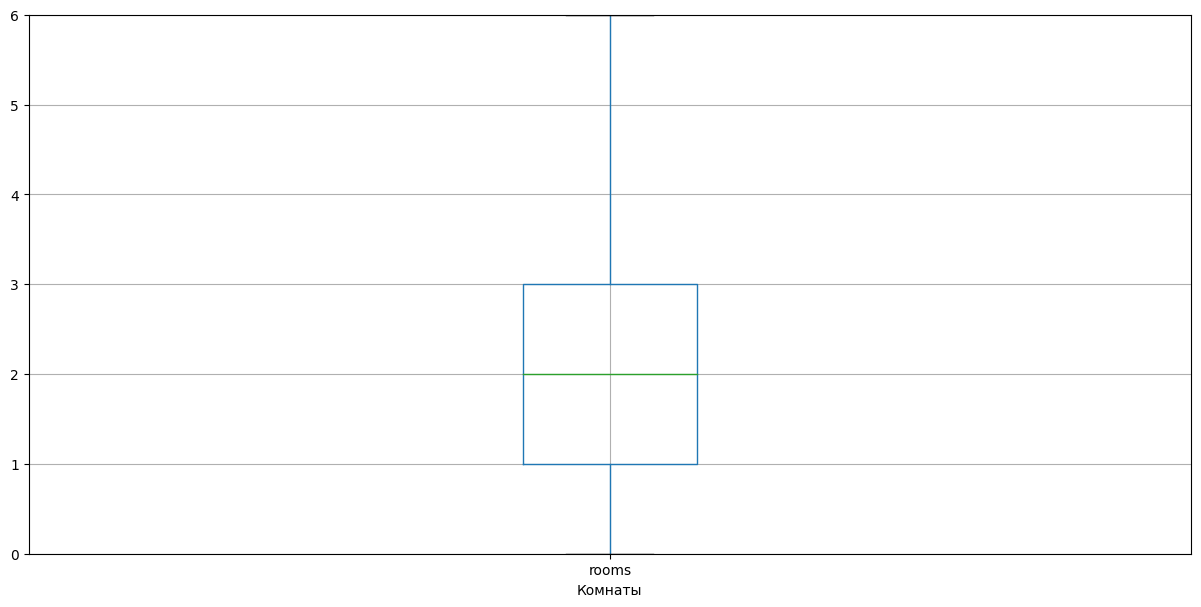

In [102]:
data.boxplot(column =['rooms'], grid=True, figsize=(15, 7))
plt.ylim(0, 6)
plt.xlabel('Комнаты')
plt.show()

Больше всего квартир укладывается в диапазон ``от 0 до 6 комнат``, остановимся на этом и не будем в дальнейших рассчетах использовать другие, слабо представленные, данные. 

<a id="num87"></a>
### Параметр высоты потолков ``ceiling_height``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных.

In [103]:
mean_median_min_max(data, 'ceiling_height')

'Среднее значение для столбца: ceiling_height'

2.7

'Медианное значение для столбца: ceiling_height'

2.7

'Минимальное значение для столбца: ceiling_height'

2.0

'Максимальное значение для столбца: ceiling_height'

8.3

Из данных видно, что высота потолков находится в пределах ``от 2 м до 8.3 м``. Так как данные довольно разнообразные и сильно отличаются от медианного значения, попробуем выделить то, с чем будем работать далее. 

Посмотрим подробнее на параметр высоты потолков в представлении гистограммы. Поставим количество корзин ``100``, чтобы немного подробнее посмотреть на значения.

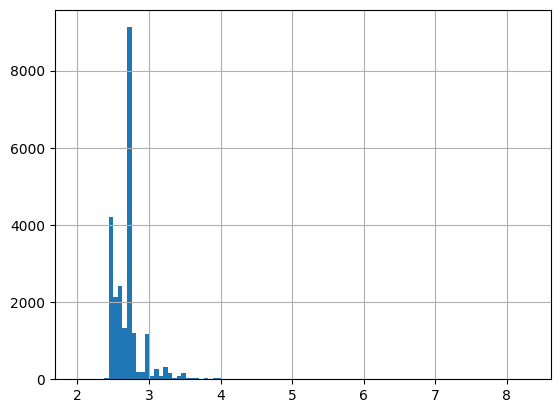

In [104]:
data['ceiling_height'].hist(bins=100);

Основное значение потолков находится между двумя и тремя метрами. 

Так как высоты потолков довольно разнообразны, постараемся их классифицировать. Предположим, что есть пять категорий на которые делим потолки по высоте: 
- __низкие__ — потолки, которые находятся в жилье низкой ценовой категории, либо в квартирах старого фонда;
- __ниже среднего__ — довольно комфортная высота потолка, предположим, что пробладает в в квартирах нижней и средней ценовой категории;
- __средние__ — средняя высота потолка, которая является преобладающей в большинстве типов квартир;
- __выше среднего__ — высокие потолки, которые, предположим, находятся в квартирах средней и выше средней ценовых категориях.  
- __высокие__ — присутствуют в дорогом жилье или эксклюзивных объектах.

Для категоризации поделим квартиры с помощью метода .quantile() и шага 20%.
Тип потолков:
- __низкие__: 0-20%
- __ниже среднего__: 21-40%
- __средние__: 41-60%
- __выше среднего__: 61-80%
- __высокие__: 81-100%

In [105]:
data['ceiling_height'].quantile([.20, .40, .60, .80])

0.2    2.55
0.4    2.65
0.6    2.70
0.8    2.75
Name: ceiling_height, dtype: float64

Таким образом получилось, что потолки в зависимости от типов размещены в следующих диапазонах:

- низкие: ``до 2,55 м``;
- ниже среднего : ``от 2,56 до 2.65 м``;
- средние : ``от 2.66 до 2.70 м``;
- выше среднего: ``от 2,71 до 2,75м``;
- высокие : ``от 2.76 м и выше``.

Создадим новую таблицу данных, которую будем дополнять данными и работать, не нарушая порядок изначальной.

In [106]:
data_ceiling_height_category = data.copy()

Зададим метки в зависимости от определенных диапазонов и добавим столбец ``category`` в таблицу ``data_ceiling_height_category``. 

In [107]:
bins = [0, 2.55, 2.65, 2.70, 2.75, float('inf')]
labels = ['низкие', 'ниже среднего', 'средние', 'выше среднего', 'высокие']
data_ceiling_height_category['category'] = pd.cut(data_ceiling_height_category['ceiling_height'], bins=bins, labels=labels)

Посмотрим на ``Топ-5`` минимальных и максимальных значений. 

In [108]:
largest_smallest(data_total_area_category, 'ceiling_height')

'Топ-5 максимум:'

'ceiling_height'

5863     8.3
3474     8.0
17442    8.0
15743    8.0
20264    6.0
Name: ceiling_height, dtype: float64

'Топ-5 минимум:'

'ceiling_height'

11352    2.0
2572     2.0
20520    2.0
4212     2.0
16884    2.0
Name: ceiling_height, dtype: float64

В Топ-5 попали довольно высокие потолки, от 6 до 8.3, это сильно больше медианного значения ``2.7 м``. Далее определим процентное отношение категорий в общих данных. 

In [109]:
sort_category(data_ceiling_height_category, 'category', 'ceiling_height')

,Количество в ceiling_height,Процент от общего
category,,
средние,7896,33.630052
низкие,6162,26.244729
высокие,4246,18.084245
ниже среднего,3862,16.448741
выше среднего,1313,5.592231


Из данных видно, что доля квартир в разрезе категорий потолков довольно разнообразна, больше всего представленно данных с потолками средней высоты ``от 2.66 до 2.70 м``. 

Посмотрим на соотношение высоты потолков к количеству комнат. 

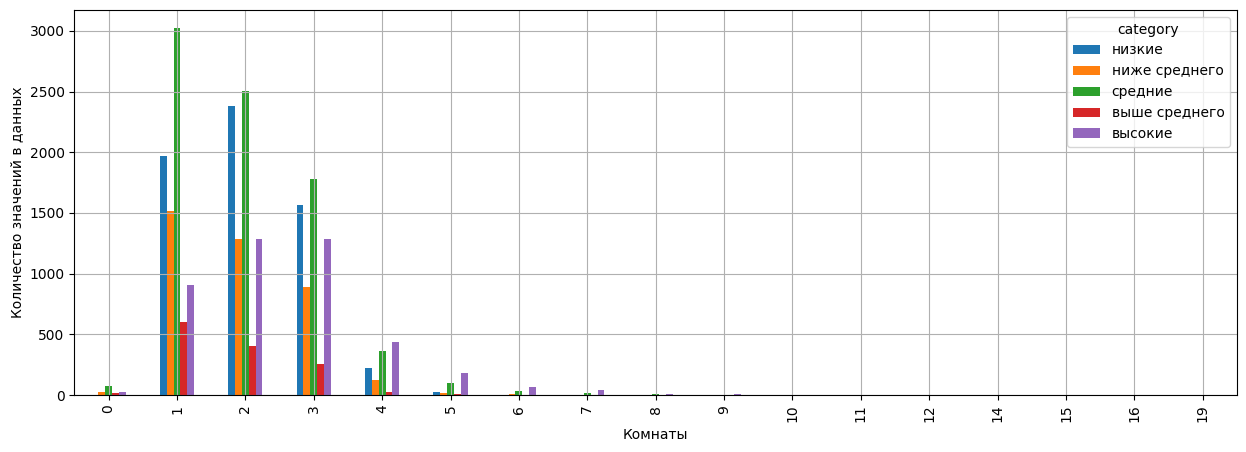

In [110]:
counts_hist(data_ceiling_height_category, 'category', 'bar')

По представленному графику видно, что средние потолки ``от 2.66 до 2.70 м`` преобладают в квартирах с комнатами от одной до трех, от четырех и далее комнат, квартиры преимущественно имеют высокие потолки ``от 2.76 м и выше``.

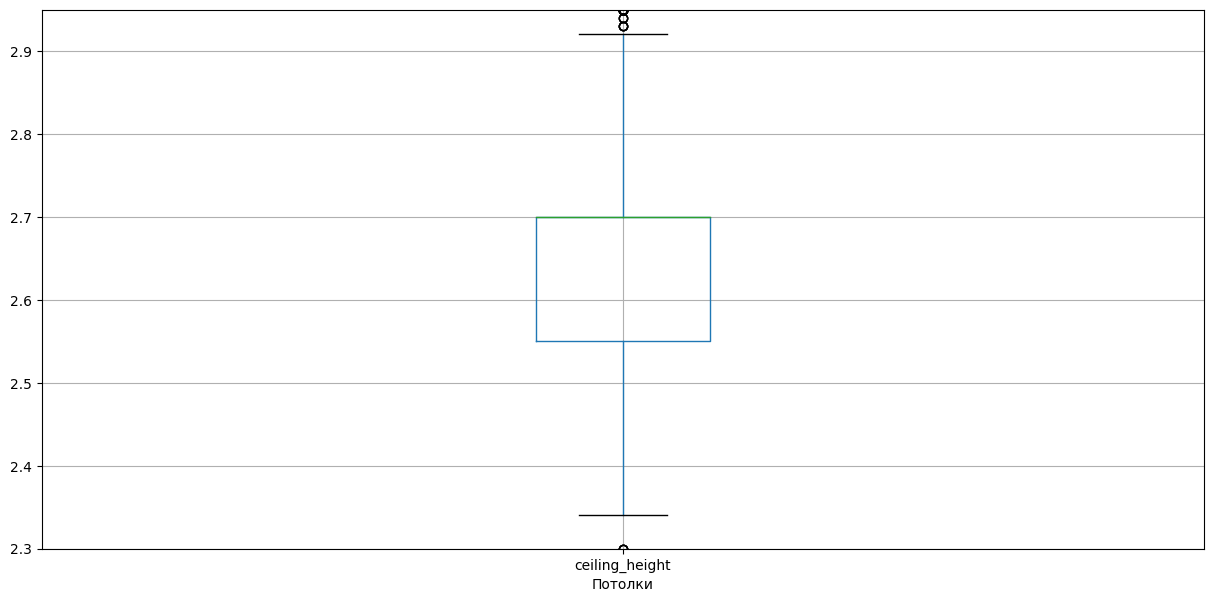

In [111]:
data_ceiling_height_category.boxplot(column =['ceiling_height'], grid=True, figsize=(15, 7))
plt.ylim(2.30, 2.95)
plt.xlabel('Потолки')
plt.show()

Если смотреть по столбцу высоты потолков в целом, то диапазон допустимой и преобладающей высоты, которую целесообразно использовать в рассчетах, будет от ``2.30`` до ``2.95`` м. 

Ранее мы определили категории, отсортируем данные по ним и посмотрим на диапазоны, в которые попадают все категории.

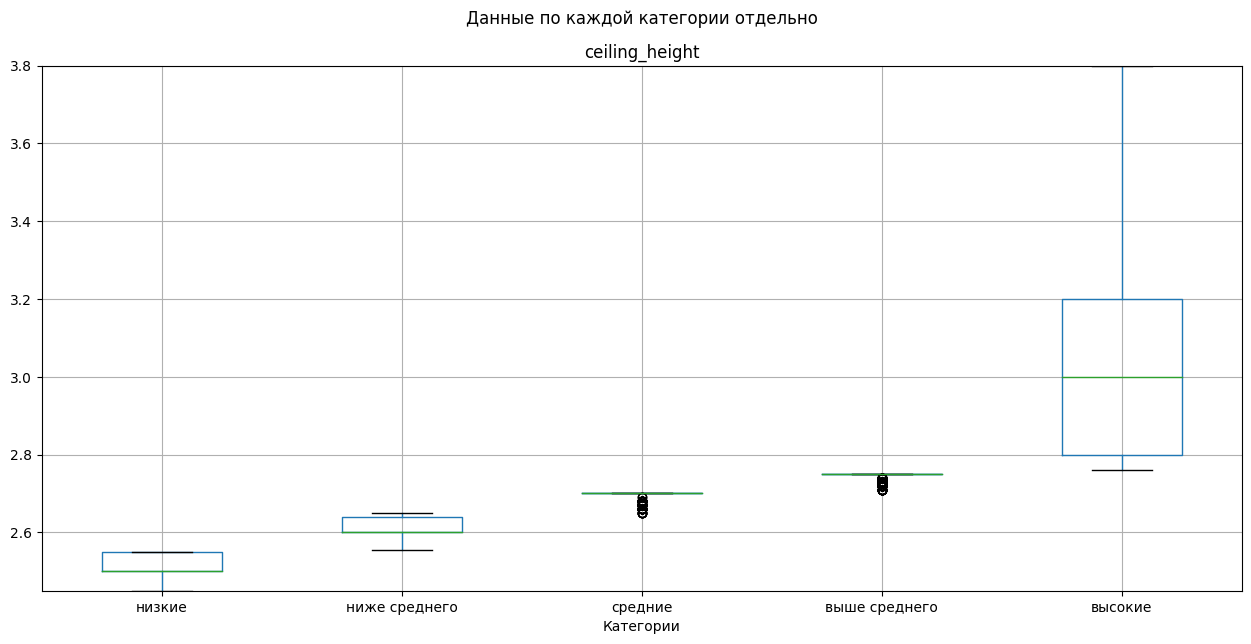

In [112]:
data_ceiling_height_category.boxplot(by ='category', column =['ceiling_height'], grid=True, figsize=(15, 7))
plt.ylim(2.45, 3.8)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Если смотреть на высоту потолков квартир в разрезе определенных категорий, то диапазон изменится, от ``2.45`` до ``3.8`` м. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории. 

<a id="num88"></a>
### Параметр этажа квартиры ``floor``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных.

In [113]:
mean_median_min_max(data, 'floor')

'Среднее значение для столбца: floor'

5.89

'Медианное значение для столбца: floor'

4.0

'Минимальное значение для столбца: floor'

1

'Максимальное значение для столбца: floor'

33

Количество этажей, которые представлены в данных находятся в диапазоне от 1 до 33. 

Посмотрим подробнее на этажи в представлении гистограммы. Поставим количество корзин ``100``, чтобы немного подробнее посмотреть на значения.

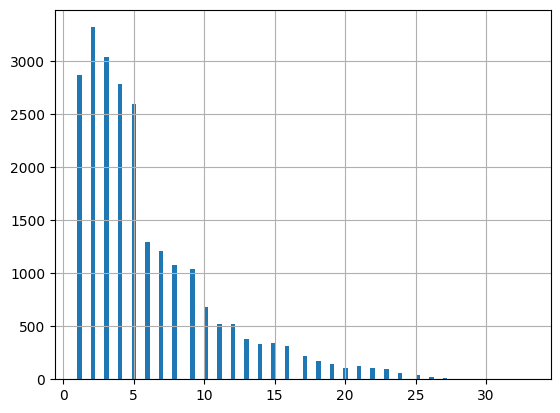

In [114]:
data['floor'].hist(bins=100);

Рассмотрим положение с этажами более подробно, найдем процентную часть от общего количества квартир и построим столбчатый график для наглядности.

,total_area,percent
floor,,
1,2877,12.253503
2,3323,14.153073
3,3043,12.960518
4,2785,11.861664
5,2599,11.069466
6,1297,5.524085
7,1211,5.157801
8,1078,4.591337
9,1044,4.446527


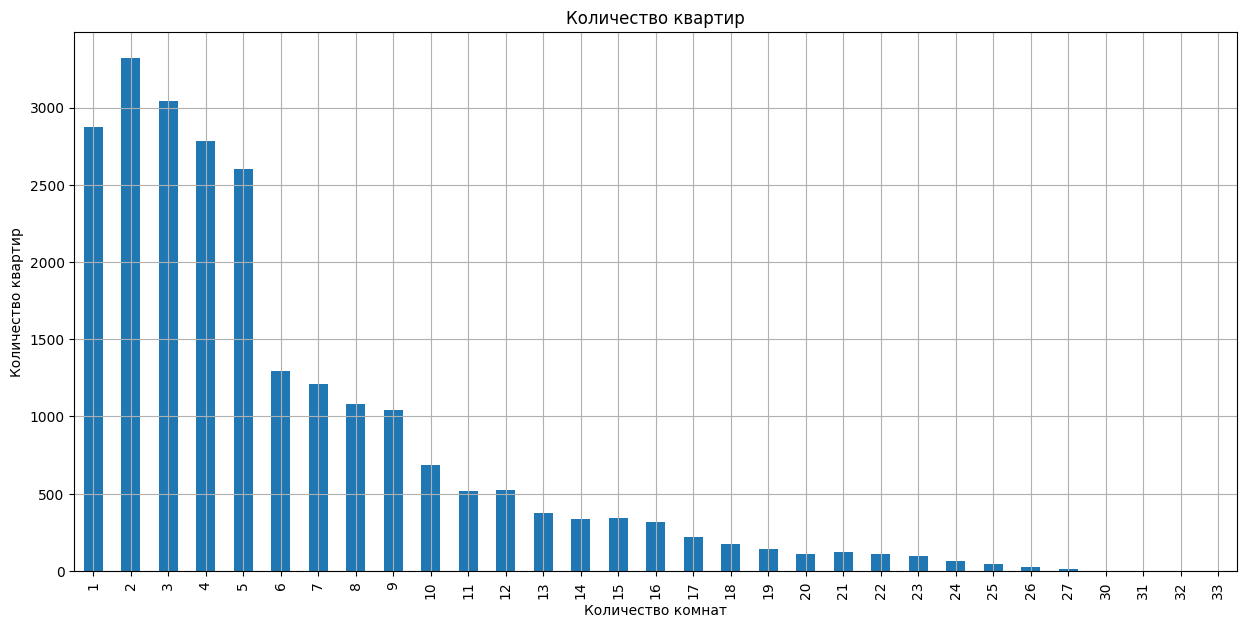

In [115]:
data_floor_category = data.pivot_table(index='floor', values='total_area', aggfunc='count')
data_floor_category['percent'] = (data_floor_category['total_area'] / data_floor_category['total_area'].sum()) * 100
display(data_floor_category)

data_floor_category.plot(y='total_area', kind='bar', figsize=(15, 7), legend=False, grid=True, title='Количество квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир находятся на этажах __с первого по пятый__. На остальных этажах тоже представленно много квартир, пожалуй, все квартиры до 25 этажа можно учитывать в данных. Рассмотрим это подробнее.

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе. Построим диаграмму для определение диапазонов, которые исключат выбросы.

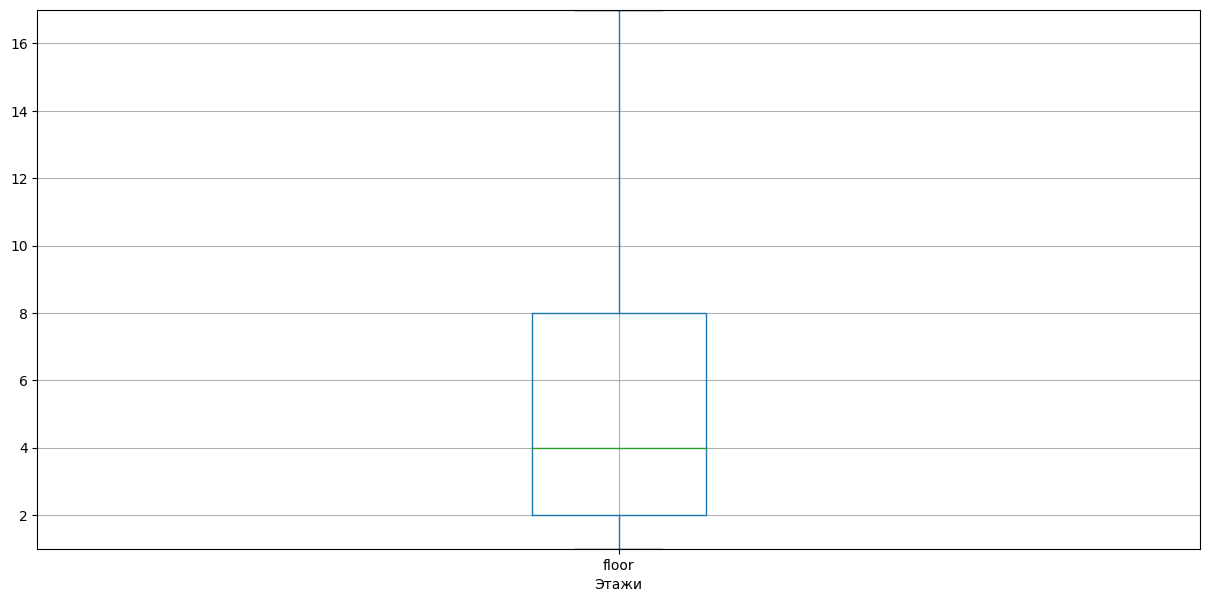

In [116]:
data.boxplot(column =['floor'], grid=True, figsize=(15, 7))
plt.ylim(1, 17)
plt.xlabel('Этажи')
plt.show()

Больше всего квартир укладывается в диапазон на этажах от ``1 до 17``, остановимся на этом и не будем в дальнейших рассчетах использовать другие, слабо представленные, данные.

<a id="num89"></a>
### Параметр типа этажа ``floor_type``

Посмотрим подробнее на типы этажей в представлении гистограммы. Поставим количество корзин 20.

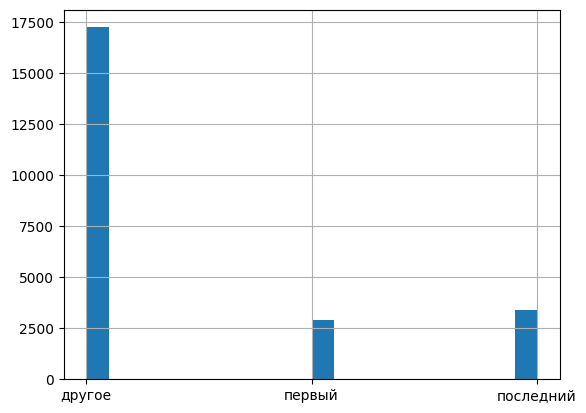

In [117]:
data['floor_type'].hist(bins=20);

Далее определим процентное отношение категорий в общих данных.

In [118]:
sort_category(data, 'floor_type', 'floor')

,Количество в floor,Процент от общего
floor_type,,
другое,17229,73.380468
последний,3373,14.366029
первый,2877,12.253503


Ярче всего представленные данные из категории этажей __«Другое»__. 

Посмотрим на соотношение размеров квартир к количеству комнат.

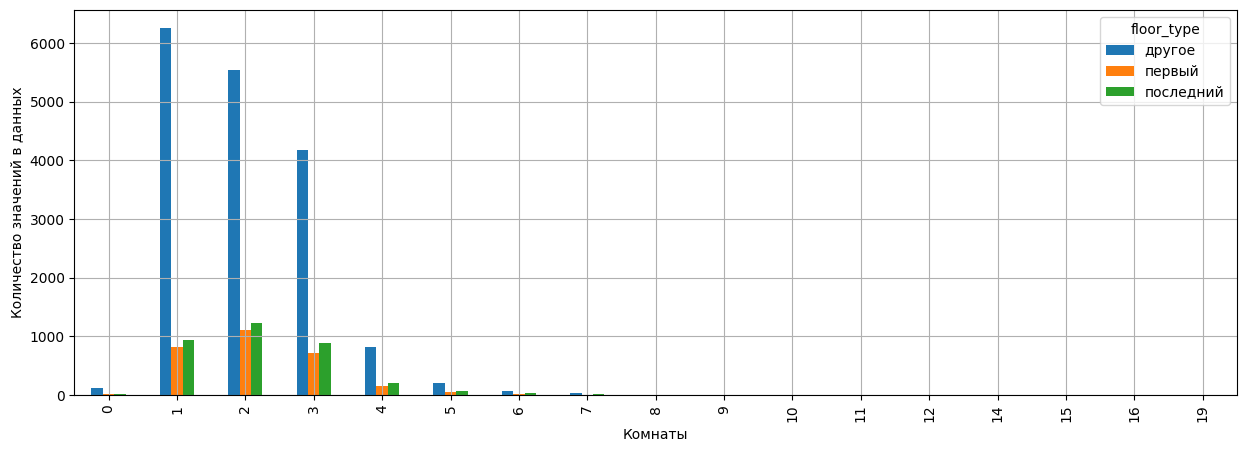

In [119]:
counts_hist(data, 'floor_type', 'bar')

По полученным данным видно, что в квартирах с любым количеством комнат преобладает тип этажа __«Другой»__.

<a id="num810"></a>
### Параметр общего количества этажей в доме ``floors_total``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных.

In [120]:
mean_median_min_max(data, 'floors_total')

'Среднее значение для столбца: floors_total'

10.68

'Медианное значение для столбца: floors_total'

9.0

'Минимальное значение для столбца: floors_total'

1

'Максимальное значение для столбца: floors_total'

35

Общее количество этажей, которыми представлены квартиры находятся в диапазоне от первого до тридцать пятого этажа. 

Посмотрим подробнее на параметр общего количества этажей в представлении гистограммы. Поставим количество корзин ``100``.

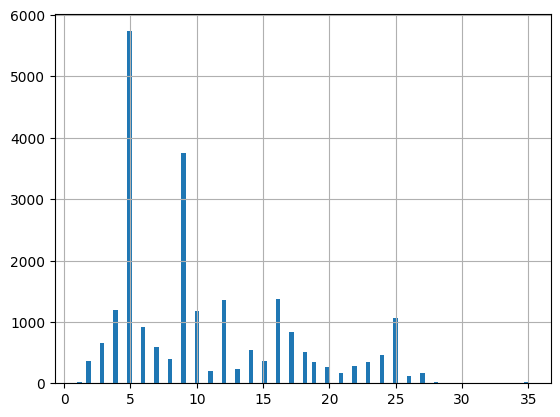

In [121]:
data['floors_total'].hist(bins=100);

Будем опираться на стандартное деление жилых домов по этажности:
- зона застройки многоэтажными жилыми домами (девять этажей и более);
- зона застройки среднеэтажными жилыми домами (от пяти до восьми этажей, включая мансардный);
- зона застройки малоэтажными многоквартирными жилыми домами (до четырех этажей, включая мансардный). 

Этим же распределением условимся о условных категориях, которыми будем оперировать при работе. 

In [122]:
data_floors_total_category = data.copy()

In [123]:
bins = [0, 4, 8, float('inf')]
labels = ['малоэтажный', 'среднеэтажный', 'многоэтажный']
data_floors_total_category['category'] = pd.cut(data_floors_total_category['floors_total'], bins=bins, labels=labels)

In [124]:
sort_category(data_floors_total_category, 'category', 'floors_total')

,Количество в floors_total,Процент от общего
category,,
многоэтажный,13611,57.970953
среднеэтажный,7639,32.535457
малоэтажный,2229,9.493590


В данных предоставлена наибольшим числом категория многоэтажных домов, от девяти этажей и выше. 

Посмотрим на отношение между типом этажности дома и квартирами по признаку количества комнат.

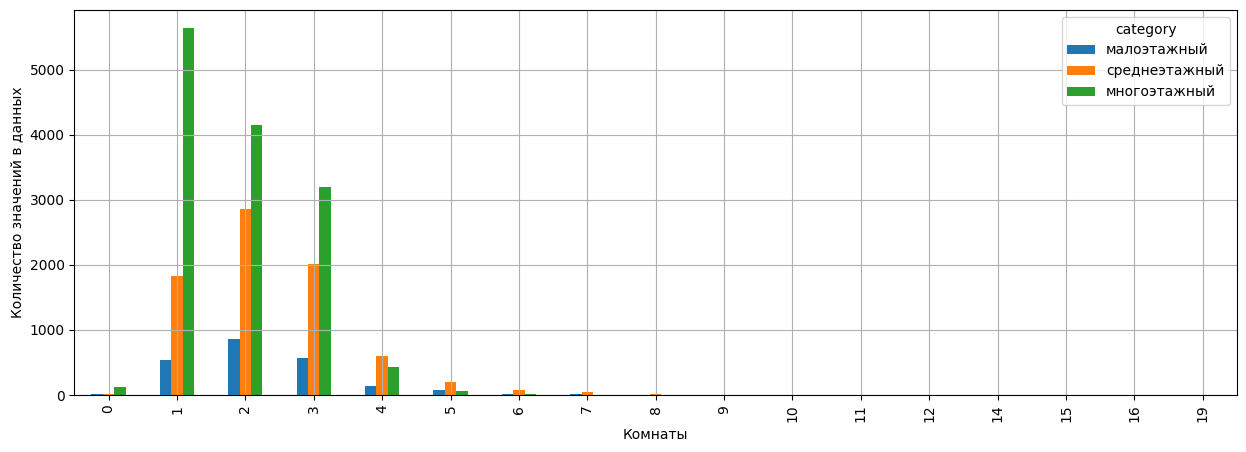

In [125]:
counts_hist(data_floors_total_category, 'category', 'bar')

На графике видно, что квартиры с количеством комнат ``от 1 до 3`` преобладают в __многоэтажных домах__. Если смотреть на квартиры с количеством комнат ``от 4-х`` видно, что они преобладают в домах __средней этажности__. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.
Построим диаграмму для определение диапазонов, которые исключат выбросы.

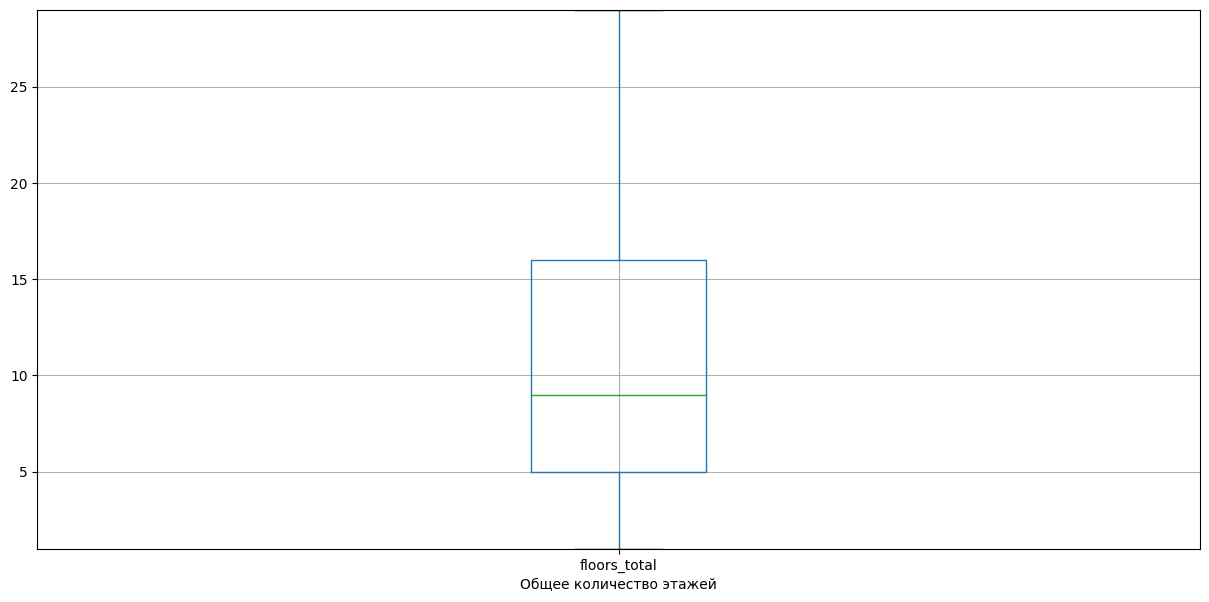

In [126]:
data_floors_total_category.boxplot(column =['floors_total'], grid=True, figsize=(15, 7))
plt.ylim(1, 29)
plt.xlabel('Общее количество этажей')
plt.show()

Если смотреть по столбцу общего количества этажей, не деля на категории, то диапазон допустимой и преобладающей этажности, которую целесообразно использовать в рассчетах, будет от ``1 до 29``.

Ранее мы определили категории, отсортируем данные по ним и посмотрим на диапазоны, в которые попадают все категории.

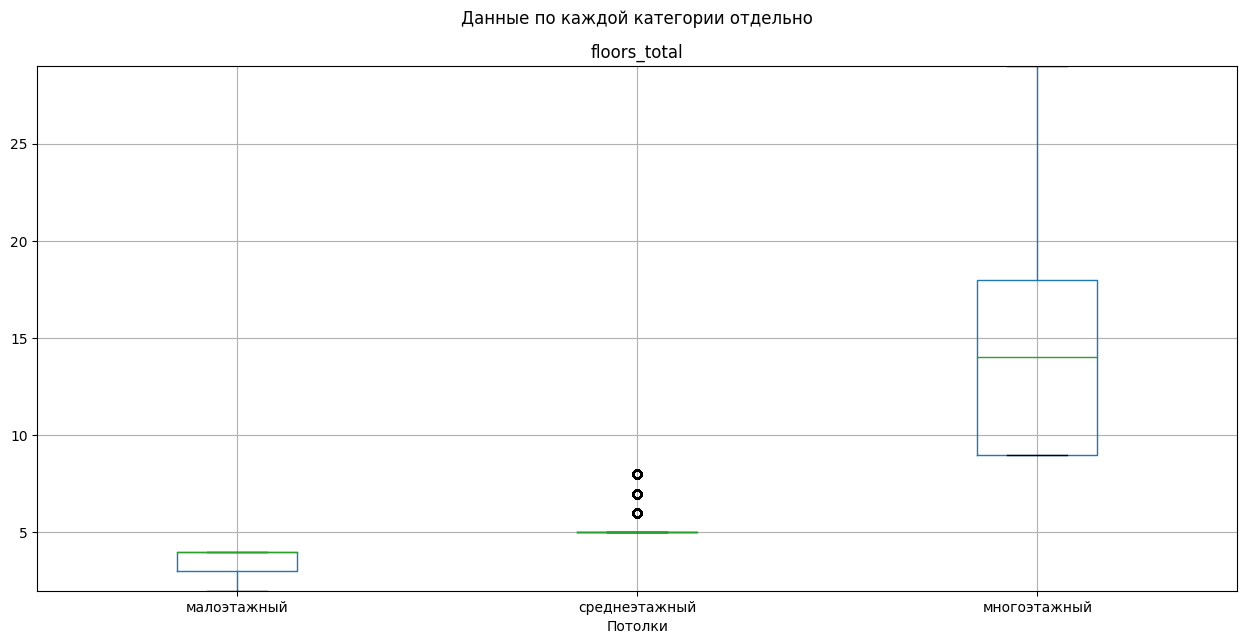

In [127]:
data_floors_total_category.boxplot(by ='category', column =['floors_total'], grid=True, figsize=(15, 7))
plt.ylim(2, 29)
plt.xlabel('Потолки')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Если смотреть на общее количество этажей в разрезе определенных категорий, то диапазон изменится, от 2 до 29. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории.

В дальнейших рассчетах __остановимся на более широком диапазоне от 1 до 29__, так как это позволит нам учесть особенности каждой категории и не игнорировать допустимые для рассчетов важные данные.

<a id="num811"></a>
### Параметр расстояния до центра города ``cityCenters_nearest``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных. На этапе обработки данных был создан столбец с ценами ``cityCenters_nearest_km`` в него включены значения такие же как в оригинальном столбце ``cityCenters_nearest``, но в более компактном виде. Будем работать с этим столбцом. 

In [128]:
mean_median_min_max(data, 'cityCenters_nearest_km')

'Среднее значение для столбца: cityCenters_nearest_km'

14.19

'Медианное значение для столбца: cityCenters_nearest_km'

13.1

'Минимальное значение для столбца: cityCenters_nearest_km'

0.18

'Максимальное значение для столбца: cityCenters_nearest_km'

65.97

При общем обзоре данных видно, что расстояние до центра города варьируется ``от 0.18 км и до 65.97 км``, это дает предположение думать, что расстояние до центра указывалось не только для квартир в Санкт-Петербурге, а также в области. Рассмотрим эти данные подробнее и определим данные с которыми будем работать дальше.

Посмотрим подробнее на параметр расстояния в представлении гистограммы. Поставим количество корзин 200, чтобы немного подробнее посмотреть на значения.

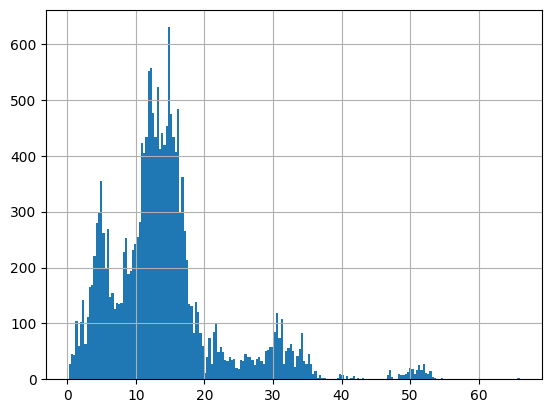

In [129]:
data['cityCenters_nearest_km'].hist(bins=200);

Большая часть продаваемых квартир находится в рамках от ``≈5 км до ≈20 км``, что по максимальной границе соответствует основной черте города, которая отделена КАД.

Для более удобного понимания и восприятия расстояний, поделим их на категории. 
За основу возьмем примерные расстояния по карте. 
- __центр__ — центральная часть города, которая включает в себя большую часть районов, до 5 км;
- __окраины__ — районы, которые находятся в черте города, но далеки от центра, до 10 км;
- __пригород__ — область, находящаяся за пределами окраин, но всё еще относительно близко к центру города. Эта категория может включать пригородные населенные пункты или спальные районы, расположенные вблизи города. До 15 км;
- __отдаленные районы__ — область, находящаяся на большом расстоянии от центра города, включающая отдаленные населенные пункты или районы, находящиеся на значительном удалении от городского центра, до 20 км;
- __область__ — населенные пункты, которые не входят в состав самого города и находятся на большом удалении от города, если таковое значение указано. Свыше 20 км. 

Расстояния, которые ожидаются от этих данных примерны, так как город имеет не идеальную форму и в самой дальней точке расстояние до центра может составлять более 55 км. 

Использую метод .quantile() и предположу, что подобных категорий пять:
- __центр:__ 0-20%
- __окраины:__ 21-40%
- __пригород:__ 41-60%
- __отдаленные районы:__ 61-80%
- __область:__ 81-100%

In [130]:
data['cityCenters_nearest_km'].quantile([.20, .40, .60, .80])

0.2     7.76
0.4    11.91
0.6    14.45
0.8    17.24
Name: cityCenters_nearest_km, dtype: float64

Таким образом данные о расстояниях укладываются в следующие категории: 
- __центр:__ ``до 7.76 км``;
- __окраины:__ ``от 7.77 до 11.91 км``;
- __пригород:__ ``от 11.92 до 14.45 км``;
- __отдаленные районы:__ ``от 14.46 до 17.24 км``;
- __область:__ ``от 17.25 км и далее``.

Создадим новую таблицу данных, которую будем дополнять данными и работать, не нарушая порядок изначальной.

In [131]:
data_cityCenters_nearest_km_category = data.copy()

Зададим метки в зависимости от определенных диапазонов и добавим столбец ``category`` в таблицу ``data_cityCenters_nearest_km_category``. 

In [132]:
bins = [0, 7.76, 11.91, 14.45, 17.24, float('inf')]
labels = ['центр', 'окраины', 'пригород', 'отдаленные районы', 'область']
data_cityCenters_nearest_km_category['category'] = pd.cut(data_cityCenters_nearest_km_category['cityCenters_nearest_km'], bins=bins, labels=labels)

Посмотрим на ``Топ-5`` минимальных и максимальных значений. 

In [133]:
largest_smallest(data_total_area_category, 'cityCenters_nearest_km')

'Топ-5 максимум:'

'cityCenters_nearest_km'

9640     65.97
5340     65.95
577      65.76
20746    65.10
5218     64.86
Name: cityCenters_nearest_km, dtype: float64

'Топ-5 минимум:'

'cityCenters_nearest_km'

13694    0.18
1182     0.21
8614     0.22
20873    0.29
1934     0.29
Name: cityCenters_nearest_km, dtype: float64

В Топ-5 попали значения максимального указанного удаления от центра, с равной вероятностью это могут быть как квартиры в области, так и квартиры отдаленных районах Санкт-Петербурга. В некоторых крайних точках расстояние до центра города, без учета дорог и транспортной развязки составляет примерно 55 км.  

In [134]:
sort_category(data_cityCenters_nearest_km_category, 'category', 'cityCenters_nearest_km')

,Количество в cityCenters_nearest_km,Процент от общего
category,,
центр,3621,20.015477
окраины,3621,20.015477
отдаленные районы,3618,19.998894
пригород,3616,19.987839
область,3615,19.982312


Данные представленны практически в равных частях, но предложений с расположением в центре и окраинах немного больше других. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.  
Построим диаграмму для определение диапазонов, которые исключат выбросы. 

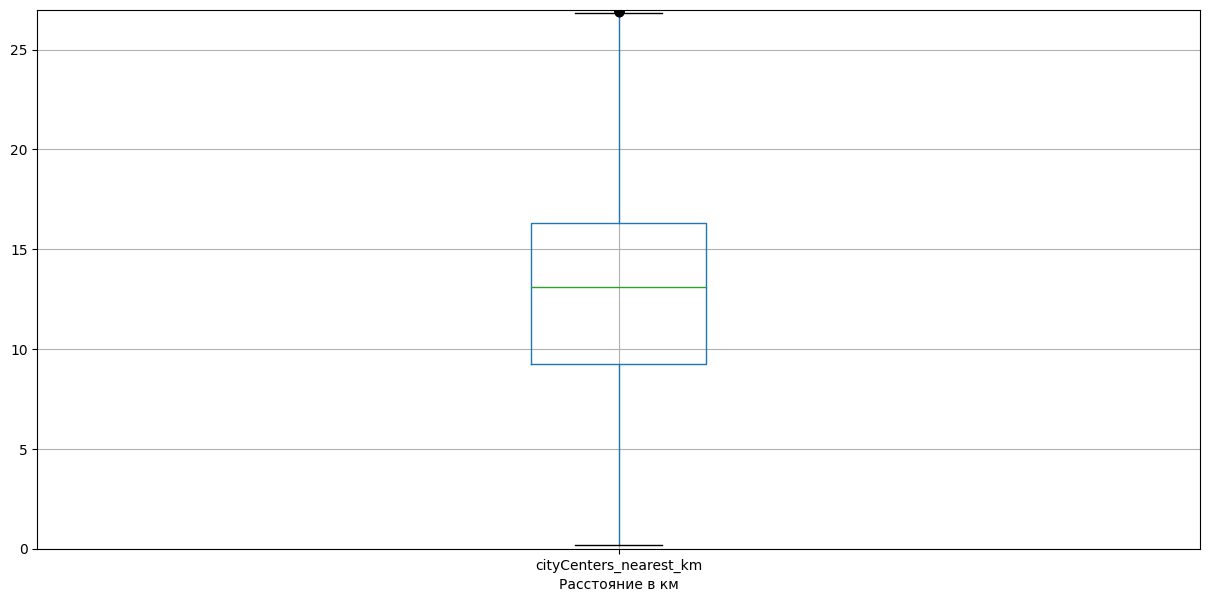

In [135]:
data_cityCenters_nearest_km_category.boxplot(column =['cityCenters_nearest_km'], grid=True, figsize=(15, 7))
plt.ylim(0, 27)
plt.xlabel('Расстояние в км')
plt.show()

Если смотреть по столбцу расстояния до центра, то стоит рассматривать только квартиры в радиусе ``27 км`` от центра города. 

Ранее мы определили категории, отсортируем данные по ним и посмотрим на диапазоны, в которые попадают все категории.

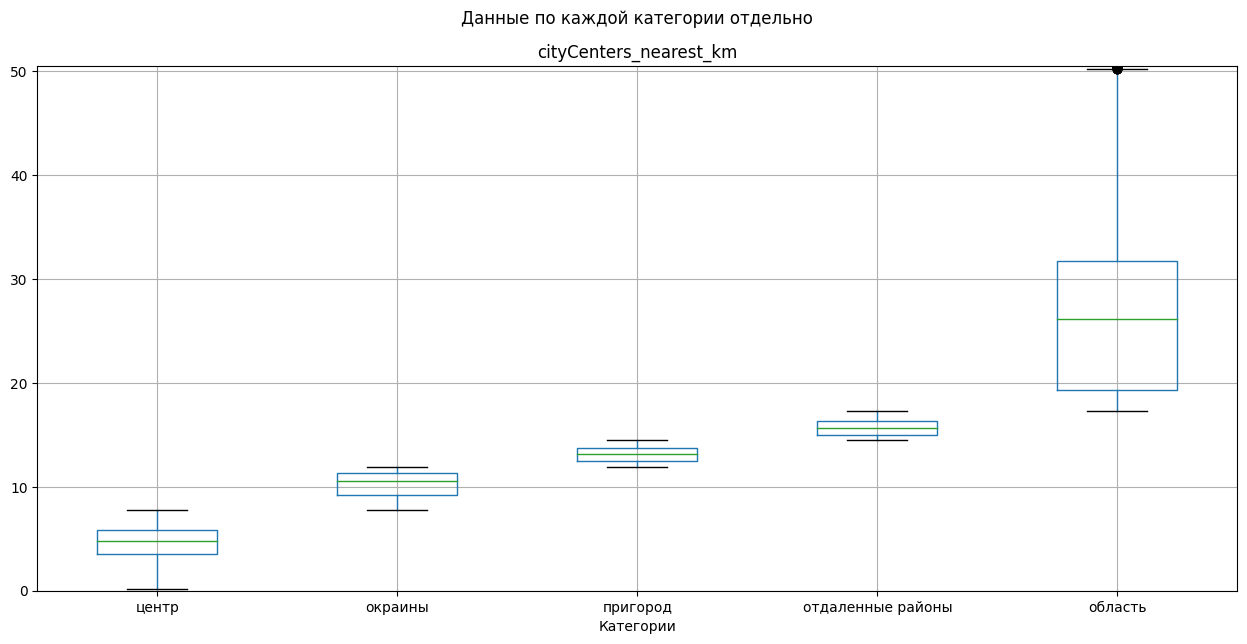

In [136]:
data_cityCenters_nearest_km_category.boxplot(by ='category', column =['cityCenters_nearest_km'], grid=True, figsize=(15, 7))
plt.ylim(0, 50.5)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Если смотреть по общим данным, то радиус в котором можно учитывать объявления увеличивается до ``50.5 км``. 

<a id="num812"></a>
### Параметр расстояния до ближайшего аэропорта ``airports_nearest ``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных. На этапе обработки данных был создан столбец ``airports_nearest_km`` в него включены значения такие же как в оригинальном столбце ``airports_nearest``, но в более компактном виде. Будем работать с этим столбцом. 

In [137]:
mean_median_min_max(data, 'airports_nearest_km')

'Среднее значение для столбца: airports_nearest_km'

28.81

'Медианное значение для столбца: airports_nearest_km'

26.76

'Минимальное значение для столбца: airports_nearest_km'

0.0

'Максимальное значение для столбца: airports_nearest_km'

84.87

Минимальным значением для расстояния до аэропорта указано ``0 км``, что, вероятнее всего ошибка. 

Посмотрим подробнее на параметр расстояния в представлении гистограммы. Поставим количество корзин 200, чтобы немного подробнее посмотреть на значения.

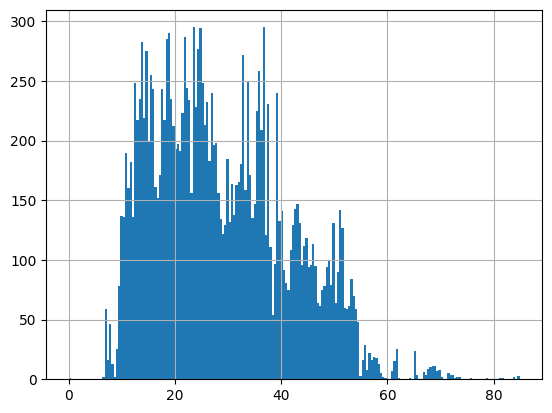

In [138]:
data['airports_nearest_km'].hist(bins=200);

Посмотрим на распределение квартир определенного количества комнат на разном удалении от аэропорта. 

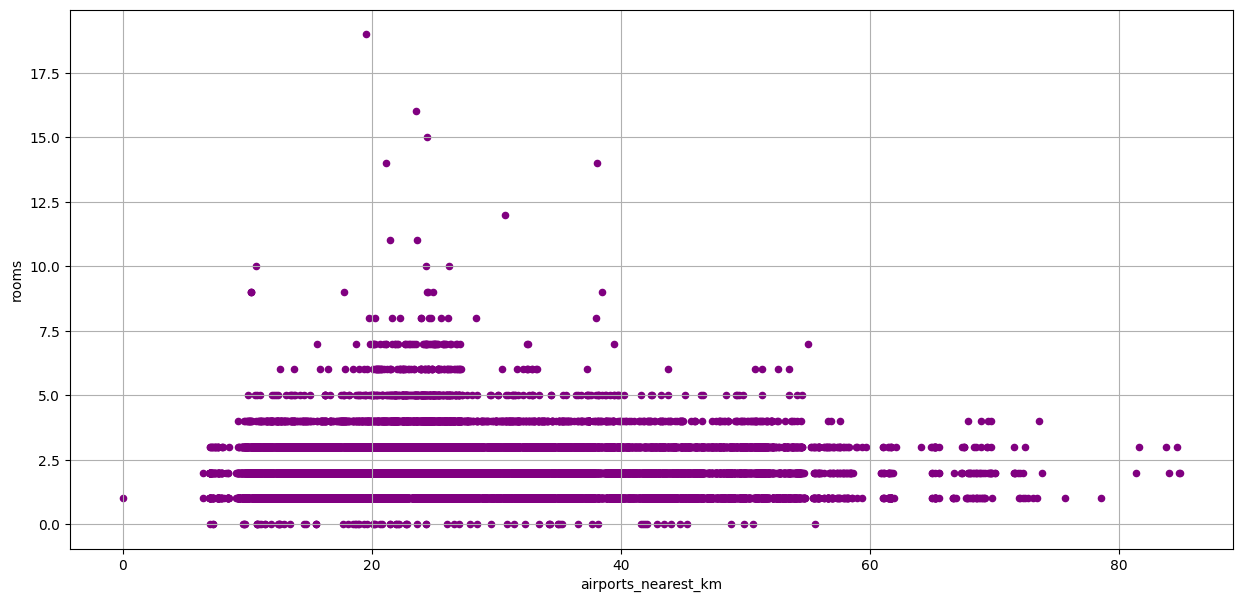

In [139]:
data.plot(x='airports_nearest_km', y='rooms', kind='scatter', figsize=(15, 7), grid=True, color='purple');

Изучая график, можно сказать, что все квартиры начиная от однокомнатной с увеличением количества комнат незначительно меняется расстояние до аэропорта, оно увеличивается. 

In [140]:
largest_smallest(data, 'airports_nearest_km')

'Топ-5 максимум:'

'airports_nearest_km'

9640     84.87
5340     84.85
577      84.66
20746    84.01
5218     83.76
Name: airports_nearest_km, dtype: float64

'Топ-5 минимум:'

'airports_nearest_km'

21085    0.00
4017     6.45
12899    6.45
7778     6.91
23150    6.95
Name: airports_nearest_km, dtype: float64

Минимальные значения в Топ-5 выглядят приемлемо и могут соответствовать реальности, кроме ошибочного значения в ``0 км``. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.
Построим диаграмму для определение диапазонов, которые исключат выбросы.

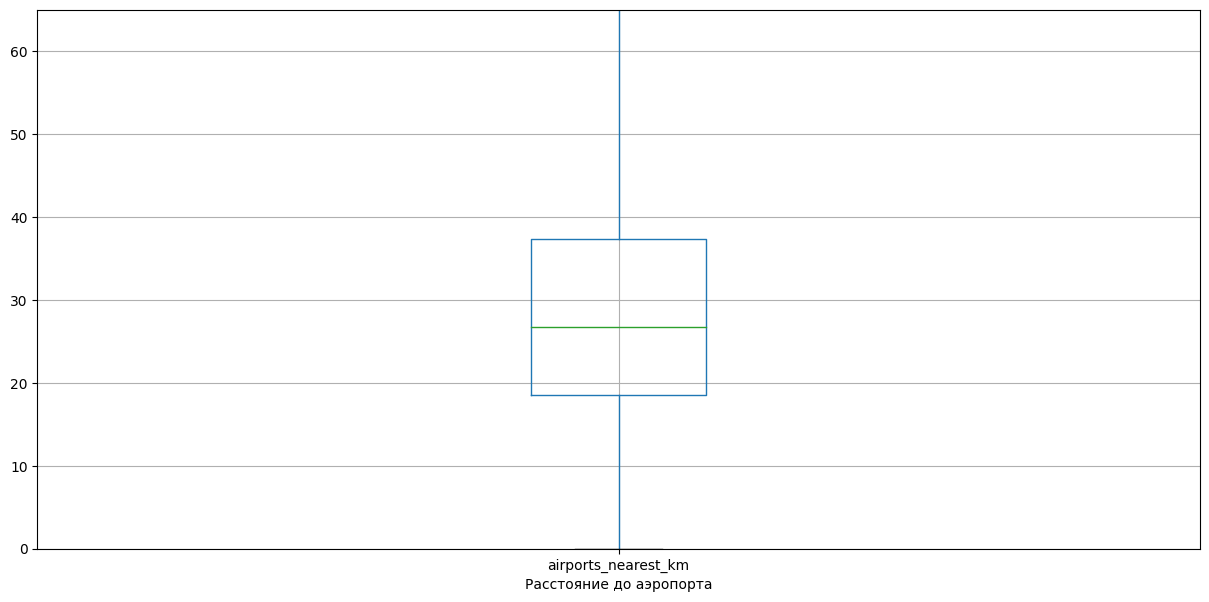

In [141]:
data.boxplot(column =['airports_nearest_km'], grid=True, figsize=(15, 7))
plt.ylim(0, 65)
plt.xlabel('Расстояние до аэропорта')
plt.show()

Диапазон расстояния до аэропорта, которое целесообразно использовать в рассчетах, будет от ``0`` до ``65`` км. 

<a id="num813"></a>
### Параметр расстояния до ближайшего парка ``parks_nearest``

Получим основные значения, которые будут нужны при дальнейшем рассмотрении данных. На этапе обработки данных был создан столбец ``parks_nearest_km`` в него включены значения такие же как в оригинальном столбце ``parks_nearest``, но в более компактном виде. Будем работать с этим столбцом. 

In [142]:
mean_median_min_max(data, 'parks_nearest_km')

'Среднее значение для столбца: parks_nearest_km'

0.49

'Медианное значение для столбца: parks_nearest_km'

0.45

'Минимальное значение для столбца: parks_nearest_km'

0.0

'Максимальное значение для столбца: parks_nearest_km'

3.19

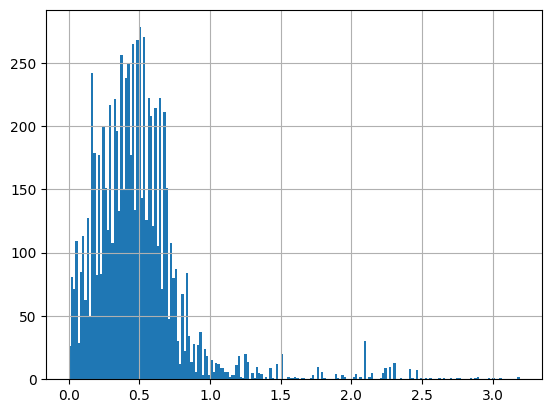

In [143]:
data['parks_nearest_km'].hist(bins=200);

Посмотрим на распределение квартир определенного количества комнат на разном удалении от ближайшего парка.

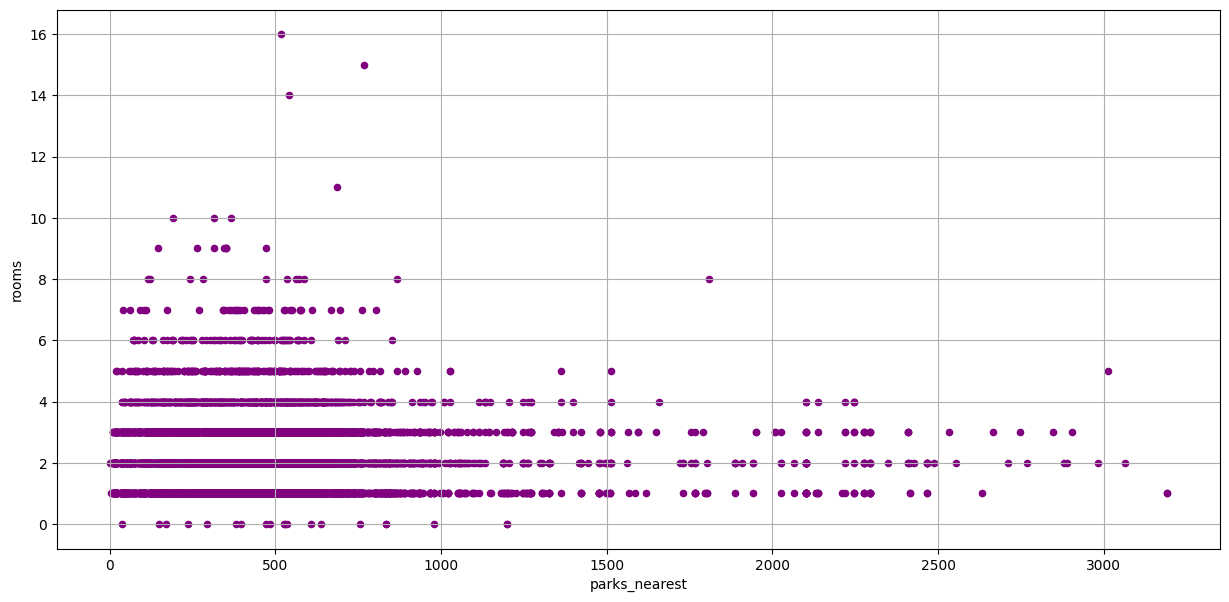

In [144]:
data.plot(x='parks_nearest', y='rooms', kind='scatter', figsize=(15, 7), grid=True, color='purple');

По графику можно сказать, что четкого распределения между квартирами с определенным количеством комнат и близостью к парку нет. Все квартиры в диапазоне ``от 0 до 6 комнат`` примерно в равных долях находятся в радиусе ``от 0 до 500 м`` до парка. 

In [145]:
largest_smallest(data, 'parks_nearest_km')

'Топ-5 максимум:'

'parks_nearest_km'

10959    3.19
19430    3.19
1590     3.06
19208    3.01
23080    2.98
Name: parks_nearest_km, dtype: float64

'Топ-5 минимум:'

'parks_nearest_km'

22941    0.00
11949    0.00
14624    0.00
19093    0.01
21167    0.01
Name: parks_nearest_km, dtype: float64

Максимальные значения похожи на настоящие, а вот минимальное расстояние в ``0 м`` — явно ошибка. Но, предположу, что расстояние в десять метров уже может быть реальным. 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.
Построим диаграмму для определение диапазонов, которые исключат выбросы.

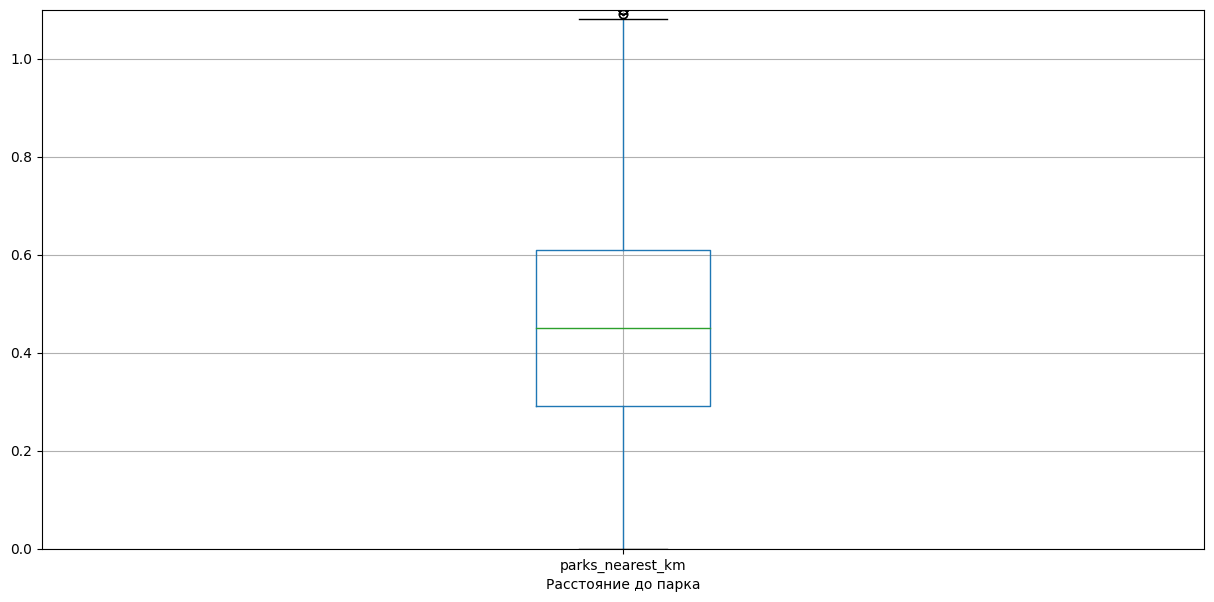

In [146]:
data.boxplot(column =['parks_nearest_km'], grid=True, figsize=(15, 7))
plt.ylim(0, 1.1)
plt.xlabel('Расстояние до парка')
plt.show()

В диапазон валидных расстояний попадают значения до ``1.1 км``.

<a id="num814"></a>
### Параметр день публикации объявления ``publish_day``	

Посмотрим подробнее на день публикации в представлении гистограммы. Поставим количество корзин ``20``.

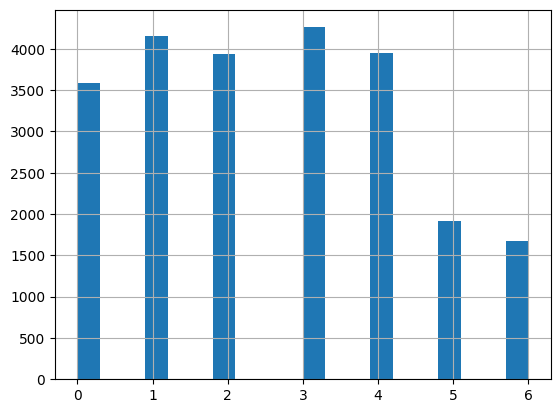

In [147]:
data['publish_day'].hist(bins=20);

На графике можно отметить, что больше всего объявлений было опубликовано в четверг, а затем во вторник. Меньше всего объявлений было опубликовано в выходные. 

Рассмотрим положение с днями публикации более подробно, найдем процентную часть от общего количества объявлений.

In [148]:
publish_day_percent = (data['publish_day'].value_counts() / len(data)) * 100
publish_day_table = pd.DataFrame({'День недели': publish_day_percent.index, 'Процент': publish_day_percent.values})
publish_day_table

,День недели,Процент
0,3,18.148132
1,1,17.679629
2,4,16.844840
3,2,16.746880
4,0,15.277482
5,5,8.156225
6,6,7.146812


В __четверг__ размещалось больше всего объявлений ``18.15 %`` от общего, на втором месте __вторник__ — ``17.68 %``. Остальные значения имеют небольшое отличие в ``1-2%`` от максимальных, кроме выходных, В __субботу и воскресенье__ размещалось примерно ``в два раза меньше`` объявлений, чем в другие дни. 

<a id="num815"></a>
### Параметр месяц публикации объявления ``publish_month``

Посмотрим подробнее на день публикации в представлении гистограммы. Поставим количество корзин ``30``.

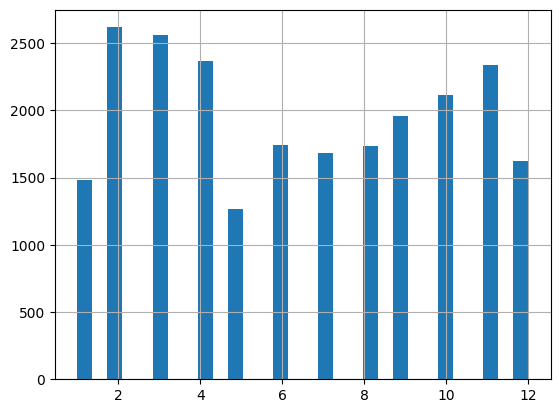

In [149]:
data['publish_month'].hist(bins=30);

In [150]:
publish_day_percent = (data['publish_month'].value_counts() / len(data)) * 100
publish_day_table = pd.DataFrame({'Месяц': publish_day_percent.index, 'Процент': publish_day_percent.values})
publish_day_table

,Месяц,Процент
0,2,11.146131
1,3,10.911879
2,4,10.068572
3,11,9.957835
4,10,8.991013
5,9,8.339367
6,6,7.410878
7,8,7.372546
8,7,7.163849
9,12,6.916819


В __феврале__ наибольшее количество размещенных объявлений ``11.15%`` от общего количества, следом идут __март и апрель__, ``10.91% и 10.07%`` соответственно. 

Меньше всего объявлений в «праздничные» месяцы: __май__ ``5.40%``, __январь__ ``6.32 %``, __декабрь__ ``6.91%``, . Могу предположить, что это наименее привлекательные периоды для продажи так как сам продавец может быть занят и, вероятнее всего, спрос может быть тоже низким, так как имеет место быть подготовка к праздникам или финансовое опустошение после них. 

<a id="num816"></a>
### Итог изучения параметров 

По итогам изучения данных я получила представление о структуре и качестве данных. Теперь можно выделить параметры данных по которым сделаем выборку и проведем исследование. 


За время изучения данных я применяла два подхода, в первом я смотрела на значения по конкретному столбцу и отсекала от него выбросы, а во втором я делила данные на категории и уже у каждой категории определяла значения выбросов. 
Второй подход увеличивает валидный диапазон значений, но так как минимальное значение берется от категории с минимальным значением, а максимальное от категории с большим значением, то для всех промежуточных категорий могут быть включены выбросы. Этот вариант хоть и увеличивает исследуемую область и отсекает крайне необычные выбросы, тем не менее содержит все равно не идеальные данные. 

Ниже приведу разницу в данных. 
При первом подходе получены такие данные: 
- Общая плошадь — ``от 12 до 115 кв.м``;
- Жилая  площадь — ``от 0 до 79 кв.м``;
- Площадь кухни — ``от 2 до 18 кв.м``;
- Высота потолка — ``от 2.3 до 2.95 м``;
- Последняя цена квартиры — ``от 0.5 до 12 млн``;
- Удаленность от центра города — ``от 0 до 27 км``.

При втором подходе такие: 
- Общая плошадь — ``от 25 до 170 кв.м``;
- Жилая  площадь — ``от 12 до 102 кв.м``;
- Площадь кухни — ``от 4 до 29 кв.м``;
- Высота потолка — ``от 2.45 до 3.8 м``;
- Последняя цена квартиры — ``от 0.5 до 25.5 млн``;
- Удаленность от центра города — ``от 0 до 50.5 км``.

Неизменными остались значения: 
- Комнаты в квартире —  ``от 0 до 6``;
- Этаж — ``от 1 до 17``;
- Количество этажей в доме — ``от 1 до 29``;
- Удаленность от аэропорта — ``от 0 до 65 км``;
- Удаленность от ближайшего парка — ``до 1100 м``.

Далее будем использовать данные, которые получили при первом подходе. 

Не смотря на то, что мы определили диапазон допустимых значений для множества параметров, мы не будем их все использовать, так как часть не имеет большого влияния на исследование, либо не понадобится нам далее. 

Далее определим все параметры, которые можно будет использовать для фильтрации данных. 

In [151]:
# условия общей площади
total_area_cond = "12 <= total_area <= 115"

# условие жилой площади 
living_area_cond = "0 <= living_area <= 79"

# условие площади кухни
kitchen_area_cond = "2 <= kitchen_area <= 18"

# условие последней цены 
last_price_m_cond = "0.5 <= last_price_m <= 12"

# условие количества комнат
rooms_cond = "0 <= rooms <= 6"

# условие высоты потолков 
ceiling_height_cond = "2.3 <= ceiling_height <= 2.95"

# условие этажа квартиры
floor_cond = "1 <= floor <= 17"

# условие этажности дома 
floors_total_cond = "1 <= floors_total <= 29"

# условие удаленности от центра города 
cityCenters_nearest_km_cond = "0 <= cityCenters_nearest_km <= 27"

# условие удаленности от аэропорта 
airports_nearest_km_cond = "0 <= airports_nearest_km <= 65"

# условие удаленности от ближайшего парка
parks_nearest_cond = "0 <= parks_nearest <= 1100"

Для дальнейшего исследования важно отфильтровать данные, так как по этим параметрам буду отвечать на поставленные вопросы. 
В фильтр для создания нового датафрейма включу следующие данные: 
- общей площади;
- жилой площади;
- площади кухни;
- высоты потолков; 
- количества комнат;
- последней цены на объект. 

In [152]:
filtered_data = data.query(total_area_cond + " and " 
                         + living_area_cond + " and " 
                         + kitchen_area_cond + " and " 
                         + last_price_m_cond + " and " 
                         + rooms_cond + " and " 
                         + ceiling_height_cond)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19039 entries, 1 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_images                  19039 non-null  int64  
 1   last_price                    19039 non-null  float64
 2   total_area                    19039 non-null  float64
 3   first_day_exposition          19039 non-null  object 
 4   rooms                         19039 non-null  int64  
 5   ceiling_height                19039 non-null  float64
 6   floors_total                  19039 non-null  int32  
 7   living_area                   19039 non-null  float64
 8   floor                         19039 non-null  int64  
 9   is_apartment                  19039 non-null  bool   
 10  studio                        19039 non-null  bool   
 11  open_plan                     19039 non-null  bool   
 12  kitchen_area                  19039 non-null  float64
 13  b

<a id="num9"></a>
## Проведите исследовательский анализ данных

<a id="num91"></a>
### Как быстро продавались квартиры ``days_exposition``

Посмотрим подробнее на значения в столбце скорости продажи квартиры в представлении гистограммы. Поставим количество корзин ``200``, чтобы немного подробнее посмотреть на значения. 

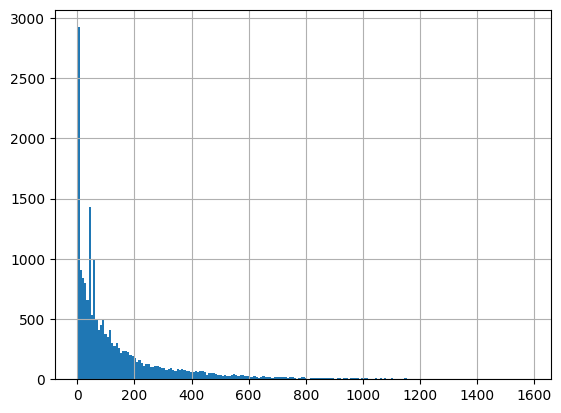

In [153]:
filtered_data['days_exposition'].hist(bins=200);

Ориентируясь на график можно предположить, что большая часть продаж была совершена в первые пол года после публикации. Также видно значительное количество дней публикации объявления, которые равны ``0``, ранее мы определили как активные на данный момент, либо снятые не завершенными, либо утерянные данные. 

Посмотрим на значения, которые присутствуют в данных. Уберем из данных продажи, значение дней продажи которых равно ``0``. 

In [154]:
mean_median_min_max(filtered_data.query('days_exposition > 0'), 'days_exposition')

'Среднее значение для столбца: days_exposition'

168.68

'Медианное значение для столбца: days_exposition'

89.0

'Минимальное значение для столбца: days_exposition'

1

'Максимальное значение для столбца: days_exposition'

1580

Минимальное значение продажи квартиры — ``1 день``, максимально долгий срок продажи — ``почти три года``. Если смотреть на медианное значение, то в целом квартиру можно продать за три месяца.  

Определим диапазон времени за который продавалась большая часть квартир и добавим это в категории. Обязательно уберем из данных те объявления, которые активны на текущий момент и определим временные рамки за которые могут продаваться квартиры. 

Допустим, что таких категорий по скорости продажи пять: 
- очень быстрая — предполагаю, что сюда войдут квартиры сроком продажи до месяца;
- быстрая — вероятнее всего сюда войдут квартиры со сроком продажи до двух месяцев;
- средняя — предполагаю, что сюда войдут квартиры, которые продавались менее чем за четыре месяца;
- длительная — квартиры, которые продавались до полугода;
- затянувшаяся — продажи, которые заняли промежуток от полугода и далее.  

Для категоризации поделим сроки с помощью метода .quantile() и шага 20%.
Тип скорости продажи:
- __очень быстрая__: 0-20%
- __быстрая__: 21-40%
- __средняя__: 41-60%
- __длительная__: 61-80%
- __затянувшаяся__: 81-100%

In [155]:
filtered_data.query('days_exposition > 0')['days_exposition'].quantile([.20, .40, .60, .80])

0.2     33.0
0.4     61.0
0.6    124.0
0.8    266.0
Name: days_exposition, dtype: float64

Сроки продажи размещены в следующих диапазонах: 
- очень быстрая: ``до 33 дней``;
- быстрая: ``от 34 до 61 дней``;
- средняя: ``от 62 до 124 дней``;
- длительная: ``от 125 до 266 дней``;
- затянувшаяся: ``267 дня и далее``. 

Создадим новую таблицу данных, которую будем дополнять данными и работать, не нарушая порядок изначальной.

In [156]:
filtered_data_days_exposition_category = data.copy()

Зададим метки в зависимости от определенных диапазонов и добавим столбец ``category`` в таблицу ``filtered_data_days_exposition_category``. 

In [157]:
bins = [0, 33, 61, 124, 266, float('inf')]
labels = ['очень быстрая', 'быстрая', 'средняя', 'длительная', 'затянувшаяся']
filtered_data_days_exposition_category['category'] = pd.cut(filtered_data_days_exposition_category['days_exposition'], bins=bins, labels=labels)

Посмотрим на ``Топ-5`` минимальных и максимальных значений сроков продажи. 

In [158]:
largest_smallest(filtered_data_days_exposition_category.query('days_exposition > 0'), 'days_exposition')

'Топ-5 максимум:'

'days_exposition'

18843    1580
1109     1572
9553     1553
1885     1513
20969    1512
Name: days_exposition, dtype: int32

'Топ-5 минимум:'

'days_exposition'

1632     1
13061    2
16053    2
16212    2
16010    3
Name: days_exposition, dtype: int32

Судя по значениям, и быстрые, и медленные значения не единичны и, вероятнее всего, являются нормой. Далее определим процентное отношение категорий в общих данных.

In [159]:
sort_category(filtered_data_days_exposition_category, 'category', 'days_exposition')

,Количество в days_exposition,Процент от общего
category,,
затянувшаяся,4439,21.840098
длительная,4158,20.457565
средняя,4081,20.078721
очень быстрая,3945,19.409594
быстрая,3702,18.214022


__Затянувшихся__ продаж ``от 267 дней и далее``, больше всего — ``21%``. А меньше всего сроков продажи в категории __быстрых__ до ``61 дня``, всего ``18%``. 

Посмотрим на сроки продажи в разрезе удаленности квартиры от центра. 

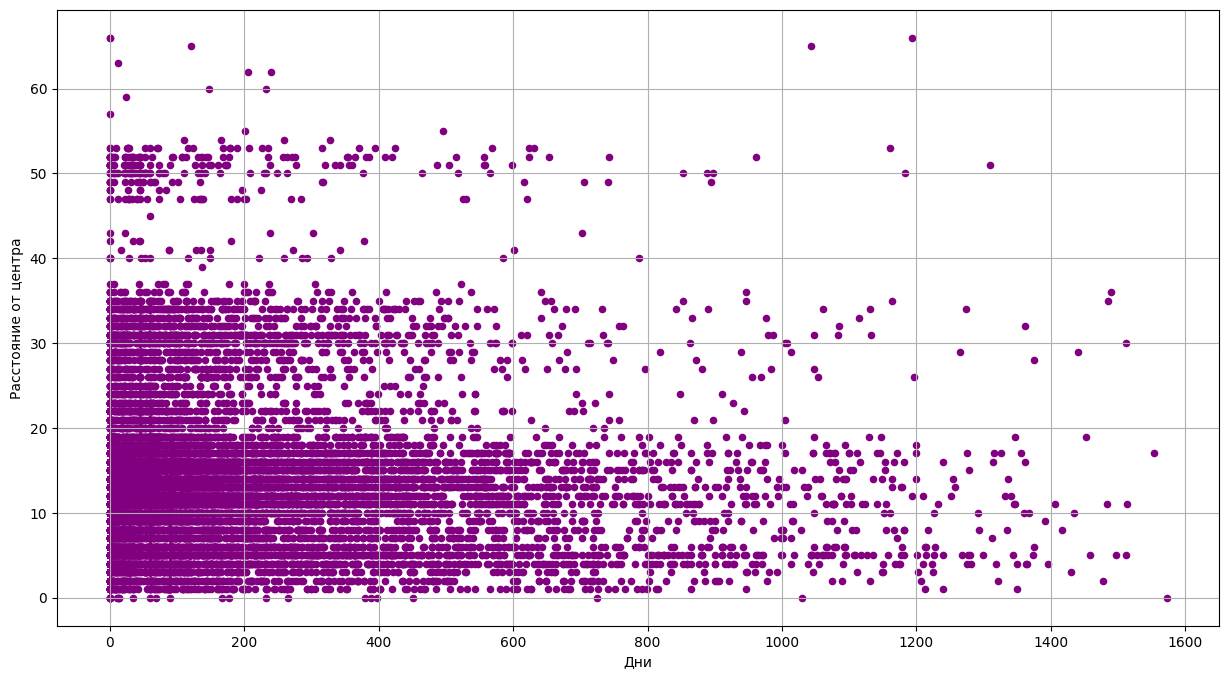

In [160]:
filtered_data_days_exposition_category.plot(x='days_exposition', y='cityCenters_nearest_km_round', 
                                            kind='scatter', figsize=(15, 8), grid=True, color='purple')
plt.xlabel('Дни')
plt.ylabel('Расстояние от центра')
plt.show()

Каких-то конкретных выводов тут не получится сделать, квартиры на любом удалении от центра могут продаваться как быстро, так и медленно.

Посмотрим на соотношение сроков продаж к квартирам выраженным через количество комнат.

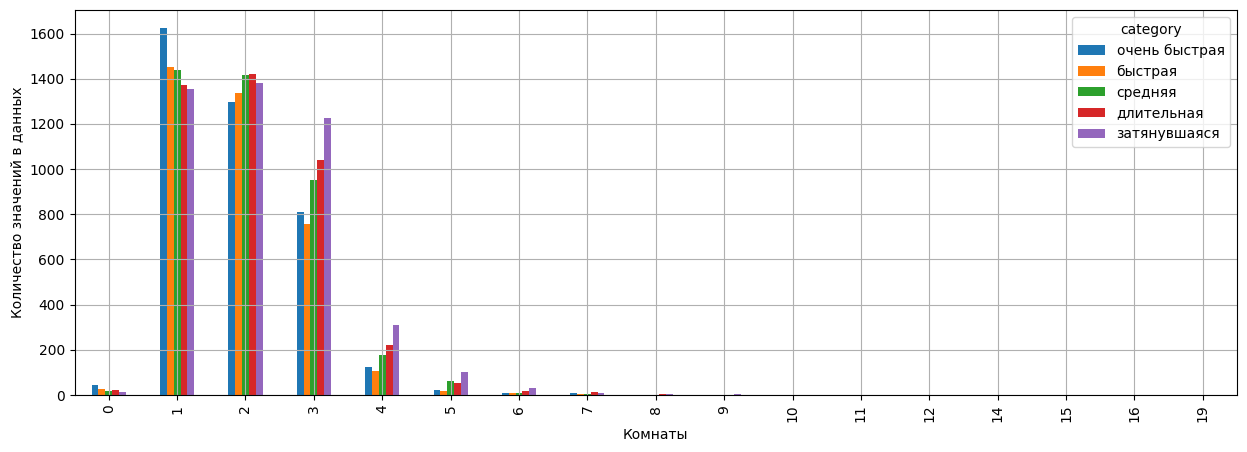

In [161]:
counts_hist(filtered_data_days_exposition_category.query('days_exposition > 0'), 'category', 'bar')

Однокомнатные квартиры продаются в большей части __очень быстро__ ``до 33 дней``, в тоже время как двухкомнатные уже преимущественно находятся в __длительной__ ``от 125 до 266 дней``. Начиная от квартир с тремя комнатами сроки продажи преимущественно проходят совсем не быстро и их можно классифицировать как __затянувшиеся__ ``от 267 дней и далее``. 

<a id="num911"></a>
#### Итог. Как быстро продавались квартиры

По итогам проведенных исследований можно сказать, что, если говорить о продаджах квартиры без уточнения характеристик, то быстрой можно назвать те, которые ``меньше медианного значения в 89 дней``. 

Если рассматривать квартиры более подробно, по параметру количества комнат, то быстрыми можно назвать следующие продажи: 
- для однокомнатных быстрыми будут продажи ``до 33 дней``, не смотря на то, что однокомнатные и так быстро продаются;
- для двухкомнатных — продажи ``от 61 дней и ниже``;
- для трехкомнатных и далее — ``от 267 дней и ниже``. 

Что касается необычно долгих продаж, то для квартиры без уточнения параметров значения ``более 89 дней`` будут считаться долгими. 


<a id="num92"></a>
### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим вопрос о факторах, которые влияют на стоимость объекта. 

<a id="num921"></a>
#### Общая площадь ``total_area``

Построим точечную диаграмму, чтобы точнее понимать как распределяется цена на квартиры в зависимости от площади.
Также добавим линию регрессии (красная). 

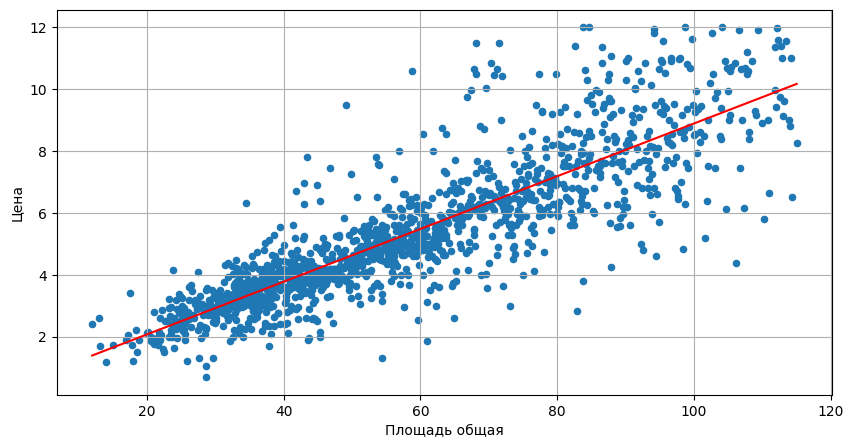

In [162]:
last_price_m_total = filtered_data.pivot_table(index='total_area', values='last_price_m', aggfunc= 'median')
last_price_m_total = last_price_m_total.reset_index()
last_price_m_total.plot(x='total_area', y='last_price_m', kind='scatter', grid=True, figsize=(10, 5))
plt.xlabel('Площадь общая')
plt.ylabel('Цена')
x = last_price_m_total['total_area']
y = last_price_m_total['last_price_m']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

Выразим корреляцию с помощью метод corr. 

In [163]:
filtered_data['last_price_m'].corr(filtered_data['total_area']).round(2)

0.68

Судя по графику и направлению линии регрессии, есть зависимость между общей площадью квартиры и ценой. 
Значение корреляции между этими параметрами равно ``0.67``. 

<a id="num922"></a>
####  Жилая площадь ``living_area``

Построим точечную диаграмму, чтобы точнее понимать как распределяется цена на квартиры в зависимости от площади. Также добавим линию регрессии (красная).

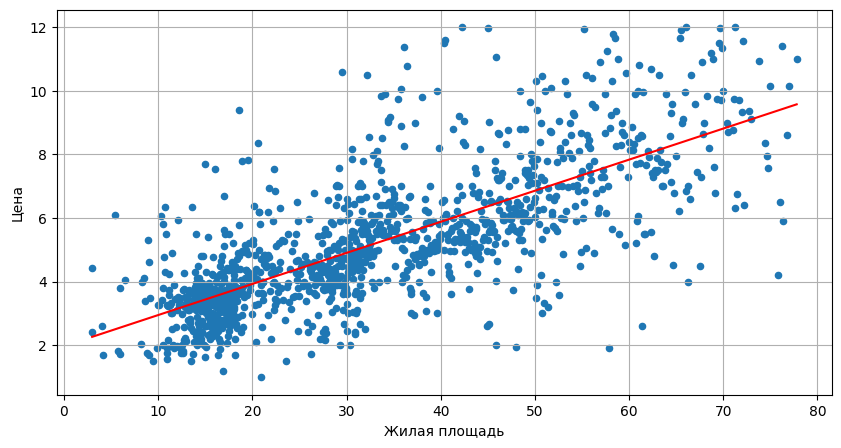

In [164]:
last_price_m_living = filtered_data.pivot_table(index='living_area', values='last_price_m', aggfunc= 'median')
last_price_m_living = last_price_m_living.reset_index()
last_price_m_living.plot(x='living_area', y='last_price_m', kind='scatter', grid=True, figsize=(10, 5))
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
x = last_price_m_living['living_area']
y = last_price_m_living['last_price_m']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.show()

Выразим корреляцию с помощью метод corr.

In [165]:
filtered_data['last_price_m'].corr(filtered_data['living_area']).round(2)

0.53

Судя по графику и направлению линии регрессии, есть зависимость между общей жилой площадью квартиры и ценой. 
Значение корреляции между этими параметрами равно ``0.53``. 

<a id="num923"></a>
####  Площадь кухни ``kitchen_area``

Построим точечную диаграмму, чтобы точнее понимать как распределяется цена на квартиры в зависимости от площади. Также добавим линию регрессии (красная).

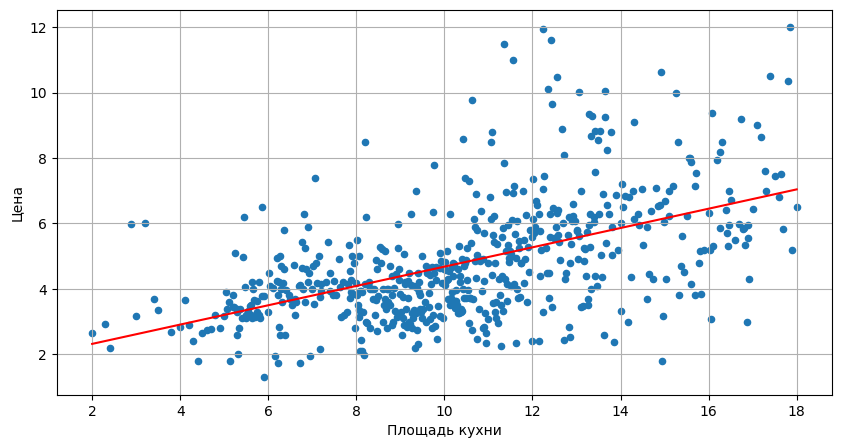

In [166]:
last_price_m_kitchen = filtered_data.pivot_table(index='kitchen_area', values='last_price_m', aggfunc= 'median')
last_price_m_kitchen = last_price_m_kitchen.reset_index()
last_price_m_kitchen.plot(x='kitchen_area', y='last_price_m', kind='scatter', grid=True, figsize=(10, 5))
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
x = last_price_m_kitchen['kitchen_area']
y = last_price_m_kitchen['last_price_m']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.show()

Выразим корреляцию с помощью метод corr.

In [167]:
filtered_data['last_price_m'].corr(filtered_data['kitchen_area']).round(2)

0.46

Судя по графику и направлению линии регрессии, есть зависимость между общей площадью квартиры и ценой. 
Значение корреляции между этими параметрами равно ``0.46``. 

<a id="num924"></a>
####  Количество комнат ``rooms``

Построим точечную диаграмму, чтобы точнее понимать как распределяется цена на квартиры в зависимости от количества комнат. Также добавим линию регрессии (красная).

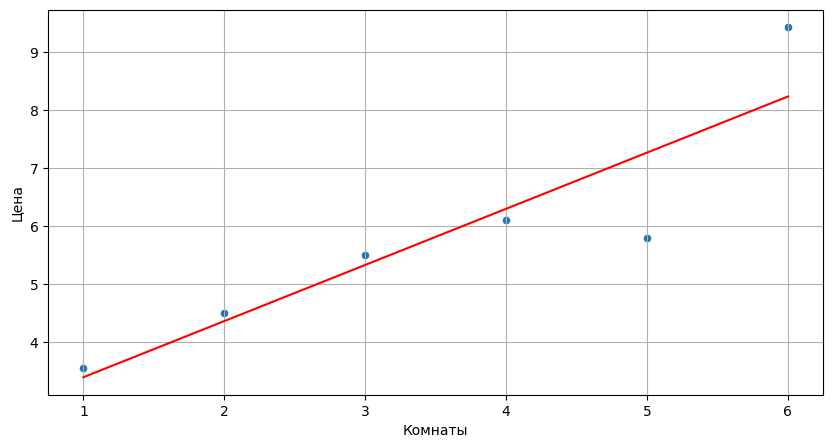

In [168]:
last_price_m_rooms = filtered_data.pivot_table(index='rooms', values='last_price_m', aggfunc= 'median')
last_price_m_rooms = last_price_m_rooms.reset_index()
last_price_m_rooms.plot(x='rooms', y='last_price_m', kind='scatter', grid=True, figsize=(10, 5))
plt.xlabel('Комнаты')
plt.ylabel('Цена')
x = last_price_m_rooms['rooms']
y = last_price_m_rooms['last_price_m']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.show()

Выразим корреляцию с помощью метод corr.

In [169]:
filtered_data['last_price_m'].corr(filtered_data['rooms']).round(2)

0.41

По полученным данным можно утверждать, что слабая зависимость между количеством комнат и ценой есть. 

<a id="num925"></a>
#### Промежуточный итог влияния параметров квартиры на стоимость квартиры

Сравнивая коэффициенты корреляции между общей площадью, площадью кухни и жилой, можно сделать вывод, что при значениях корреляции для __общей площади__ ``0.68``, __жилой площади__ ``0.53``, __площадью кухни__ ``0.46`` и __количеством комнат__ ``0.41``, более сильную корреляцию показывает общая площадь квартиры к цене.  

<a id="num926"></a>
####  Тип этажа ``floor_type``

Построим диаграмму отношения цены к типу этажа. 

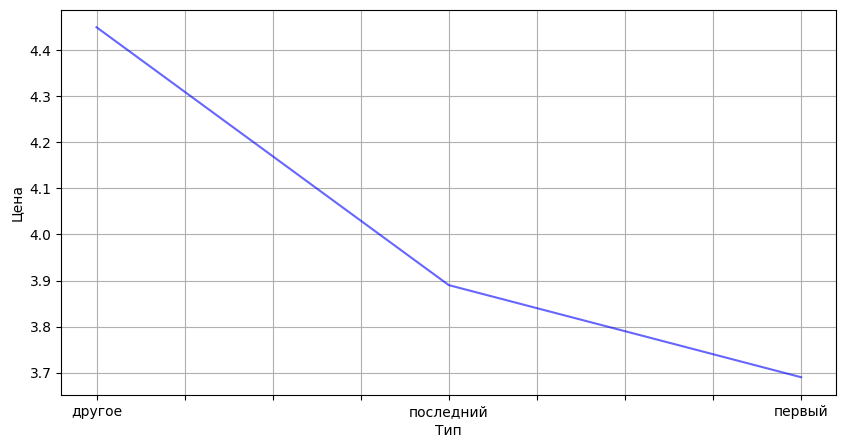

In [170]:
(filtered_data.pivot_table(index = 'floor_type', values = 'last_price_m', aggfunc= 'median')
 .sort_values(by='last_price_m', ascending=False)
 .plot(y='last_price_m', kind='line', figsize=(10, 5), legend=False, grid=True, color='blue', alpha=0.6))
plt.ylabel('Цена')
plt.xlabel('Тип')
plt.show()

На данном этапе можно сказать, что цены на «других» этажах преимущественно выше, чем на первом и последнем, а на последнем выше чем на первом. 

Приведем текстовые категории этажей к числовому значению и посчитаем корреляцию. 

In [171]:
filtered_data_floor = filtered_data.copy()
def get_value(x):
    if x == 'первый':
        return 1
    elif x == 'последний':
        return 0
    else:
        return 2

filtered_data_floor['floor_type_num'] = filtered_data_floor['floor_type'].apply(get_value)

In [172]:
filtered_data_floor['last_price_m'].corr(filtered_data_floor['floor_type_num']).round(2)

0.15

Зависимость между типом этажа и ценой на квартиры не равна 0, но тем не менее, крайне низка. 

<a id="num927"></a>
####  Даты размещения: день недели ``publish_day``, месяц ``publish_month``, год ``publish_year`` 

<a id="num9271"></a>
##### День недели

Построим диаграмму отношения цены ко дню недели, в который было опубликовано объявление и посчитаем коэффициент корреляции. 

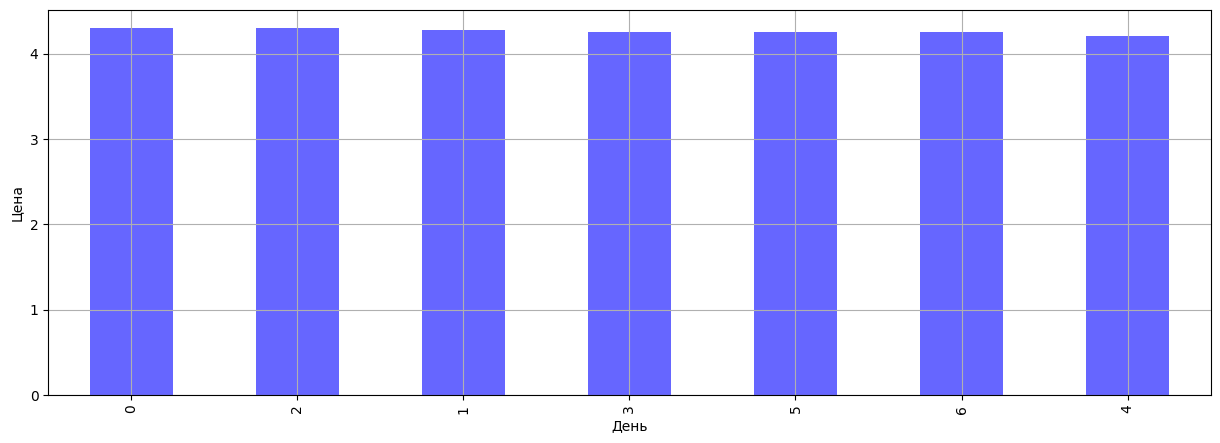

-0.01

In [173]:
(filtered_data.pivot_table(index = 'publish_day', values = 'last_price_m', aggfunc= 'median')
.sort_values(by='last_price_m', ascending=False)
.plot(y='last_price_m', kind='bar', figsize=(15, 5), legend=False, grid=True, color='blue', alpha=0.6))
plt.ylabel('Цена')
plt.xlabel('День')
plt.show()

filtered_data['last_price_m'].corr(filtered_data['publish_day']).round(2)

Зависимость между тем, в какой из дней разместили объвление и ценой равна практически 0. 

<a id="num9272"></a>
##### Месяц

Построим диаграмму отношения цены к месяцу, в который было опубликовано объявление и посчитаем коэффициент корреляции. 

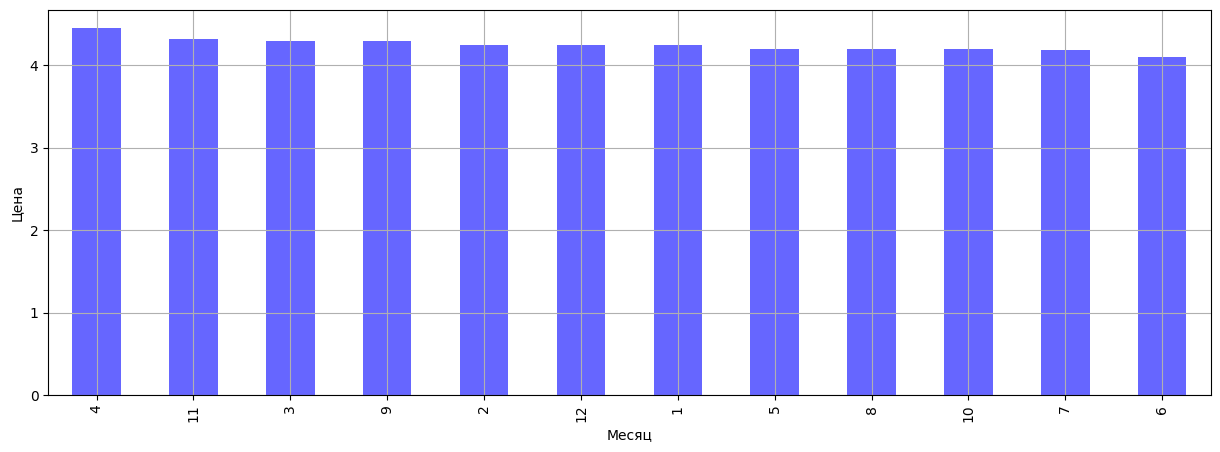

0.01

In [174]:
(filtered_data.pivot_table(index = 'publish_month', values = 'last_price_m', aggfunc= 'median')
.sort_values(by='last_price_m', ascending=False)
.plot(y='last_price_m', kind='bar', figsize=(15, 5), legend=False, grid=True, color='blue', alpha=0.6))
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

filtered_data['last_price_m'].corr(filtered_data['publish_month']).round(2)

Зависимость между тем, в какой месяц разместили объвление и ценой равна практически 0.

<a id="num9273"></a>
##### Год

Построим диаграмму отношения цены к году, в который было опубликовано объявление.

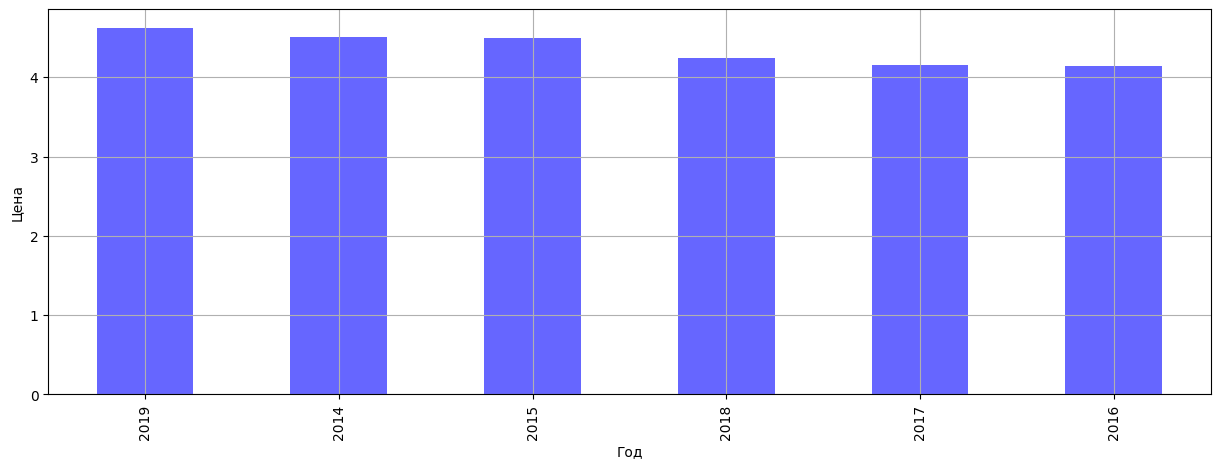

0.02

In [175]:
(filtered_data.pivot_table(index = 'publish_year', values = 'last_price_m', aggfunc= 'median')
.sort_values(by='last_price_m', ascending=False)
.plot(y='last_price_m', kind='bar', figsize=(15, 5), legend=False, grid=True, color='blue', alpha=0.6))
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()

filtered_data['last_price_m'].corr(filtered_data['publish_year']).round(2)

Зависимость между тем, в какой год разместили объвление и ценой равна практически 0.

<a id="num928"></a>
#### Итог. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Среди всех проанализированных параметров, можно утверждать, что на ценообразование влияют качественные признаки квартиры, такие как площади и количество комнат. 
Сильнее всего корреляция между параметром общей площади и цены. Но не стоит игнорировать и остальные параметры квартиры, так, в определенной, степени все они влияют на цену. Зависимость, хоть и слабая, есть между ценой и жилой площадью, ценой и площадью кухни, ценой и количеством комнат. 

Что касается других характеристик, такие как тип этажа на котором квартира находится, дня, месяца и года в которые размещено объявление, эти значения никак не влияют на цену, либо их влияние крайне мало. 

<a id="num93"></a>
### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Определим список населенных пунктов, в которых больше всего было размещено объявлений о продаже квартир. 

In [176]:
top_10_locality_name_sale = filtered_data['locality_name'].value_counts().head(10)
top_10_locality_name_sale

Санкт-Петербург      11870
посёлок Мурино         512
посёлок Шушары         426
Всеволожск             370
посёлок Парголово      313
Колпино                312
Пушкин                 298
Гатчина                283
деревня Кудрово        261
Выборг                 203
Name: locality_name, dtype: int64

В списке выше лидирует Санкт-Петербург с почти 12 тысячами объявлений, остальные населенные пункты представлены сильно слабее. 


Построим сводную таблицу с определенным выше списком Топ-10 населенных пунктов по количеству объявлений. 

In [177]:
top_10_locality_name_sale = top_10_locality_name_sale.index.values
top_10_locality_name_sale_price = filtered_data.pivot_table(index='locality_name', values='sq_m_price', aggfunc='median')
top_10_locality_name_sale_price = top_10_locality_name_sale_price.query('locality_name in @top_10_locality_name_sale').sort_values(by='sq_m_price', ascending=False)
top_10_locality_name_sale_price

,sq_m_price
locality_name,
Санкт-Петербург,101344.400
Пушкин,97882.115
посёлок Парголово,92261.900
деревня Кудрово,92152.200
посёлок Мурино,84192.735
посёлок Шушары,76666.670
Колпино,74729.185
Гатчина,67187.500
Всеволожск,65538.630


На первом месте по цене за квадратный метр оказался Санкт-Петербург — ``101344.4 руб.``, эти и данные предполагались, так как это областной город и преимущественно цены в нем выше, чем в маленьких. 
На последнем месте оказалось жилье в Выборге, в городе, который находится на расстоянии 122 км от Санкт-Петербурга, всего ``57500 руб.`` за квадратный метр. Это ``на 43.26% меньше`` от стоимости квадратного метра в Санкт-Петербурге ``101344.4 рублей``. 

<a id="num94"></a>
### Средняя цена каждого километра в Санкт-Петербурге в разрезе удаления от центра

Выделим объявлений только по Санкт-Петербургу и проверим данные по каждому километру отдельно. Ранее был создан столбец ``cityCenters_nearest_km_round`` в котором указаны целые значения километров на которых были зафиксированы объявления. 

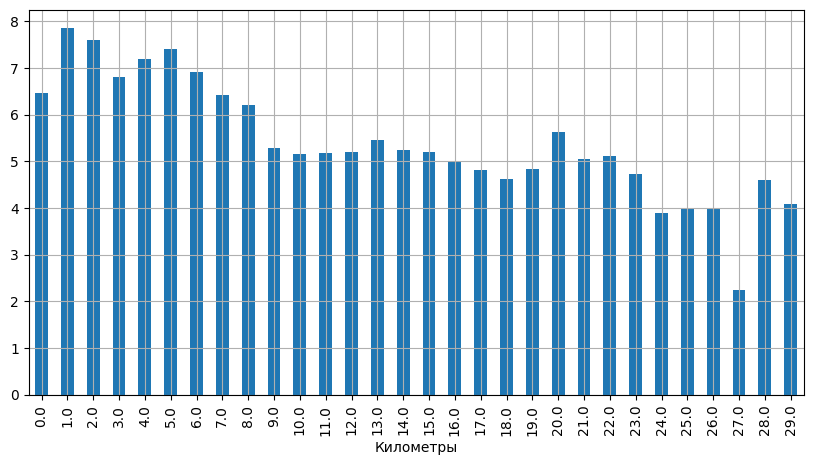

,Цена за км
cityCenters_nearest_km_round,
1.0,7.850196
2.0,7.605063
5.0,7.414910
4.0,7.199444
6.0,6.907698
3.0,6.803077
0.0,6.466667
7.0,6.428146
8.0,6.212515


In [178]:
last_price_cityCenters_nearest_km = filtered_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km_round', values='last_price_m', aggfunc= 'mean')
last_price_cityCenters_nearest_km = last_price_cityCenters_nearest_km.set_axis(['Цена за км'], axis='columns')
last_price_cityCenters_nearest_km.plot(kind='bar', grid=True, legend=False, figsize=(10, 5))
plt.xlabel('Километры')
plt.show()

last_price_cityCenters_nearest_km.sort_values(by='Цена за км', ascending=False)

Начиная от 1-го километра центра Санкт-Петербурга, стоимость километра в центре максимальная и постепенно снижается с каждым удаляющимся от центра километром. 

Между 9-м и 19-м километром стоимость не особо меняется, вероятнее всего это спальные районы с одинаковой инфраструктурой и, как следствие, с небольшой разницей в цене за километр. 

На 27-м километре стоимость резко уменьшается, практически в два раза от предшествующих ему, можно предположить, что на этом удалении рассположен не самый дорогой район или пригород. 


На цену за квартиру, помимо всех упомянутых ранее в этом проекте факторов, влияет также и удаленность от центра. В центре, обычно, сосредоточены все удобства, культурные центры, зоны отдыха и повышенного комфорта, места встреч и прочие сосредоточения социальной жизни города. 

Дальше от центра, преимущественно, располагаются спальные районы, которые не так привлекательны для развлечения, туризма, саморазвития и прочего, это тоже сказывается на цене за жилье. 
Также, чем дальше от центра, тем больше шанс, что жилье может граничить с промышленными районами, цены это квартире не добавит, а скорее наоборот. 

Также, даже на приличном удалении от центра могут быть очень привлекательные для жизни и досуга районы, а следовательно и с достаточно дорогой недвижимостью. 

На графике выше, а также в таблице представлены разнородные данные, которые приведены к общему значению «средней цены за километр», стоит понимать, что эти данные не универсальны и не включают в себя множество факторов. Например, плотность застройки в радиусе от 0 до 1 км в центре города, сильно отличается от условного радиуса вокруг центра на расстоянии 27 км, так как на расстоянии 27 км может быть как населенный пункт. 

Этот параметр удобен как дополнительный при проведении других исследований.

<a id="num10"></a>
## Общий вывод

В первой части проекта была выполнена важная работа по предварительной обработке данных. 
Очистка данных является важным этапом в процессе анализа данных. Это позволяет убрать ошибки, выбросы и пропуски в данных, чтобы получить более точные и релевантные результаты.
Различные вариации записи в данных могут затруднять их анализ и сравнение. Поэтому, важно проводить стандартизацию данных, убирая разные варианты написания, что позволит сократить количество ошибок в будущем. Определение значимых параметров для анализа данных также является важным шагом. Например, в данном проекте, параметры комнат, жилой площади, кухни и высоты потолков были отфильтрованы и преобразованы, что помогло получить более точные и релевантные результаты. Определение пороговых значений для фильтрации выбросов и ошибок в данных также может помочь в получении более точных результатов. 

Добавление новых столбцов в данные, таких как цена одного квадратного метра, день, месяц и год публикации объявления, тип этажа квартиры, расстояние до центра города, аэропорта, ближайшего парка и водоема, а также цена за квартиру в миллионах, является важным этапом в подготовке данных для дальнейшего анализа.
Эти столбцы помогут уточнить характеристики квартир и их окружения, что может быть полезно для понимания тенденций рынка недвижимости.
Например, столбец ``sq_m_price`` может помочь выявить различия в цене на квадратный метр жилья в зависимости от его месторасположения и других факторов.
Столбцы ``publish_day``, ``publish_month`` и ``publish_year`` могут быть полезны для анализа цен в разные периоды времени.
Столбец ``flat_type`` позволит выявить, какие типы этажей квартир наиболее влияют на цену квартиры.
Столбцы ``center_distance_km``, ``airports_nearest_km``, ``parks_nearest_km`` и ``ponds_nearest_km`` помогут оценить, как близко квартиры расположены к различным объектам инфраструктуры, что может оказывать влияние на цену.

По результатам обработки данных были сделаны следующие выводы о недвижимости по которой проводились дальнейшие исследования. Параметры были следующими: 
- Общая площадь квартир варьируется ``от 12 до 115 кв.м``;
- Жилая площадь варьируется ``от 0 до 79 кв.м``;
- Площадь кухни варьируется ``от 2 до 18 кв.м``;
- Высота потолков колеблется ``от 2.3 до 2.95 метров``;
- Цена квартир находится в диапазоне ``от 0.5 до 12 млн рублей``;
- Удаленность от центра города колеблется ``от 0 до 27 км``;
- Количество комнат варьируется ``от 0 до 6``;
- Этажность домов колеблется от ``1 до 29``;
- Удаленность от аэропорта колеблется ``от 0 до 65 км``;
- Удаленность от ближайшего парка может быть ``до 1100 метров``.
Отобранные по этим параметрам данны позволяют провести детальный анализ рынка недвижимости в Санкт-Петербурге и определить основные факторы, влияющие на цену квартир.

Сводя к общему знаменателю результаты исследования, можно сказать, что __быстрыми продажами__ квартир можно считать те, которые происходят быстрее медианного значения в ``89 дней``, но если учитывать количество комнат, то быстрыми можно назвать продажи __однокомнатных__ квартир ``до 33 дней``, __двухкомнатных__ ``до 61 дня`` и продажи __трехкомнатных и более__ от ``267 дней и ниже``. Квартиры, продажа которых занимает ``более 89 дней``, могут быть считаться __долгими продажами__, если не уточнять характеристики.

После анализа всех параметров можно сделать вывод, что на формирование цены квартиры __существенное влияние оказывают качественные характеристики__, такие как общая площадь,  жилая, площадь кухни и количество комнат. С другой стороны, параметры, такие как тип этажа, дата и время размещения объявления о продаже квартиры, не оказывают существенного влияния на цену или влияют на нее крайне незначительно.

Стоимость недвижимости зависит от расстояния до центра города. Обычно, чем ближе к центру, тем выше цена за квадратный метр. Это связано с тем, что в центре находятся все удобства, культурные центры, зоны отдыха и повышенного комфорта, места встреч и прочие сосредоточения социальной жизни города. Также в центре располагаются офисы крупных компаний, что делает центр города более привлекательным для бизнеса и инвесторов.
Дальше от центра, обычно, располагаются спальные районы, которые не так привлекательны для развлечения, туризма, саморазвития и прочего. Это сказывается на цене за жилье. Также, чем дальше от центра, тем больше шанс, что жилье может граничить с промышленными районами, что также не добавляет ценности квартире.